<img align="right" src="https://www.tedu.edu.tr/themes/custom/tedu/logo.svg" width="350px" height="350px"/>
<h1 style="font-size:20pt"> ADS542 PROJECT | MACHINE LEARNING</h1><br/>
<b> Author: </b> Gonca AVCI CAKMAK <br/>
<b> Created: </b>04 June 2023<br/>


## Table of Contents:

* [1. DATA DESCRIPTION](#DATA-DESCRIPTION)
* [2. IMPORT REQUIRED PACKAGES](#IMPORT-REQUIRED-PACKAGES)
* [3. EXPLORING DATA](#EXPLORING-DATA)
* [4. VISUALIZATION OF DATA](#VISUALIZATION-OF-DATA)
* [5. MODELLING](#MODELLING)
    * [5.1. PART1 BUILD MODEL WITHOUT BALANCING DATA BUT ADJUST EVALUATING SCORES OF METRICS](#PART1-BUILD-MODEL-WITHOUT-BALANCING-DATA-BUT-ADJUST-EVALUATING-SCORES)
        * [5.1.1. DATA CLEANING](#DATA-CLEANING)
        * [5.1.2 DATA PREPROCESSING](#DATA-PREPROCESSING)
        * [5.1.3 BUILD MODELS AND COMPARE THEIR RESULTS](#BUILD-MODELS-AND-COMPARE-THEIR-RESULTS)
        * [5.1.4 HYPERPARAMETER TUNING AND EVALUATION OF XGBOOST](#HYPERPARAMETER-TUNING-AND-EVALUATION-OF-XGBOOST)           
* [6.PART2 CLASSIFICATION OF IMBALANCED DATA WITH OVER SAMPLING ](#PART2-CLASSIFICATION-OF-IMBALANCED-DATA-WITH-OVER-SAMPLING)
    * [6.1. FEATURE SELECTION](#FEATURE-SELECTION)     
        * [6.1.1. DIMENSION REDUCTION](#DIMENSION-REDUCTION)
        * [6.1.2. SELECT BEST FEATURE](#SELECT-BEST-FEATURE)
    * [6.3. DEALING-WITH-IMBALANCED-DATA](#DEALING-WITH-IMBALANCED-DATA)
        * [6.3.1. LGBM CLASSIFIER](#LGBM-CLASSIFIER)
        * [6.3.2. BAGGING CLASSIFIER](#BAGGING-CLASSIFIER)
        * [6.3.3. XGBOOST CLASSIFIER](#XGBOOST-CLASSIFIER)       
* [7.ENSEMBLE MODELS](#ENSEMBLE-MODELS)
    * [7.1. VOTING CLASSIFIER](#VOTING-CLASSIFIER)
    * [7.2. STACKING](#STACKING)
    * [7.3. BAGGING REGRESSOR](#BAGGING-REGRESSOR)    
* [8.MAKE PIPELINE FOR MODEL DEPLOYEMENT WITH STREAMLIT](#MAKE-PIPELINE-FOR-MODEL-DEPLOYEMENT-WITH-STREAMLIT)
* [9.RESULT](#RESULT)
* [10.REFERENCES](#REFERENCES)


### 1. DATA DESCRIPTION 

#### Data Set Information:

Term deposits are a major source of income for a bank. A term deposit is a cash investment held at a financial institution. Your money is invested for an agreed rate of interest over a fixed amount of time, or term. The bank has various outreach plans to sell term deposits to their customers such as email marketing, advertisements, telephonic marketing, and digital marketing.

Telephonic marketing campaigns still remain one of the most effective way to reach out to people. However, they require huge investment as large call centers are hired to actually execute these campaigns. Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call.

The data is related to direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe to a term deposit (variable y).

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

There are four datasets:

1) bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 20 [Moro et al., 2014]

2) bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.10), very close to the data analyzed in

3) bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs).

4) bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs).

The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM)

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).


Input variables:

#### bank client data:

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

#### related with the last contact of the current campaign:

8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

#### other attributes:

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

#### social and economic context attributes

16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric)

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)

#### Output variable (desired target):

21 - y - has the client subscribed a term deposit? (binary: 'yes','no')


### 2. IMPORT REQUIRED PACKAGES

In [135]:
#!pip install catboost

In [1]:
import pandas as pd 
import numpy as np
import scipy 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import missingno as mnso
from sklearn.feature_selection import RFE
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score
from sklearn.impute import KNNImputer
from sklearn.metrics import *
from dython.nominal import associations
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_regression,f_classif,mutual_info_classif, chi2
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.neighbors import KNeighborsClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC, LinearSVC, SVR
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier 
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
import xgboost as xgb
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from sklearn.svm import OneClassSVM
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from imblearn.ensemble import BalancedBaggingClassifier
import optuna
from optuna.samplers import TPESampler
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold


### 3. EXPLORING DATA<a class="anchor" id="EXPLORING-DATA"></a>

In [2]:
data=pd.read_csv('/Users/goncaavcicakmak/Desktop/ads-542-finalproject/data/bank-additional-full.csv' ,sep=';', header=0,)
data.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

In [560]:
data.describe(include = 'all').T

count unique                top   freq         mean  \
age             41188.0    NaN                NaN    NaN     40.02406   
job               41188     12             admin.  10422          NaN   
marital           41188      4            married  24928          NaN   
education         41188      8  university.degree  12168          NaN   
default           41188      3                 no  32588          NaN   
housing           41188      3                yes  21576          NaN   
loan              41188      3                 no  33950          NaN   
contact           41188      2           cellular  26144          NaN   
month             41188     10                may  13769          NaN   
day_of_week       41188      5                thu   8623          NaN   
duration        41188.0    NaN                NaN    NaN    258.28501   
campaign        41188.0    NaN                NaN    NaN     2.567593   
pdays           41188.0    NaN                NaN    NaN   962.475454   
previous        41188.0    NaN                NaN    NaN     0.172963   
poutcome          41188      3        nonexistent  35563          NaN   
emp.var.rate    41188.0    NaN                NaN    NaN     0.081886   
cons.price.idx  41188.0    NaN                NaN    NaN    93.575664   
cons.conf.idx   41188.0    NaN                NaN    NaN     -40.5026   
euribor3m       41188.0    NaN                NaN    NaN     3.621291   
nr.employed     41188.0    NaN                NaN    NaN  5167.035911   
y                 41188      2                 no  36548          NaN   

                       std     min     25%     50%     75%     max  
age               10.42125    17.0    32.0    38.0    47.0    98.0  
job                    NaN     NaN     NaN     NaN     NaN     NaN  
marital                NaN     NaN     NaN     NaN     NaN     NaN  
education              NaN     NaN     NaN     NaN     NaN     NaN  
default                NaN     NaN     NaN     NaN     NaN     NaN  
housing                NaN     NaN     NaN     NaN     NaN     NaN  
loan                   NaN     NaN     NaN     NaN     NaN     NaN  
contact                NaN     NaN     NaN     NaN     NaN     NaN  
month                  NaN     NaN     NaN     NaN     NaN     NaN  
day_of_week            NaN     NaN     NaN     NaN     NaN     NaN  
duration        259.279249     0.0   102.0   180.0   319.0  4918.0  
campaign          2.770014     1.0     1.0     2.0     3.0    56.0  
pdays           186.910907     0.0   999.0   999.0   999.0   999.0  
previous          0.494901     0.0     0.0     0.0     0.0     7.0  
poutcome               NaN     NaN     NaN     NaN     NaN     NaN  
emp.var.rate       1.57096    -3.4    -1.8     1.1     1.4     1.4  
cons.price.idx     0.57884  92.201  93.075  93.749  93.994  94.767  
cons.conf.idx     4.628198   -50.8   -42.7   -41.8   -36.4   -26.9  
euribor3m         1.734447   0.634   1.344   4.857   4.961   5.045  
nr.employed      72.251528  4963.6  5099.1  5191.0  5228.1  5228.1  
y                      NaN     NaN     NaN     NaN     NaN     NaN

In [561]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [562]:
# Change object data into Categorical
categoric_list= data.columns[data.dtypes == "object"].tolist()
for i in categoric_list:
    print(i)
    data[i] = data[i].astype("category")
    
data.info()
        

job
marital
education
default
housing
loan
contact
month
day_of_week
poutcome
y
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             41188 non-null  int64   
 1   job             41188 non-null  category
 2   marital         41188 non-null  category
 3   education       41188 non-null  category
 4   default         41188 non-null  category
 5   housing         41188 non-null  category
 6   loan            41188 non-null  category
 7   contact         41188 non-null  category
 8   month           41188 non-null  category
 9   day_of_week     41188 non-null  category
 10  duration        41188 non-null  int64   
 11  campaign        41188 non-null  int64   
 12  pdays           41188 non-null  int64   
 13  previous        41188 non-null  int64   
 14  poutcome        41188 non-null  category
 15  emp.var.rate    41188 no

In [563]:
# Numeric data
numeric_list=[]
for j in data:
    if data[j].dtype!='category':
        numeric_list.append(j)
print(numeric_list)
        

['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


In [564]:
# Categoric data
category_list=[]
for j in data:
    if data[j].dtype=='category':
        category_list.append(j)
print(category_list)
        

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


### 3.1. Checking and Dropping Duplicated rows

In [565]:
data.duplicated().sum()

12

In [566]:
data.drop_duplicates(keep=False, inplace=True)

In [567]:
data.duplicated().sum()

0

### 4. VISUALIZATION OF DATA<a class="anchor" id="VISUALIZATION-OF-DATA"></a>

#### 4.1. Correlation Heatmap of all type of variables

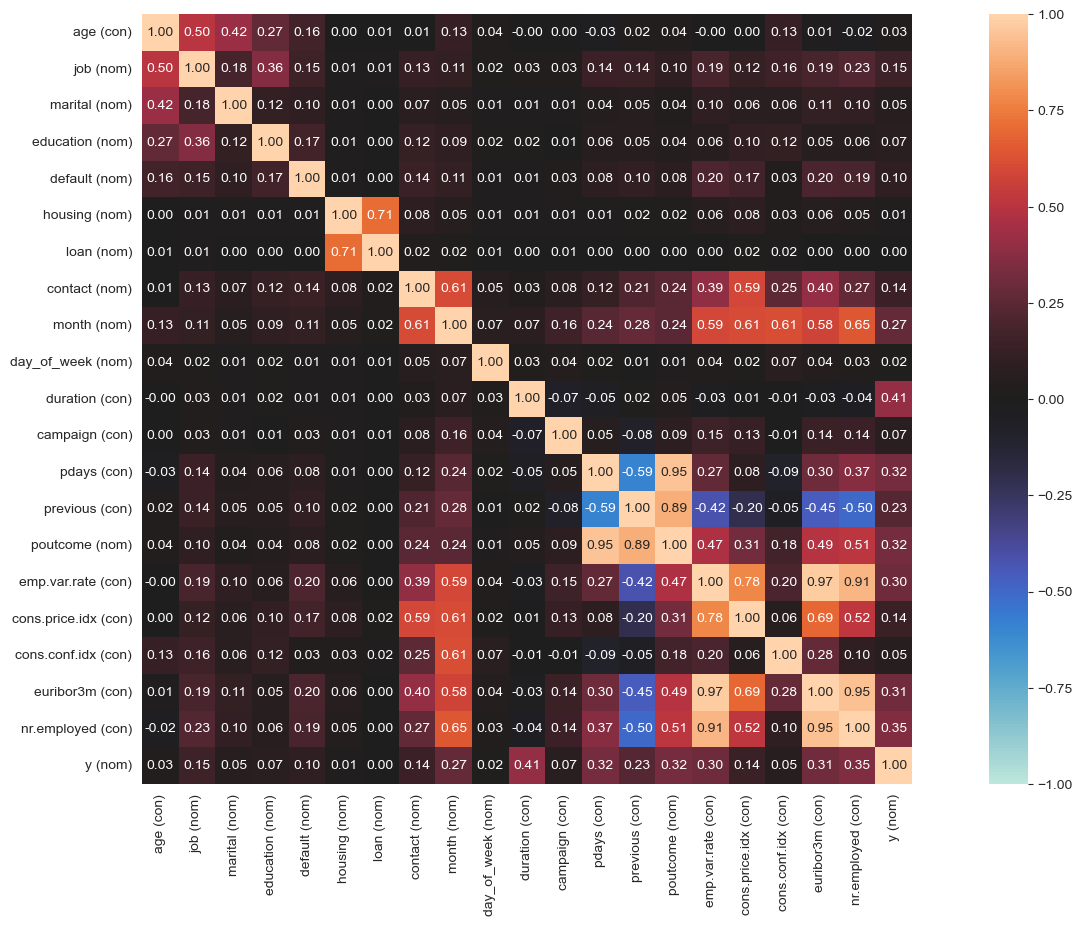

{'corr':                       age (con)  job (nom)  marital (nom)  education (nom)  \
 age (con)              1.000000   0.504885       0.419066         0.268738   
 job (nom)              0.504885   1.000000       0.183736         0.359432   
 marital (nom)          0.419066   0.183736       1.000000         0.116258   
 education (nom)        0.268738   0.359432       0.116258         1.000000   
 default (nom)          0.164969   0.152073       0.095398         0.170387   
 housing (nom)          0.001742   0.010464       0.009121         0.013230   
 loan (nom)             0.007349   0.010166       0.000000         0.000000   
 contact (nom)          0.006812   0.127855       0.072006         0.123125   
 month (nom)            0.125817   0.109749       0.049959         0.094720   
 day_of_week (nom)      0.037807   0.016373       0.011059         0.019726   
 duration (con)        -0.000751   0.028801       0.012999         0.018122   
 campaign (con)         0.004650   0.029941 

In [568]:
associations(data,figsize=(20,10),mark_columns=True)

**NOTE= there are high positive corelation between emp.var.rate, euribor3m,nr.employed and tehre medium negative corelation between nr.employed and previous then between pdays and previous**

#### 4.1.1. Finding dependent variables corelation rate with dependent variable in descending order

In [569]:
#first copy data and use for label encoding
data_copy=data.copy()

In [570]:
# secondly, convert categorical y into numeric to find corelation 
le=LabelEncoder()
data_copy['y']=le.fit_transform(data_copy['y'])
data_copy['y'].dtype

dtype('int64')

In [571]:
# create corr matrix and ordered features according their ascending values 
corr_matrix = data_copy.corr()
a=corr_matrix["y"].sort_values(ascending=False)
print(a)

y                 1.000000
duration          0.405321
previous          0.230222
cons.conf.idx     0.054726
age               0.030362
campaign         -0.066364
cons.price.idx   -0.136057
emp.var.rate     -0.298243
euribor3m        -0.307709
pdays            -0.324981
nr.employed      -0.354660
Name: y, dtype: float64


**NOTE= duration has medium corelation between depended variable 'y' and there is no significant corelation with other features**

### 4.2. CHECKING OUTLIERS

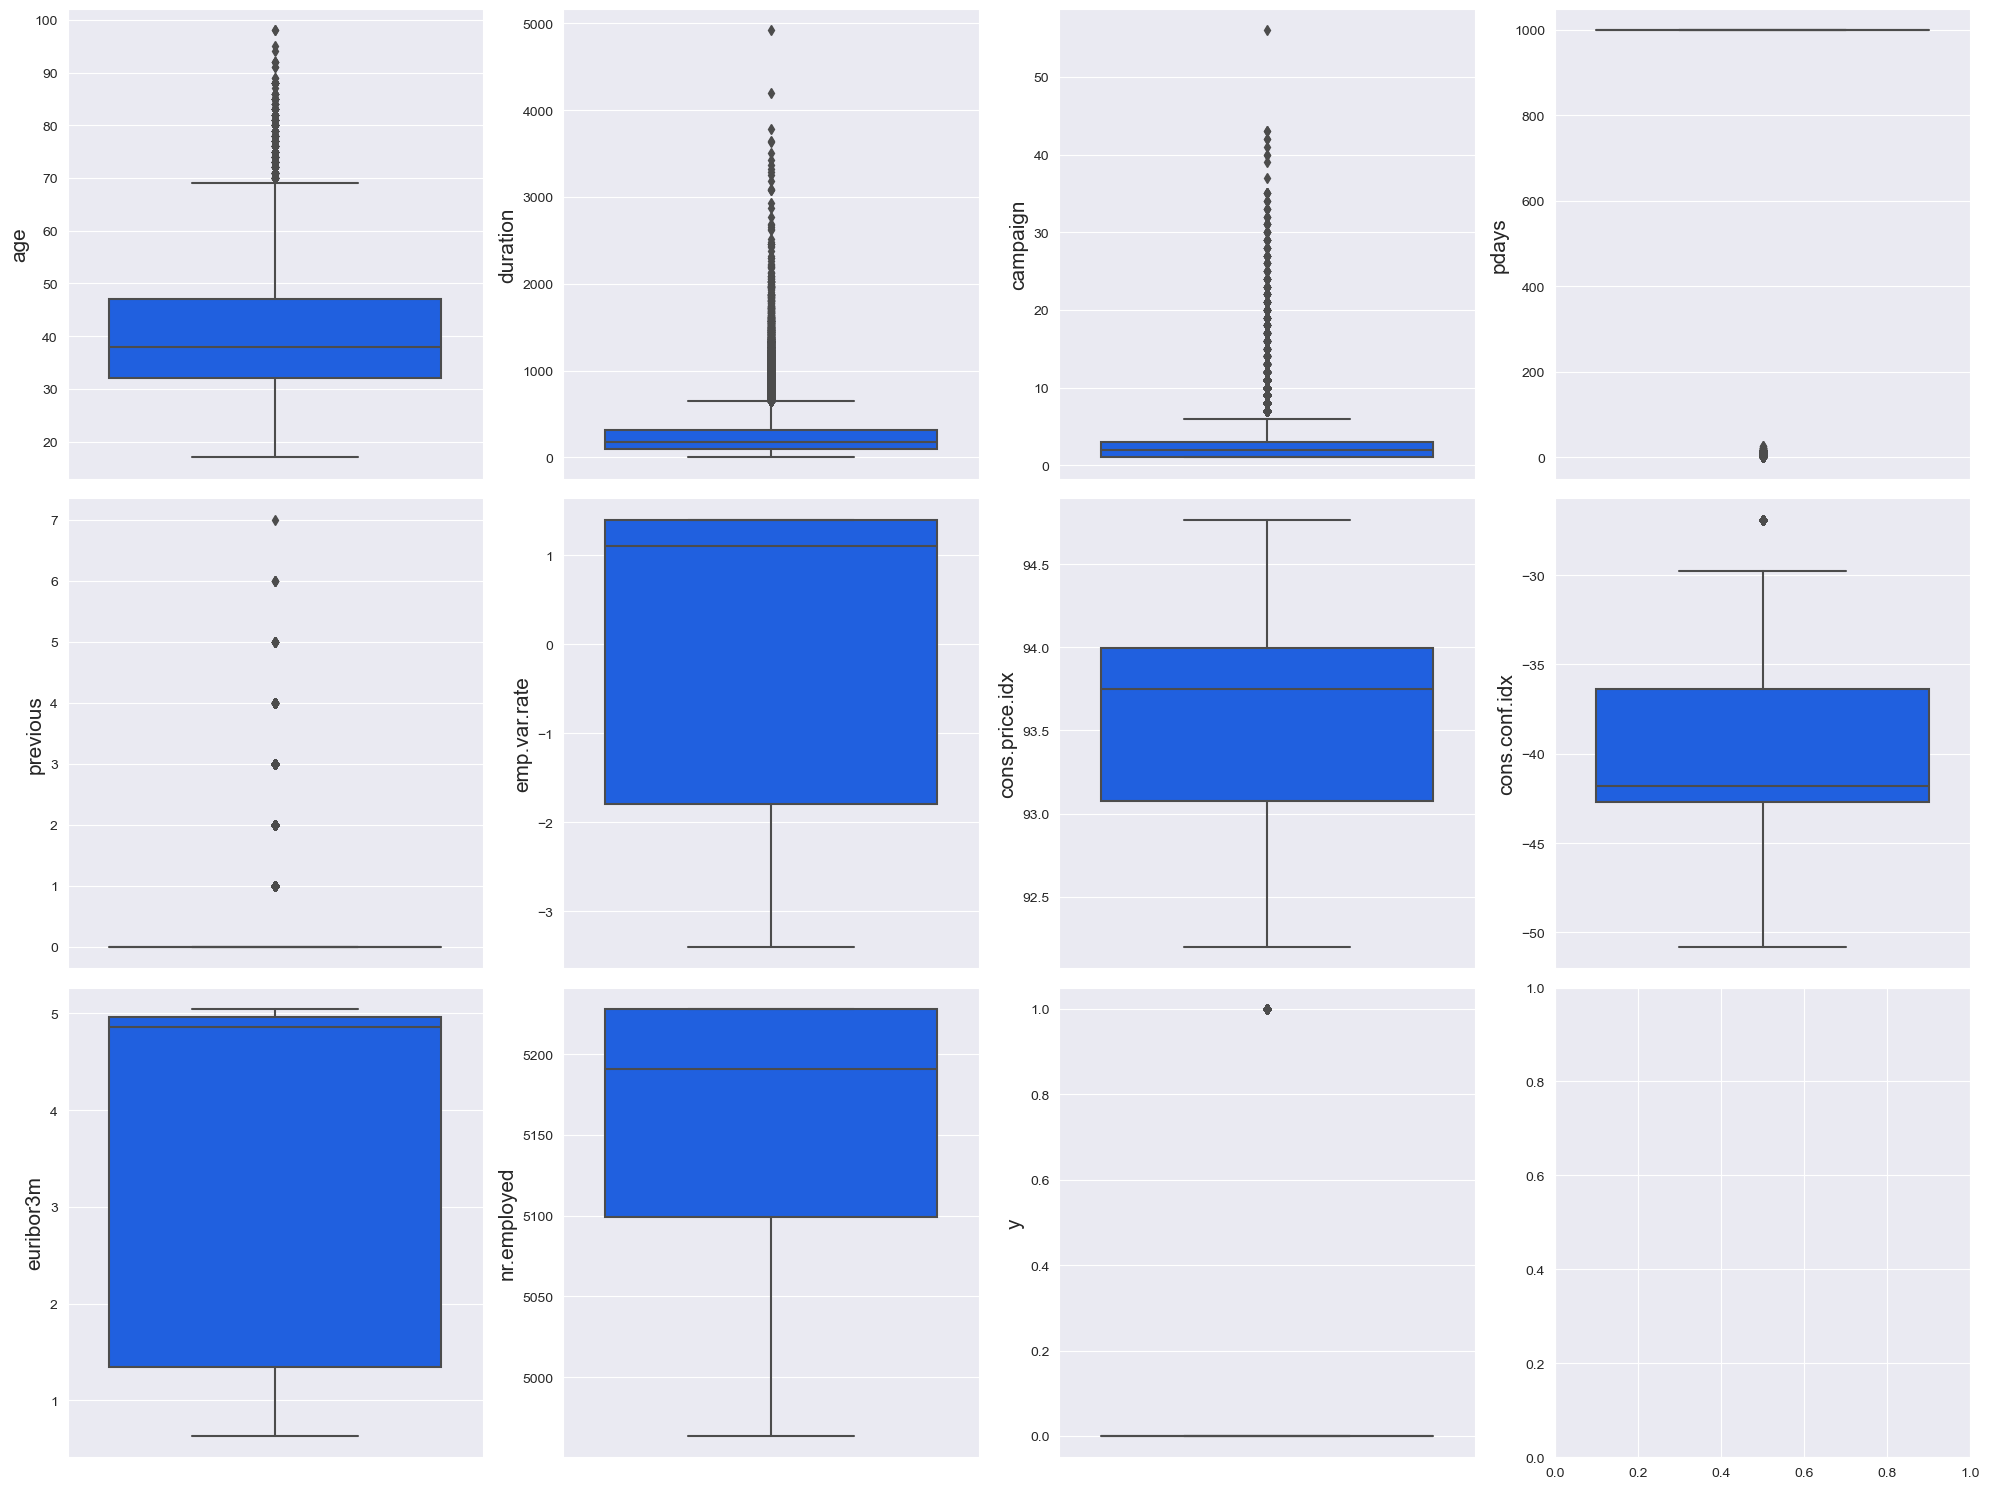

In [572]:
sns.set_style('darkgrid')
colors = ['#0055ff', '#ff7000']
CustomPalette = sns.set_palette(sns.color_palette(colors))
OrderedCols = data_copy.select_dtypes(exclude='category')
fig, ax = plt.subplots(3, 4, figsize=(20,15),dpi=100)

for i,col in enumerate(OrderedCols):
    x = i//4
    y = i%4

    sns.boxplot(data=data_copy, y=col, ax=ax[x,y])
    ax[x,y].yaxis.label.set_size(15)


plt.tight_layout()    
plt.show()

**NOTE= Duration and campaign have a lot of outlier therefore I build model with outliers and without outliers and compare and select the best from them**

### 4.3. CAMPIGN AND Y RELATION ACCORDING TO EACH MONTHS

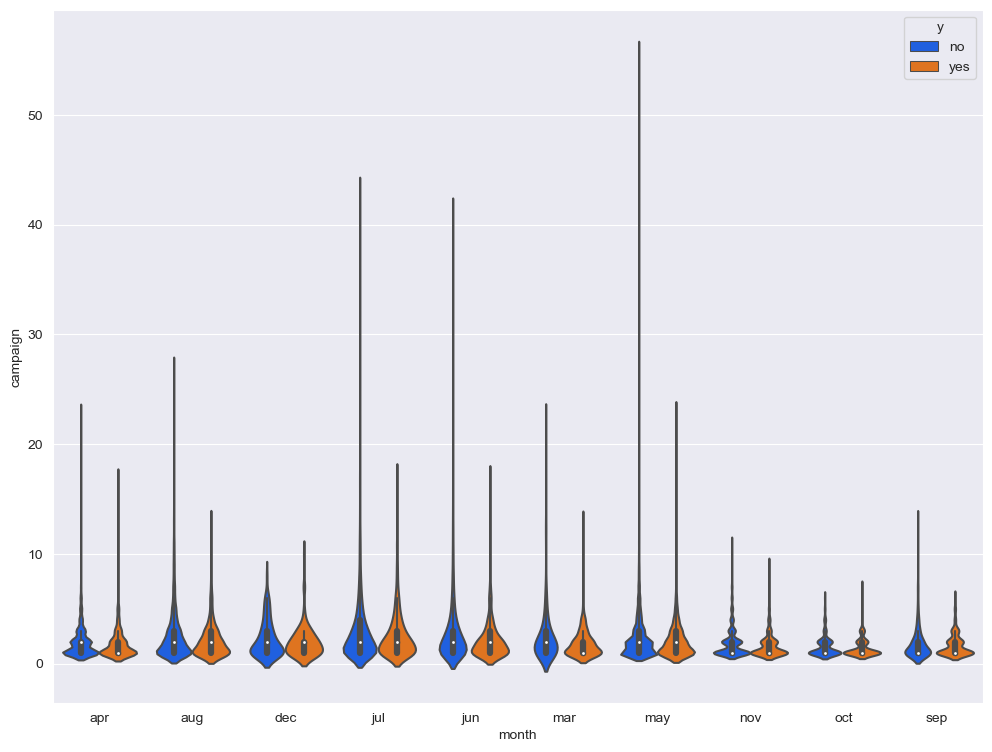

In [573]:
plt.figure(figsize=(12,9))
sns.violinplot(y='campaign', x='month',hue='y' ,data=data)
plt.show()

**NOTE= The violin graph tells Campaign has no effect on y**

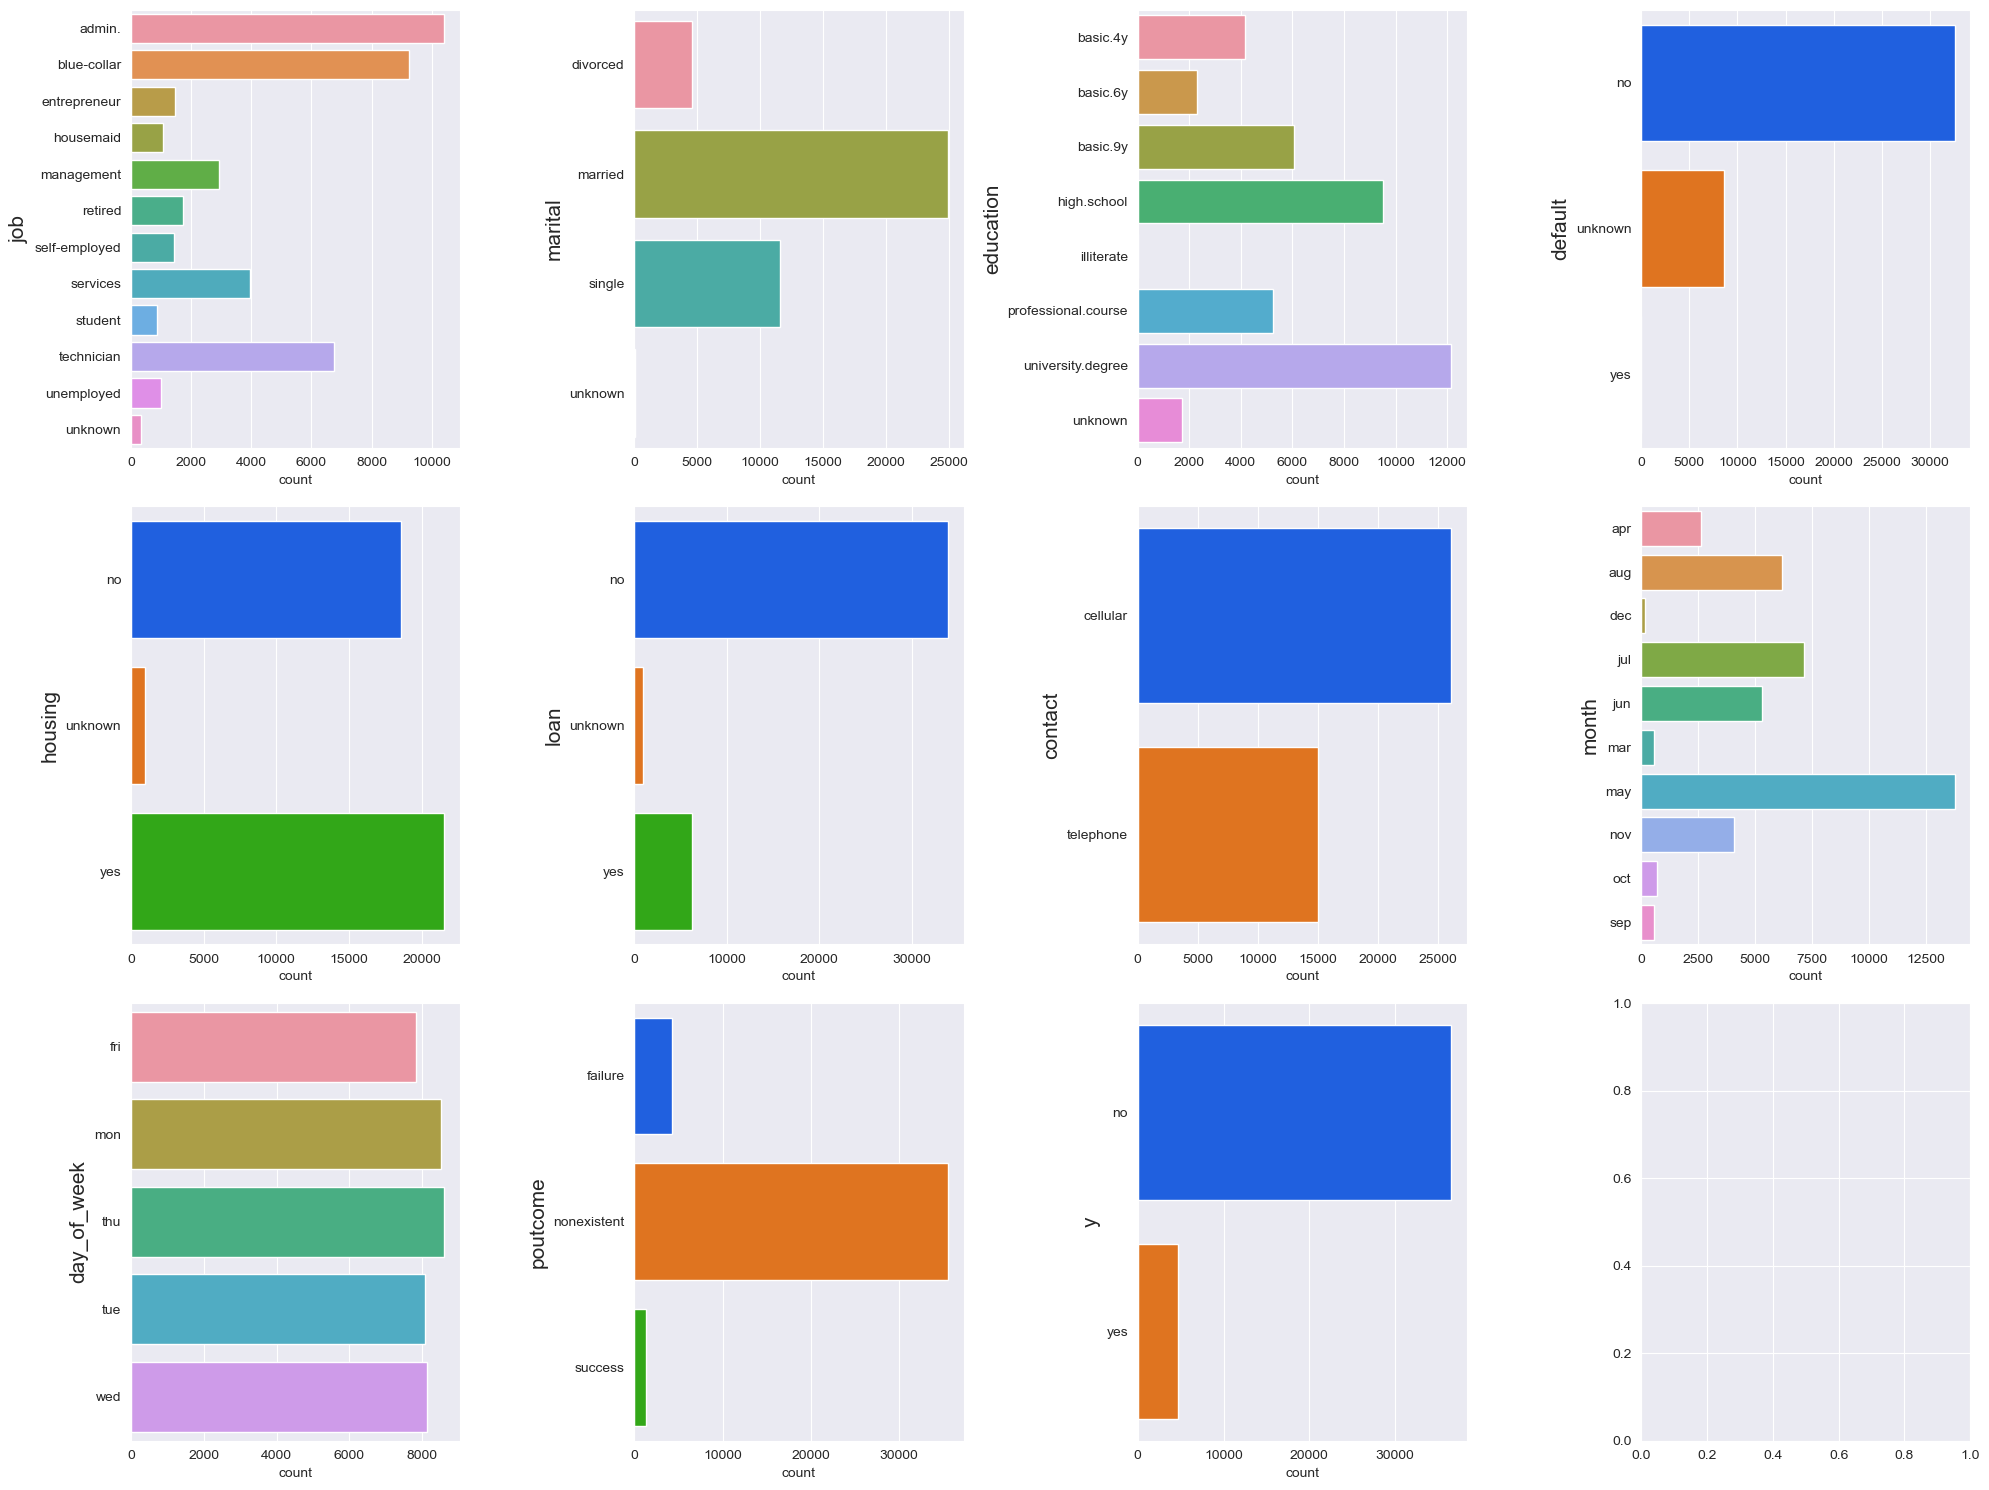

In [574]:
sns.set_style('darkgrid')
colors = ['#0055ff', '#ff7000', '#23bf00']
CustomPalette = sns.set_palette(sns.color_palette(colors))
OrderedCols = data.select_dtypes(include='category')
fig, ax = plt.subplots(3, 4, figsize=(20,15),dpi=100)

for i,col in enumerate(OrderedCols):
    x = i//4
    y = i%4

    sns.countplot(data=data, y=col, ax=ax[x,y])
    ax[x,y].yaxis.label.set_size(15)


plt.tight_layout()    
plt.show()

**NOTE= The figure above explains in poutcome there are too much nonexistent that means previous campaign did not applied.**

**People who do not have loan are considerable amount more than people who do have loan.** 

**People who have housing loan are higher than people who do not have housing loan.**

**Mostly admin, blue collar,techinican are called for term deposit.**

**As a contact type cellular is more preferable. Default includes almost no that means people do not have another loan.** 

**Most of people that are called for bank deposit are married besides People who have university degree and highschool degree are more preferable for asking bank deposit**

# 5. MODELLING<a class="anchor" id="MODELLING"></a>

In this section I try to find best score without any biases with trrying different types of classification model and processes.

In data yes 'y' is imbalanced depends on how many people say yes or no for bank deposit. Therefore I think dividing modellling into two part.

In part-1, I build classification models without balancing data but adjusting evaluating score metrics depend on imbalanced data.

In part-2, I will build model after balancing data.

To specify what will I do in modelling parts. Fisrtly, I will apply preprocessing ( Imputing missing data, Encoding categorical features, Dimension reduction ..). Following this I will try different types of base classification models (Random Forest, Logistic Regression,XGBoost..)and see which onescan give best score. After then picking best model types, I will apply Hyperparameter tuning (Optuna)to improve results of models. 

## 5.1 PART1-BUILD-MODEL-WITHOUT-BALANCING-DATA-BUT-ADJUST-EVALUATING-SCORES<a class="anchor" id="PART1-BUILD-MODEL-WITHOUT-BALANCING-DATA-BUT-ADJUST-EVALUATING-SCORES"></a>

In this section, I will build model after dropping all NaN values, encoding categorical values , apply classification models, choose the best 3 ones and define correct evaluation metrics for comparing the.

Also Using XGBoost (Extreme Gradient Boosting), TreeBased and specifically **BalancedBaggingClassifier** model can proper for imbalanced data because It is an advanced and more efficient implementation of gradient boosted decision trees designed for speed and performance. It is 10 times faster than the normal Gradient Boosting as it implements parallel processing. It is highly flexible as users can define custom optimization objectives and evaluation criteria, has an inbuilt mechanism to handle missing values. Unlike gradient boosting which stops splitting a node as soon as it encounters a negative loss, XG Boost splits up to the maximum depth specified and prunes the tree backward and removes splits beyond which there is an only negative loss. Extreme gradient boosting can be done using the XGBoost package in R and Python.

### 5.1.1 DATA CLEANING<a class="anchor" id="DATA-CLEANING"></a> 

In [575]:
# See data is imbalanced or not:
data['y'].value_counts()

no     36526
yes     4638
Name: y, dtype: int64

### 5.1.1.1. Turn "unknown" into NaN for the aim of filling missing values

In [576]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [577]:
# Turn "unknown" into NaN for the aim of filling missing values:
data.replace("unknown", np.nan, inplace=True)

In [578]:
data.isnull().sum()

age                  0
job                330
marital             80
education         1729
default           8595
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

### 5.1.1.2. Transform pdays value 999 into 0 

In [579]:
#In pdays columns adding 999 for non called customers but it is a big number so I change with 0:
data['pdays']=data['pdays'].replace(999,0)


In [580]:
data.head()

age        job  marital    education default housing loan    contact month  \
0   56  housemaid  married     basic.4y      no      no   no  telephone   may   
1   57   services  married  high.school     NaN      no   no  telephone   may   
2   37   services  married  high.school      no     yes   no  telephone   may   
3   40     admin.  married     basic.6y      no      no   no  telephone   may   
4   56   services  married  high.school      no      no  yes  telephone   may   

  day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0         mon  ...         1      0         0  nonexistent          1.1   
1         mon  ...         1      0         0  nonexistent          1.1   
2         mon  ...         1      0         0  nonexistent          1.1   
3         mon  ...         1      0         0  nonexistent          1.1   
4         mon  ...         1      0         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

### 5.1.1.3. Change columns values to delete punctuation on them

In [581]:
data.education.value_counts()

university.degree      12160
high.school             9509
basic.9y                6045
professional.course     5237
basic.4y                4176
basic.6y                2290
illiterate                18
Name: education, dtype: int64

In [582]:
# CHANGE VALUE OF EDUCATION COLUMN WITH PROPER NAME ,ESCAPING PUNCTUATION ON THEM
data.education = data.education.replace( ['university.degree','high.school','basic.9y','professional.course','basic.4y','basic.6y','illiterate'],
                                        ['universitydegree','highschool','basic9y','professionalcourse','basic4y','basic6y','illiterate'] )

In [583]:
data.education.value_counts()

universitydegree      12160
highschool             9509
basic9y                6045
professionalcourse     5237
basic4y                4176
basic6y                2290
illiterate               18
Name: education, dtype: int64

In [584]:
data.job.value_counts()

admin.           10416
blue-collar       9252
technician        6735
services          3965
management        2924
retired           1716
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
Name: job, dtype: int64

In [585]:
# CHANGE VALUE OF JOB COLUMN WITH PROPER NAME ,ESCAPING PUNCTUATION ON THEM
data.job = data.job.replace( ['admin.','blue-collar','self-employed'],['admin','bluecollar','selfemployed'] )

In [586]:
data['job'].value_counts()

admin           10416
bluecollar       9252
technician       6735
services         3965
management       2924
retired          1716
entrepreneur     1456
selfemployed     1421
housemaid        1060
unemployed       1014
student           875
Name: job, dtype: int64

### 5.1.1.4 Drop unecessary columns

In [587]:
data_new=data.drop(['duration','month','day_of_week'],axis=1)
data_new.head()

age        job  marital   education default housing loan    contact  \
0   56  housemaid  married     basic4y      no      no   no  telephone   
1   57   services  married  highschool     NaN      no   no  telephone   
2   37   services  married  highschool      no     yes   no  telephone   
3   40      admin  married     basic6y      no      no   no  telephone   
4   56   services  married  highschool      no      no  yes  telephone   

   campaign  pdays  previous     poutcome  emp.var.rate  cons.price.idx  \
0         1      0         0  nonexistent           1.1          93.994   
1         1      0         0  nonexistent           1.1          93.994   
2         1      0         0  nonexistent           1.1          93.994   
3         1      0         0  nonexistent           1.1          93.994   
4         1      0         0  nonexistent           1.1          93.994   

   cons.conf.idx  euribor3m  nr.employed   y  
0          -36.4      4.857       5191.0  no  
1          -36.4      4.857       5191.0  no  
2          -36.4      4.857       5191.0  no  
3          -36.4      4.857       5191.0  no  
4          -36.4      4.857       5191.0  no

In [588]:
data_new.to_csv('/Users/goncaavcicakmak/Desktop/ads-542-finalproject/data/cleaned_data.csv')

### 5.1.1.5 Dropping Outliers

There are outliers in age and campaign features. I try to drop them 

#### Dropping Age Outlier

In [589]:
# IQR
Q1 = np.percentile(data_new['age'], 25)
Q3 = np.percentile(data_new['age'], 75)
IQR = Q3 - Q1
print(IQR)

15.0


In [590]:

# Above Upper bound
upper=Q3+1.5*IQR
upper_array=np.array(data_new['age']>=upper)
print("Upper Bound:",upper)
print(upper_array.sum())
 
#Below Lower bound
lower=Q1-1.5*IQR
lower_array=np.array(data_new['age']<=lower)
print("Lower Bound:",lower)
print(lower_array.sum())

Upper Bound: 69.5
467
Lower Bound: 9.5
0


<AxesSubplot:>

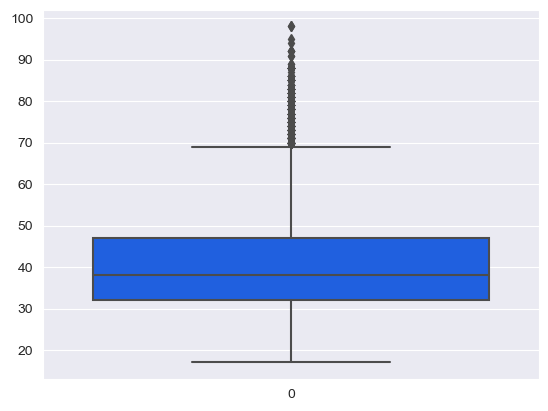

In [591]:
sns.boxplot(data_new['age'])

In [592]:
data_new2= data_new[data_new['age']<70]
data_new2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40697 entries, 0 to 41186
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             40697 non-null  int64   
 1   job             40373 non-null  category
 2   marital         40617 non-null  category
 3   education       39016 non-null  category
 4   default         32145 non-null  category
 5   housing         39716 non-null  category
 6   loan            39716 non-null  category
 7   contact         40697 non-null  category
 8   campaign        40697 non-null  int64   
 9   pdays           40697 non-null  int64   
 10  previous        40697 non-null  int64   
 11  poutcome        40697 non-null  category
 12  emp.var.rate    40697 non-null  float64 
 13  cons.price.idx  40697 non-null  float64 
 14  cons.conf.idx   40697 non-null  float64 
 15  euribor3m       40697 non-null  float64 
 16  nr.employed     40697 non-null  float64 
 17  y           

<AxesSubplot:>

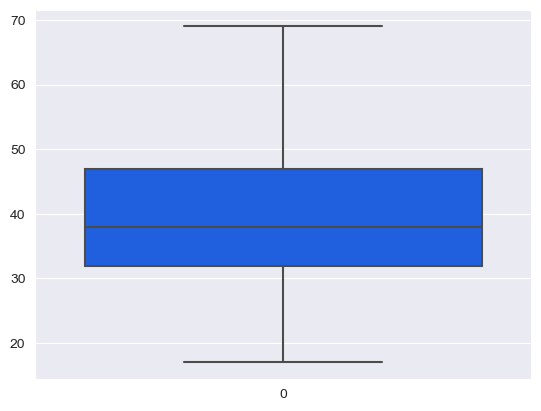

In [593]:
sns.boxplot(data_new2['age'])

#### Dropping Campaing Outliers

In [594]:
# IQR
Q1 = np.percentile(data_new['campaign'], 25)
Q3 = np.percentile(data_new['campaign'], 75)
IQR = Q3 - Q1
print(IQR)

2.0


In [595]:
# Above Upper bound
upper=Q3+1.5*IQR
upper_array=np.array(data_new['campaign']>=upper)
print("Upper Bound:",upper)
print(upper_array.sum())
 
#Below Lower bound
lower=Q1-1.5*IQR
lower_array=np.array(data_new['campaign']<=lower)
print("Lower Bound:",lower)
print(lower_array.sum())

Upper Bound: 6.0
3385
Lower Bound: -2.0
0


<AxesSubplot:>

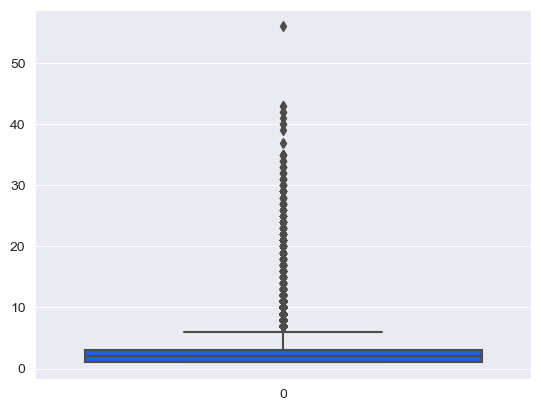

In [596]:
sns.boxplot(data_new2['campaign'])

In [597]:
data_new2= data_new[data_new['campaign']<8]
data_new2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39387 entries, 0 to 41187
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             39387 non-null  int64   
 1   job             39078 non-null  category
 2   marital         39315 non-null  category
 3   education       37741 non-null  category
 4   default         31242 non-null  category
 5   housing         38443 non-null  category
 6   loan            38443 non-null  category
 7   contact         39387 non-null  category
 8   campaign        39387 non-null  int64   
 9   pdays           39387 non-null  int64   
 10  previous        39387 non-null  int64   
 11  poutcome        39387 non-null  category
 12  emp.var.rate    39387 non-null  float64 
 13  cons.price.idx  39387 non-null  float64 
 14  cons.conf.idx   39387 non-null  float64 
 15  euribor3m       39387 non-null  float64 
 16  nr.employed     39387 non-null  float64 
 17  y           

<AxesSubplot:>

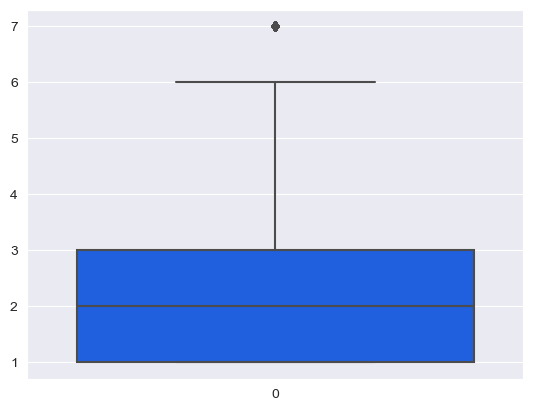

In [598]:
sns.boxplot(data_new2['campaign'])

In [599]:
data_new2.isnull().sum()

age                  0
job                309
marital             72
education         1646
default           8145
housing            944
loan               944
contact              0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [600]:
data_new2.to_csv("/Users/goncaavcicakmak/Desktop/ads-542-finalproject/data/train.csv")

NOTE= Classification models like XGBoost, GradientBoosting,RandomForest are robust to outliers It is not so important deleting outliers

### 5.1.2 DATA PREPROCESSING<a class="anchor" id="DATA-PREPROCESSING"></a> 

#### 5.1.2.1 ONEHOT ENCODING AND ORDINAL ENCODING

**I apply Onehot Encoding for turning  nominal categorical data ('marital','housing','loan','poutcome','y') into numeric.**

**Besides I apply OrdinalEncoding for turning ordinal categorical data (education, job) into numeric**

In [601]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
onehot=OneHotEncoder()
ordinal=OrdinalEncoder()
label=LabelEncoder()

In [646]:
# GET DUMMY FOR NOMINAL VARIABLES :
df_onehot=pd.get_dummies(data_new2[['contact','default','housing','loan','y']], drop_first=True)
df_onehot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39387 entries, 0 to 41187
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   contact_telephone  39387 non-null  uint8
 1   default_yes        39387 non-null  uint8
 2   housing_yes        39387 non-null  uint8
 3   loan_yes           39387 non-null  uint8
 4   y_yes              39387 non-null  uint8
dtypes: uint8(5)
memory usage: 1.5 MB


### Get Ordinal Encoder for Education and Job

In [647]:
# GET ORDINAL ENCODER FOR ORDINAL COLUMNS
data_new2[['education','job']] =ordinal.fit_transform(data_new2[['education','job']])

In [648]:
# GET LABEL ENCODER FOR MARITAL AND POUTCOME BECAUSE I DO NOT WANT TO PRODUCE EXTRA COLUMNS WITH USING ONEHOT FOR MARITAL AND POUTCOME

In [649]:
data_new2['poutcome'] = label.fit_transform(data_new2['poutcome'])

In [650]:
data_new2['marital'] = label.fit_transform(data_new2['marital'])
data_new2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39387 entries, 0 to 41187
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             39387 non-null  int64   
 1   job             39078 non-null  float64 
 2   marital         39387 non-null  int64   
 3   education       37741 non-null  float64 
 4   default         31242 non-null  category
 5   housing         38443 non-null  category
 6   loan            38443 non-null  category
 7   contact         39387 non-null  category
 8   campaign        39387 non-null  int64   
 9   pdays           39387 non-null  int64   
 10  previous        39387 non-null  int64   
 11  poutcome        39387 non-null  int64   
 12  emp.var.rate    39387 non-null  float64 
 13  cons.price.idx  39387 non-null  float64 
 14  cons.conf.idx   39387 non-null  float64 
 15  euribor3m       39387 non-null  float64 
 16  nr.employed     39387 non-null  float64 
 17  y           

### Concat all encoded dataframes 

In [651]:
df2=pd.concat([data_new2,df_onehot], axis=1)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39387 entries, 0 to 41187
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   age                39387 non-null  int64   
 1   job                39078 non-null  float64 
 2   marital            39387 non-null  int64   
 3   education          37741 non-null  float64 
 4   default            31242 non-null  category
 5   housing            38443 non-null  category
 6   loan               38443 non-null  category
 7   contact            39387 non-null  category
 8   campaign           39387 non-null  int64   
 9   pdays              39387 non-null  int64   
 10  previous           39387 non-null  int64   
 11  poutcome           39387 non-null  int64   
 12  emp.var.rate       39387 non-null  float64 
 13  cons.price.idx     39387 non-null  float64 
 14  cons.conf.idx      39387 non-null  float64 
 15  euribor3m          39387 non-null  float64 
 16  nr.e

In [652]:
df3=df2.drop(['y','default','loan','housing','contact'],axis=1)

In [653]:
df3.isnull().sum()

age                     0
job                   309
marital                 0
education            1646
campaign                0
pdays                   0
previous                0
poutcome                0
emp.var.rate            0
cons.price.idx          0
cons.conf.idx           0
euribor3m               0
nr.employed             0
contact_telephone       0
default_yes             0
housing_yes             0
loan_yes                0
y_yes                   0
dtype: int64

In [654]:
df3.rename(columns = {'y_yes':'y','contact_telephone':'contact', 'default_yes':'default', 'loan_yes':'loan','housing_yes':'housing'}, inplace = True)

### 5.1.2.2 IMPUTING NAN VALUES 

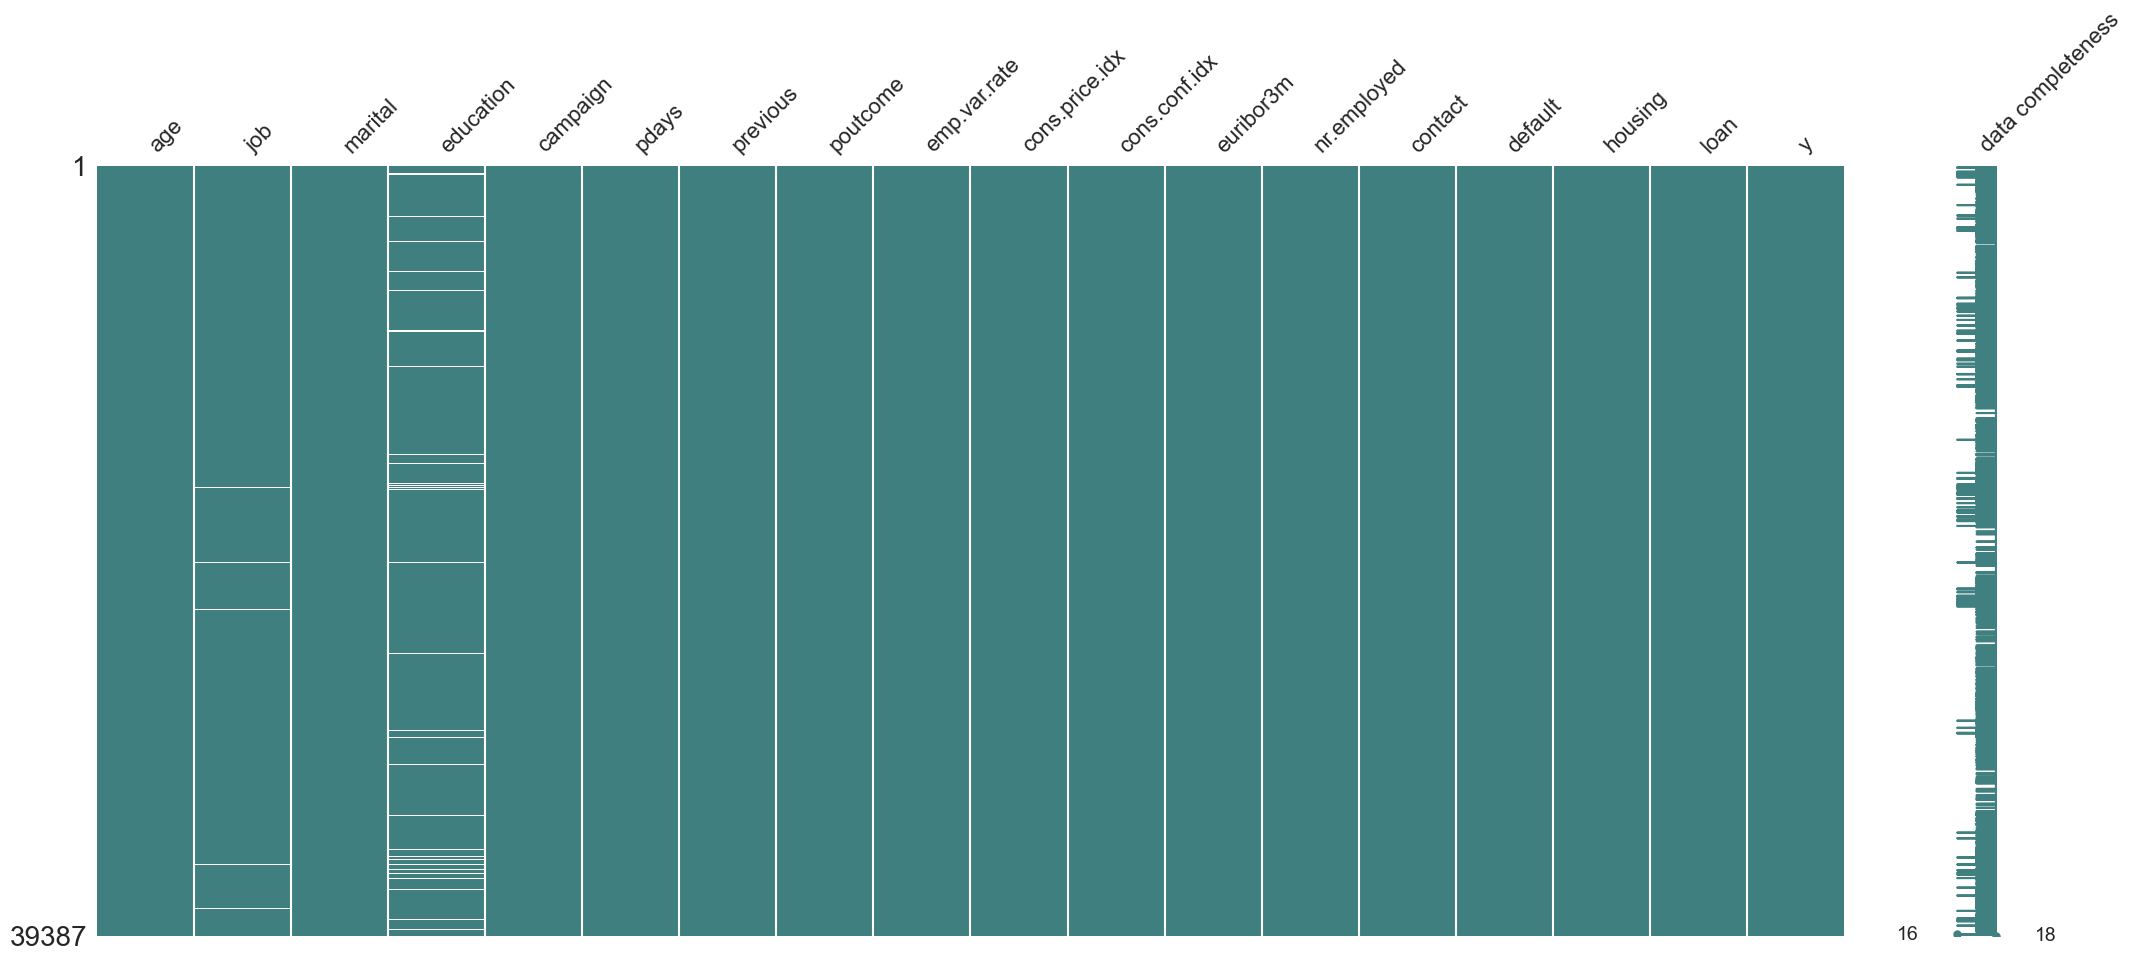

In [656]:
mnso.matrix(df3,labels=80,label_rotation=45,color=(0.25,0.50,0.50));plt.show()

#### Heatmap of Missing Values

Heatmap of missing value show the correlation between missing values of each variables. For example education and job have 0.2 corelattion so when education's missing value and job's missing value can be seen at the same time with 0.2 range

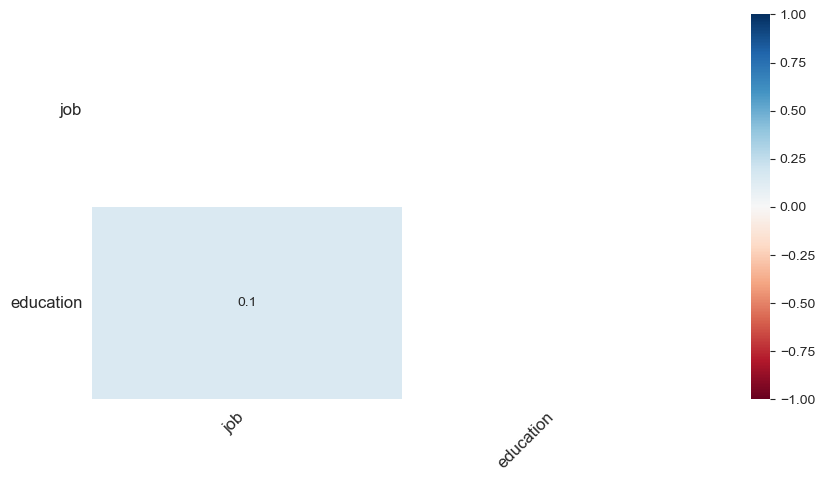

In [657]:
mnso.heatmap(df3, figsize=(10,5), fontsize=12);

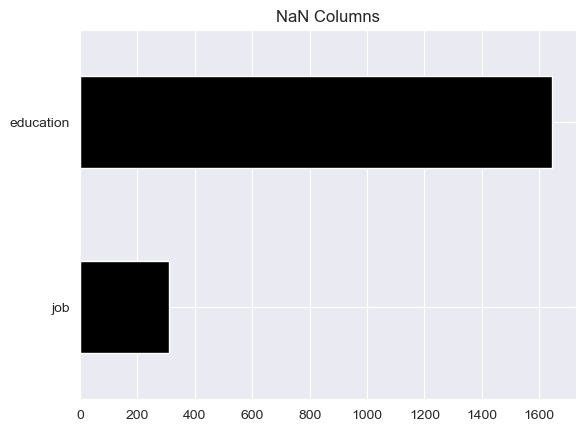

In [658]:
nans = df3.isnull().sum().sort_values()
nans = nans[nans>0]
nans.plot(kind="barh",color="black");plt.title("NaN Columns");plt.show()

In [659]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
imputed = imputer.fit_transform(df3)
df_imputed = pd.DataFrame(imputed, columns=df3.columns)

In [660]:
df_imputed.isnull().sum()

age               0
job               0
marital           0
education         0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
contact           0
default           0
housing           0
loan              0
y                 0
dtype: int64

In [670]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39387 entries, 0 to 39386
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             39387 non-null  float64
 1   job             39387 non-null  float64
 2   marital         39387 non-null  float64
 3   education       39387 non-null  float64
 4   campaign        39387 non-null  float64
 5   pdays           39387 non-null  float64
 6   previous        39387 non-null  float64
 7   poutcome        39387 non-null  float64
 8   emp.var.rate    39387 non-null  float64
 9   cons.price.idx  39387 non-null  float64
 10  cons.conf.idx   39387 non-null  float64
 11  euribor3m       39387 non-null  float64
 12  nr.employed     39387 non-null  float64
 13  contact         39387 non-null  float64
 14  default         39387 non-null  float64
 15  housing         39387 non-null  float64
 16  loan            39387 non-null  float64
 17  y               39387 non-null 

#### Splitting data into train and test set

In [671]:
y=df_imputed['y']

In [672]:
X=df_imputed.drop('y',axis=1)

In [673]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=0)

### 5.1.3 BUILD MODELS AND COMPARE THEIR RESULTS<a class="anchor" id="BUILD-MODELS-AND-COMPARE-THEIR-RESULTS"></a>

In [674]:
names = ['Logistic Regression', "KNN","Gradient Boosting", "Decision Tree", "RandomForest","XGB","CatBoost","LGBM", "BaggingClassifier","BalancedBaggingClassifier"]
classifiers = [LogisticRegression(solver='liblinear',random_state=42),
               KNeighborsClassifier(n_neighbors=3, weights= 'distance'),
               GradientBoostingClassifier(n_estimators=100, random_state=42),
               DecisionTreeClassifier(max_depth=5,  random_state=42),
               RandomForestClassifier(max_depth=5, n_estimators=100, random_state=42),
               xgb.XGBClassifier(n_estimators = 500,learning_rate = 0.05,use_label_encoder = False,n_jobs = -1),
               CatBoostClassifier(iterations=5, learning_rate=0.1),
               lgb.LGBMClassifier(n_estimators=1000, num_leaves=50),
               BaggingClassifier(random_state=0),
               BalancedBaggingClassifier(random_state=0)]

####  5.1.3.1 Choosing best three of them and Comparing their different types of Metric Scores 


To choose right evaluation metrics for imbalanced data, Popular alternatives are the precision and recall scores that allow the performance of the model to be considered by focusing on the minority class, called the positive class.

Precision calculates the ratio of the number of correctly predicted positive examples divided by the total number of positive examples that were predicted. Maximizing the precision will minimize the false positives.

Precision = TruePositives / (TruePositives + FalsePositives)

Recall predicts the ratio of the total number of correctly predicted positive examples divided by the total number of positive examples that could have been predicted. Maximizing recall will minimize false negatives.

Recall = TruePositives / (TruePositives + FalseNegatives)

The performance of a model can be summarized by a single score that averages both the precision and the recall, called the F-Measure. Maximizing the F-Measure will maximize both the precision and recall at the same time.

F1 = (2 * Precision * Recall) / (Precision + Recall)

In the above graph, It is understandbale which metrics can be used for our problem:

<p style="text-align:center;"><img src="https://machinelearningmastery.com/wp-content/uploads/2019/12/How-to-Choose-a-Metric-for-Imbalanced-Classification-latest.png" alt="Logo"></p>


Calculating F1, F0.5 and F2 :

F0.5-Measure (beta=0.5): More weight on precision, less weight on recall.
F1-Measure (beta=1.0): Balance the weight on precision and recall.
F2-Measure (beta=2.0): Less weight on precision, more weight on recall

F-Measure = (2 * Precision * Recall) / (Precision + Recall)

F0.5-Measure = (1.25 * Precision * Recall) / (0.25 * Precision + Recall)

F2-Measure = (5 * Precision * Recall) / (4 * Precision + Recall)

#### 5.1.3.2. HOW DECIDE WHICH METRIC IS THE BEST OUR PROBLEM

For our problem , It is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call. Hence, False negative is more costly because If We guess wrongly people who can not  take bank deposit but we say they can take the deposit there are to much wrong phone calls. 

Therefore It is the best choice to look F0.5 Score.

In [675]:
scores = []
f2_score=[]
p_score=[]
r_score=[]
f1_score=[]
f05_score=[]
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    score = clf.score(X_test,y_test)
    y_pred=clf.predict(X_test)
    p = precision_score(y_test, y_pred)
    r = recall_score(y_test, y_pred)
    f1= fbeta_score(y_test, y_pred, beta=1.0)
    f2=fbeta_score(y_test, y_pred, beta=2.0)
    f05=fbeta_score(y_test, y_pred, beta=0.5)
    scores.append(score)
    f2_score.append(f2)
    p_score.append(f2)
    r_score.append(f2)
    f1_score.append(f2)
    f05_score.append(f05)
    
    
scores_df = pd.DataFrame()


0:	learn: 0.6292536	total: 2.76ms	remaining: 11ms
1:	learn: 0.5772600	total: 5.45ms	remaining: 8.18ms
2:	learn: 0.5342407	total: 8.01ms	remaining: 5.34ms
3:	learn: 0.4983946	total: 10.6ms	remaining: 2.66ms
4:	learn: 0.4674291	total: 13.1ms	remaining: 0us


In [676]:
scores_df['name'] = names
scores_df['score'] = np.around(scores,3)
scores_df['f2']= np.around(f2_score,3)
scores_df['f1']= np.around(f1_score,3)
scores_df['p']= np.around(p_score,3)
scores_df['r']= np.around(r_score,3)
scores_df['f05']= np.around(f05_score,3)
scores_df.sort_values('score', ascending= False)

name  score     f2     f1      p      r    f05
5                        XGB  0.889  0.306  0.306  0.306  0.306  0.489
3              Decision Tree  0.888  0.276  0.276  0.276  0.276  0.470
6                   CatBoost  0.888  0.217  0.217  0.217  0.217  0.440
4               RandomForest  0.887  0.216  0.216  0.216  0.216  0.434
2          Gradient Boosting  0.886  0.267  0.267  0.267  0.267  0.455
0        Logistic Regression  0.885  0.189  0.189  0.189  0.189  0.400
7                       LGBM  0.885  0.343  0.343  0.343  0.343  0.483
8          BaggingClassifier  0.876  0.310  0.310  0.310  0.310  0.430
1                        KNN  0.867  0.362  0.362  0.362  0.362  0.424
9  BalancedBaggingClassifier  0.816  0.522  0.522  0.522  0.522  0.385

### 5.1.4 HYPERPARAMETER TUNING AND EVALUATION OF XGBOOST<a class="anchor" id="HYPERPARAMETER-TUNING-AND-EVALUATION-OF-XGBOOST"></a>

### CONFUSION MATRIX FOR EVALUATING

A Confusion matrix is an N x N matrix used for evaluating the performance of a classification model, where N is the number of target classes. The matrix compares the actual target values with those predicted by the machine learning model.

<p style="text-align:center;"><img src="https://miro.medium.com/v2/resize:fit:1334/format:webp/1*3yGLac6F4mTENnj5dBNvNQ.jpeg" alt="Logo"></p>

<p style="text-align:center;"><img src="https://miro.medium.com/v2/resize:fit:1218/format:webp/1*jMs1RmSwnYgR9CsBw-z1dw.png" alt="Logo"></p>


 Understanding Confusion Matrix:
 
The following 4 are the basic terminology which will help us in determining the metrics we are looking for.

True Positives (TP): when the actual value is Positive and predicted is also Positive.
True negatives (TN): when the actual value is Negative and prediction is also Negative.
False positives (FP): When the actual is negative but prediction is Positive. Also known as the Type 1 error
False negatives (FN): When the actual is Positive but the prediction is Negative. Also known as the Type 2 error

A confusion matrix is a tabular summary of the number of correct and incorrect predictions made by a classifier. It is used to measure the performance of a classification model. It can be used to evaluate the performance of a classification model through the calculation of performance metrics like accuracy, precision, recall, and F1-score.

<p style="text-align:center;"><img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*ZobYhjM4ZfK9eVXluecg3g.jpeg" alt="Logo"></p>
 

True Positive (TP) 

You predicted positive and it’s true. You predicted that an animal is a cat and it actually is.

True Negative (TN) 

You predicted negative and it’s true. You predicted that animal is not a cat and it actually is not (it’s a dog).

False Positive (Type 1 Error) (FP) 

You predicted positive and it’s false. You predicted that animal is a cat but it actually is not (it’s a dog).

False Negative (Type 2 Error) (FN) 

You predicted negative and it’s false. You predicted that animal is not a cat but it actually is.

#### 5.1.4.1. Hyperparameter Tuning of XGBOOST

In [688]:
from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold,cross_validate
# Build model with parameters for Optuna
def objective(trial):

    param = {
        'max_depth': trial.suggest_int('max_depth', 1, 17),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.15),
        'n_estimators': trial.suggest_int('n_estimators', 50, 1500),
        'subsample': trial.suggest_float('subsample', 0.01, 0.65),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.01, 0.95),
        "reg_alpha":trial.suggest_float("reg_alpha",0.1,0.5),
        "reg_lambda":trial.suggest_float("reg_lambda",0.1,0.5),
        
        "n_jobs":-1, # deploy 100% of gpu's computational power 
        "random_state":42
    }
    
    grad =XGBClassifier(**param)   
    
    grad.fit(X_train,y_train) 

    
    preds = grad.predict(X_test)
    
    y_pred=grad.predict(X_test)
    f05=fbeta_score(y_test, y_pred, beta=0.5)

    return f05

In [689]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=5)
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)

[I 2023-06-10 14:48:53,455] A new study created in memory with name: no-name-2667f846-ed1a-4088-a92e-c985cd78a251
[I 2023-06-10 14:48:56,104] Trial 0 finished with value: 0.46592489568845613 and parameters: {'max_depth': 6, 'learning_rate': 0.03430121887380081, 'n_estimators': 429, 'subsample': 0.03150176944849683, 'colsample_bytree': 0.6229768425822972, 'reg_alpha': 0.11318838893493713, 'reg_lambda': 0.1242233470024154}. Best is trial 0 with value: 0.46592489568845613.
[I 2023-06-10 14:48:59,561] Trial 1 finished with value: 0.463678516228748 and parameters: {'max_depth': 10, 'learning_rate': 0.048635848007215564, 'n_estimators': 663, 'subsample': 0.5911246112798852, 'colsample_bytree': 0.10498576570591729, 'reg_alpha': 0.1916821257923902, 'reg_lambda': 0.10157771193385577}. Best is trial 1 with value: 0.463678516228748.
[I 2023-06-10 14:49:01,085] Trial 2 finished with value: 0.46341463414634143 and parameters: {'max_depth': 2, 'learning_rate': 0.08448123884719554, 'n_estimators': 45

Number of finished trials: 5
Best trial: {'max_depth': 9, 'learning_rate': 0.010008705299660343, 'n_estimators': 581, 'subsample': 0.03694479332889735, 'colsample_bytree': 0.8425085055491284, 'reg_alpha': 0.13072692934995428, 'reg_lambda': 0.2598079582647813}


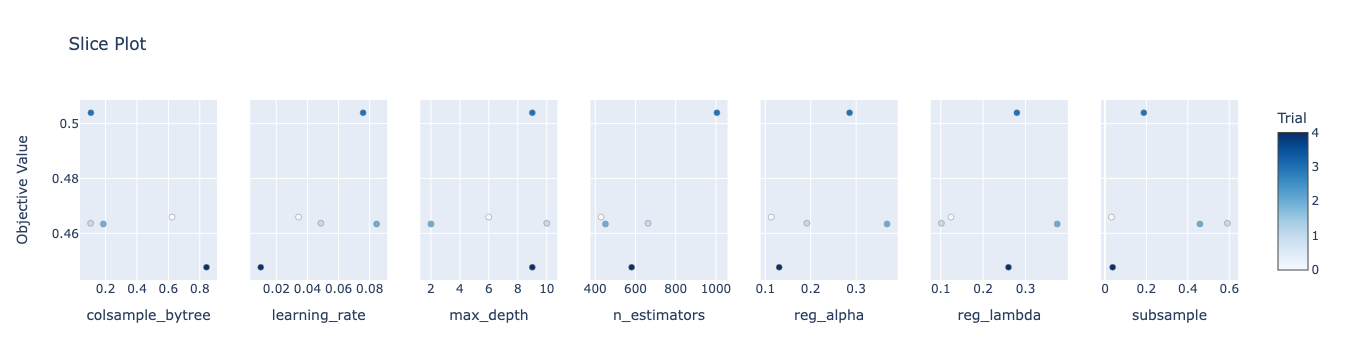

In [690]:
optuna.visualization.plot_slice(study)

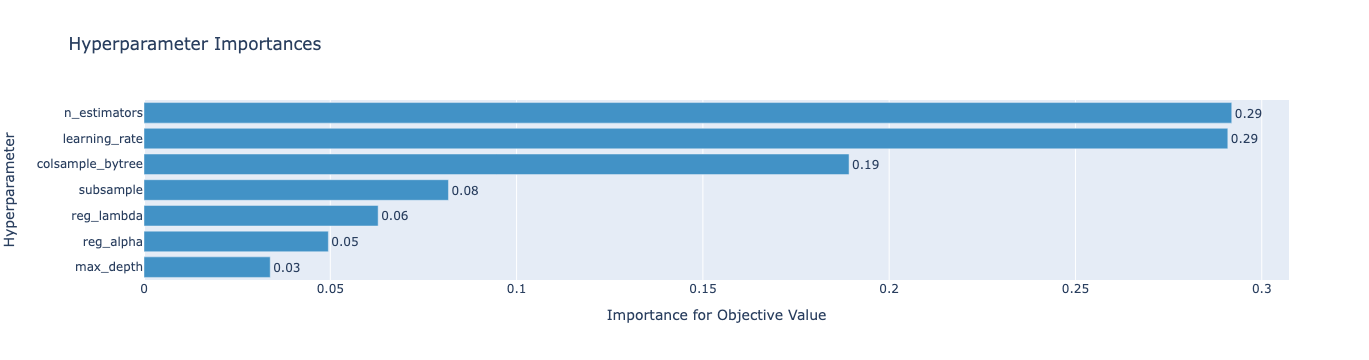

In [691]:
optuna.visualization.plot_param_importances(study)

#### 5.1.4.2 Build Xgboost Model

In [692]:
Best_trial = study.best_trial.params
Best_trial

{'max_depth': 9,
 'learning_rate': 0.010008705299660343,
 'n_estimators': 581,
 'subsample': 0.03694479332889735,
 'colsample_bytree': 0.8425085055491284,
 'reg_alpha': 0.13072692934995428,
 'reg_lambda': 0.2598079582647813}

In [693]:
bestgrad=XGBClassifier(**Best_trial)

In [694]:
bestgrad.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8425085055491284, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.010008705299660343,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=581, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [695]:
y_pred = bestgrad.predict(X_test) 


In [696]:
f05=fbeta_score(y_test, y_pred, beta=0.5)
print(f05)

0.46656298600311036


### 5.1.4.3. Confusion Matrix of Gradient Boosting

In [697]:
cf =confusion_matrix(y_test,y_pred)

In [698]:
exp_series = pd.Series(y_test)
pred_series = pd.Series(y_pred)
pd.crosstab(exp_series, pred_series, rownames=['Actual'], colnames=['Predicted'],margins=True)

Predicted   0  1  All
Actual               
0.0        68  6   74
All        68  6   74

<AxesSubplot:>

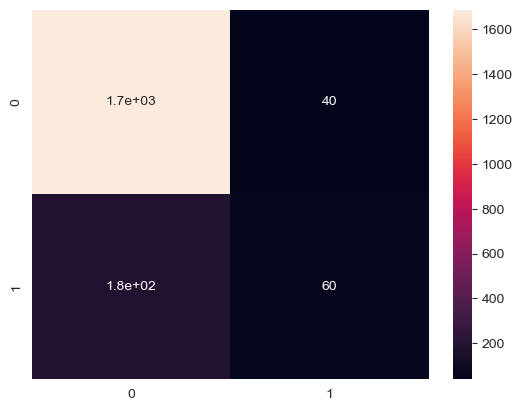

In [699]:
import seaborn as sns
sns.heatmap(cf, annot=True)


### 5.1.3.6. ROC Curve Gradient Boosting

In [700]:
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred)

In [701]:
import plotly.express as px
import plotly.graph_objects as go
import scikitplot as skplt

y_proba = bestgrad.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_proba[:, 1])
thresholds = thresholds[thresholds < 1]

fig = go.Figure()
fig.add_trace(go.Scatter(x=thresholds, y=tpr,
                    mode='lines+markers',
                    name='TPR'))
fig.add_trace(go.Scatter(x=thresholds, y=fpr,
                    mode='lines+markers',
                    name='FPR'))

fig.update_layout(
    title="TPR and FPR for different thresholds",
    xaxis_title="Threshold",
    yaxis_title="Metric value",    
)
fig.show()


### 5.1.4.5. Feature Importance

In [702]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test, y_pred, weights = "quadratic")

0.29946899268071003

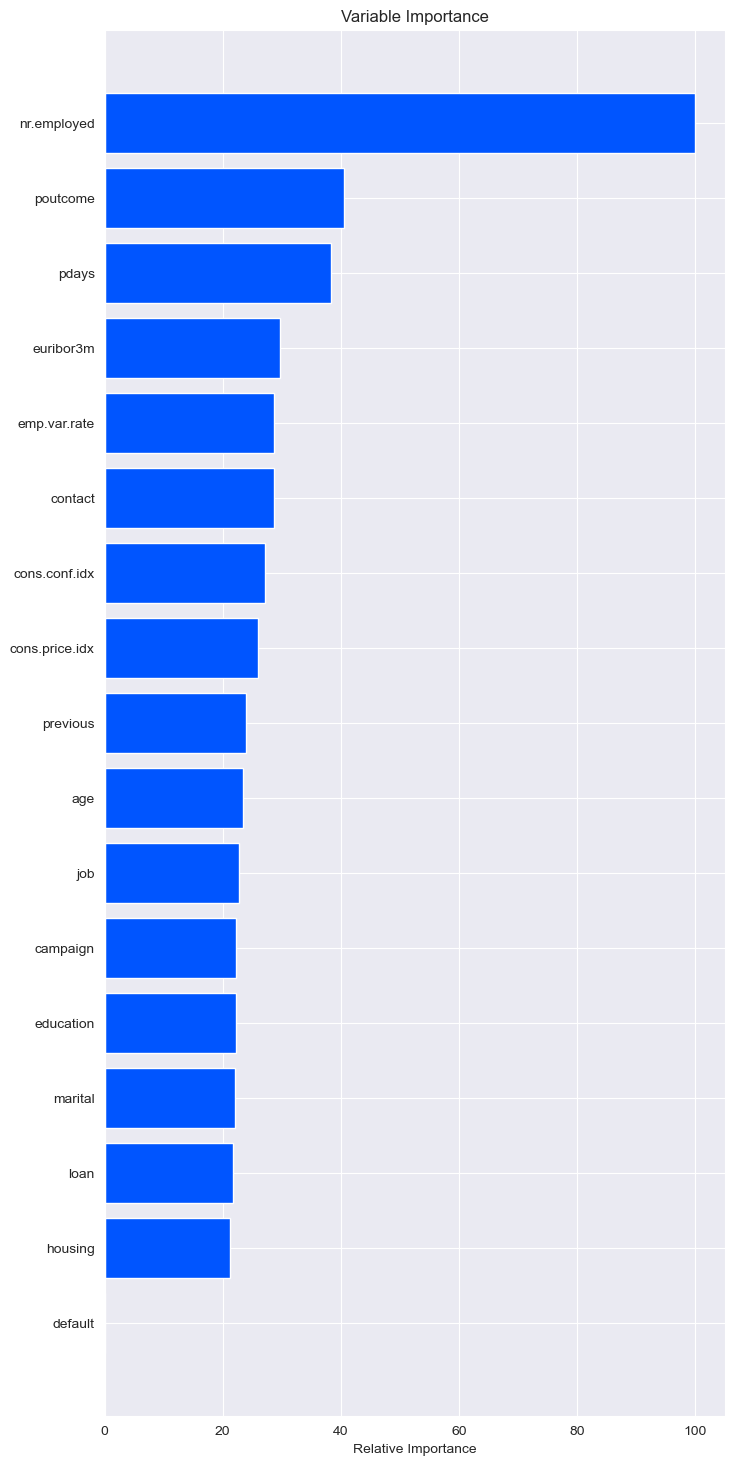

In [703]:
feature_importance = bestgrad.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
# plt.subplot(1, 2, 2)
plt.figure(figsize=(8, 18))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.keys()[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

### 5.1.4.6. ROC Curve with adjusted treshold

In [704]:
fpr,tpr,tresholds=roc_curve(y_test,y_pred)
j=tpr-fpr
# locate the index of the largest g-mean
ix = np.argmax(j)
best_tresh=tresholds[ix]

print('Best Threshold=%f' %(best_tresh))

Best Threshold=1.000000


In [705]:
from numpy import sqrt
# calculate the g-mean for each threshold
gmeans = sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

Best Threshold=0.859811, G-Mean=0.491


In [706]:
precision, recall, thresholds = precision_recall_curve(y_test,y_pred)
# convert to f score
fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = np.argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
# plot the roc curve for the model
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
plt.plot(recall, precision, marker='.', label='Logistic')
plt.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
# show the plot
plt.show()

Best Threshold=1.000000, F-Score=0.350


### NOTE= As a result of calculating best treshold and plotting ROC curve, The best  treshhoold is 1 and f-score is 0.35

# 6. PART2 CLASSIFICATION OF IMBALANCED DATA WITH OVER SAMPLING<a class="anchor" id="PART2-CLASSIFICATION-OF-IMBALANCED-DATA-WITH-OVER-SAMPLING"></a>

### 6.1. FEATURE SELECTION<a class="anchor" id="FEATURE-SELECTION"></a> 

### 6.1.1. DIMENSION REDUCTION<a class="anchor" id="DIMENSION-REDUCTION"></a>  

I will try 3 different way for feature selection and then pick one that has best result.

Principal component analysis (PCA) is a popular technique for analyzing large datasets containing a high number of dimensions/features per observation, increasing the interpretability of data while preserving the maximum amount of information, and enabling the visualization of multidimensional data.

(t-SNE) t-Distributed Stochastic Neighbor Embedding is a non-linear dimensionality reduction algorithm used for exploring high-dimensional data. It maps multi-dimensional data to two or more dimensions suitable for human observation. With help of the t-SNE algorithms, you may have to plot fewer exploratory data analysis plots next time you work with high dimensional data.

TruncatedSVD, performs linear dimensionality reduction by means of truncated singular value decomposition (SVD). Contrary to PCA, this estimator does not center the data before computing the singular value decomposition. This means it can work with sparse matrices efficiently.



In [711]:
df4=df_imputed.copy()

In [712]:
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA
X = df4.drop('y', axis = 1)
y = df4['y']
X_tsne = TSNE(n_components = 2, random_state = 34).fit_transform(X)
X_pca = PCA(n_components = 2, random_state = 34).fit_transform(X)
X_svd = TruncatedSVD(n_components = 2, random_state = 34).fit_transform(X)

In [713]:
X_pca.shape

(39387, 2)

In [714]:
X_tsne.shape

(39387, 2)

In [715]:
X_svd.shape

(39387, 2)

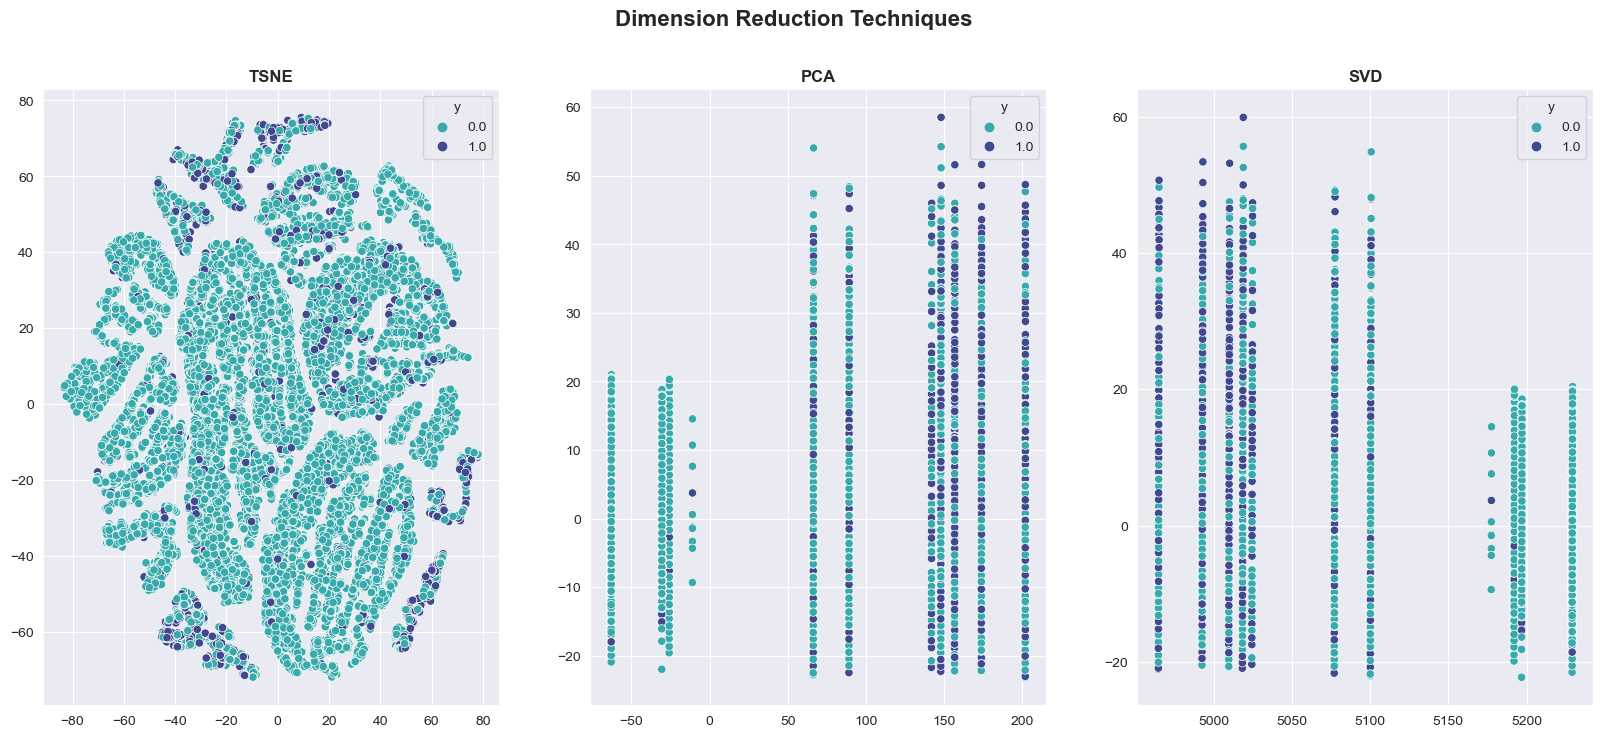

In [716]:
fig, ax = plt.subplots(1,3, figsize = (20,8))
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue = y, ax = ax[0], palette = 'mako_r')
ax[0].set_title('TSNE', weight =  'bold')
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue = y, ax = ax[1], palette = 'mako_r')
ax[1].set_title('PCA', weight =  'bold')
sns.scatterplot(x=X_svd[:,0],y= X_svd[:,1], hue = y, ax = ax[2], palette = 'mako_r')
ax[2].set_title('SVD', weight =  'bold')
fig.suptitle('Dimension Reduction Techniques', fontsize = 16, weight = 'bold') 
plt.show()

NOTE= As seen from above graph any type of dimension reduction do not give a meaningful classification 

In [717]:
X_tsne = TSNE(n_components = 3, random_state = 34).fit_transform(X)
X_pca = PCA(n_components = 3, random_state = 34).fit_transform(X)
X_svd = TruncatedSVD(n_components = 3, random_state = 34).fit_transform(X)

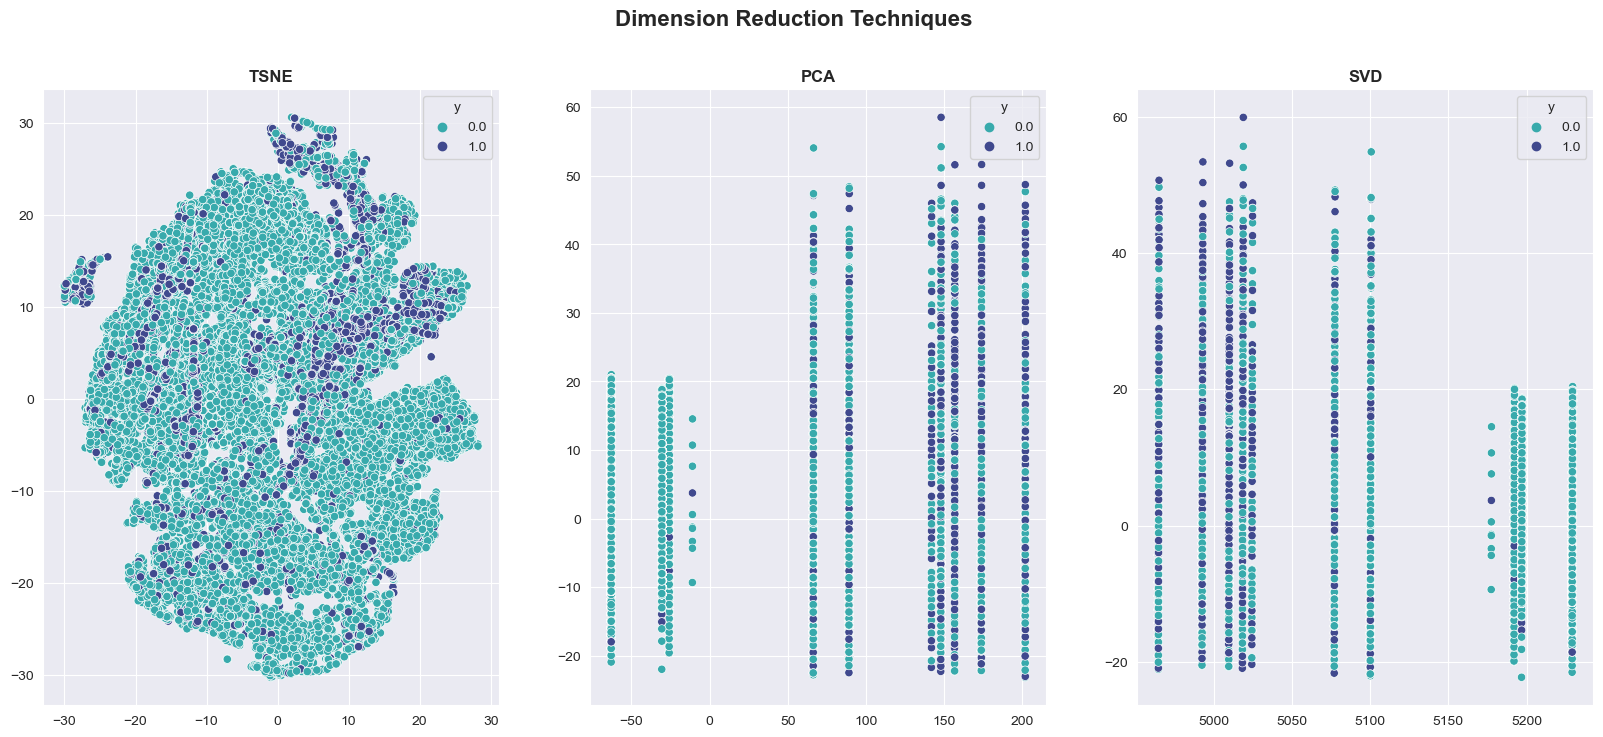

In [718]:
fig, ax = plt.subplots(1,3, figsize = (20,8))
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue = y, ax = ax[0], palette = 'mako_r')
ax[0].set_title('TSNE', weight =  'bold')
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue = y, ax = ax[1], palette = 'mako_r')
ax[1].set_title('PCA', weight =  'bold')
sns.scatterplot(x=X_svd[:,0],y= X_svd[:,1], hue = y, ax = ax[2], palette = 'mako_r')
ax[2].set_title('SVD', weight =  'bold')
fig.suptitle('Dimension Reduction Techniques', fontsize = 16, weight = 'bold') 
plt.show()

**NOTE= For dimension=3 There is no meaningfull classification**

In [719]:
#X_tsne = TSNE(n_components = 4, method='exact' ,random_state = 34).fit_transform(X)
X_pca = PCA(n_components = 4, random_state = 34).fit_transform(X)
X_svd = TruncatedSVD(n_components = 4, random_state = 34).fit_transform(X)

In [720]:
fig, ax = plt.subplots(1,2, figsize = (20,8))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue = y, ax = ax[0], palette = 'mako_r')
ax[0].set_title('PCA', weight =  'bold')
sns.scatterplot(x=X_svd[:,0],y= X_svd[:,1], hue = y, ax = ax[1], palette = 'mako_r')
ax[1].set_title('SVD', weight =  'bold')
fig.suptitle('Dimension Reduction Techniques', fontsize = 16, weight = 'bold') 
plt.show()

In [721]:

X_pca = PCA(n_components = 10, random_state = 34).fit_transform(X)
X_svd = TruncatedSVD(n_components = 10, random_state = 34).fit_transform(X)

fig, ax = plt.subplots(1,2, figsize = (20,8))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue = y, ax = ax[0], palette = 'mako_r')
ax[0].set_title('PCA', weight =  'bold')
sns.scatterplot(x=X_svd[:,0],y= X_svd[:,1], hue = y, ax = ax[1], palette = 'mako_r')
ax[1].set_title('SVD', weight =  'bold')
fig.suptitle('Dimension Reduction Techniques', fontsize = 16, weight = 'bold') 
plt.show()

## NOTE= All dimension reduction calculation above do not find meaningfull classification reduction of X so I decided not to use them

### 6.1.2 SELECT BEST FEATURE<a class="anchor" id="SELECT-BEST-FEATURE"></a> 

Feature selection is a technique where we choose those features in our data that contribute most to the target variable. In other words we choose the best predictors for the target variable.

The classes in the sklearn.feature_selection module can be used for feature selection/dimensionality reduction on sample sets, either to improve estimators’ accuracy scores or to boost their performance on very high-dimensional datasets.

Advantage: Refer this link for a nice article on this by Jason Brownlee

Reduces Overfitting: Less redundant data means less possibility of making decisions based on redundant data/noise.
Improves Accuracy: Less misleading data means modeling accuracy improves.
Reduces Training Time: Less data means that algorithms train faster.

In [722]:
from sklearn.feature_selection import SelectKBest, chi2, f_regression

#### 6.1.2.1. Split Categorical Features 

In [723]:
numerics=[]
for i in data_new:
    if data_new[i].dtype == 'category':
        numerics.append(i)
print(numerics) 

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome', 'y']


In [724]:
y=df4['y']

In [726]:
X_cat=df4.drop(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed','y'],axis=1)

In [727]:
selector=SelectKBest(score_func=chi2,k=5)
selector.fit_transform(X_cat,y)

array([[3., 1., 0., 1., 1.],
       [7., 1., 3., 1., 1.],
       [7., 1., 3., 1., 1.],
       ...,
       [5., 1., 6., 1., 0.],
       [9., 1., 5., 1., 0.],
       [5., 1., 5., 0., 0.]])

In [728]:
cols_idxs = selector.get_support(indices=True)
X_cat_new = X_cat.iloc[:,cols_idxs]

In [729]:
X_cat_new.head()

job  marital  education  poutcome  contact
0  3.0      1.0        0.0       1.0      1.0
1  7.0      1.0        3.0       1.0      1.0
2  7.0      1.0        3.0       1.0      1.0
3  0.0      1.0        1.0       1.0      1.0
4  7.0      1.0        3.0       1.0      1.0

#### 6.1.2.2. Split Categorical Features

In [730]:
df4.columns

Index(['age', 'job', 'marital', 'education', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'contact', 'default', 'housing', 'loan',
       'y'],
      dtype='object')

In [733]:
X_reg=df4.drop([ 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome', 'y'],axis=1)


In [734]:
selector_reg=SelectKBest(score_func=f_regression, k=5)
selector_reg.fit_transform(X_reg,y)

array([[ 0.0000e+00,  0.0000e+00,  1.1000e+00,  4.8570e+00,  5.1910e+03],
       [ 0.0000e+00,  0.0000e+00,  1.1000e+00,  4.8570e+00,  5.1910e+03],
       [ 0.0000e+00,  0.0000e+00,  1.1000e+00,  4.8570e+00,  5.1910e+03],
       ...,
       [ 0.0000e+00,  0.0000e+00, -1.1000e+00,  1.0280e+00,  4.9636e+03],
       [ 0.0000e+00,  0.0000e+00, -1.1000e+00,  1.0280e+00,  4.9636e+03],
       [ 0.0000e+00,  1.0000e+00, -1.1000e+00,  1.0280e+00,  4.9636e+03]])

In [735]:
cols_idxs = selector_reg.get_support(indices=True)
X_reg_new = X_reg.iloc[:,cols_idxs]

In [736]:
X_reg_new.head()

pdays  previous  emp.var.rate  euribor3m  nr.employed
0    0.0       0.0           1.1      4.857       5191.0
1    0.0       0.0           1.1      4.857       5191.0
2    0.0       0.0           1.1      4.857       5191.0
3    0.0       0.0           1.1      4.857       5191.0
4    0.0       0.0           1.1      4.857       5191.0

### 6.1.2.3.DataFrame with Selected Features

In [737]:
result = pd.concat([X_reg_new,X_cat_new], axis=1, join='inner')
result .head()

pdays  previous  emp.var.rate  euribor3m  nr.employed  job  marital  \
0    0.0       0.0           1.1      4.857       5191.0  3.0      1.0   
1    0.0       0.0           1.1      4.857       5191.0  7.0      1.0   
2    0.0       0.0           1.1      4.857       5191.0  7.0      1.0   
3    0.0       0.0           1.1      4.857       5191.0  0.0      1.0   
4    0.0       0.0           1.1      4.857       5191.0  7.0      1.0   

   education  poutcome  contact  
0        0.0       1.0      1.0  
1        3.0       1.0      1.0  
2        3.0       1.0      1.0  
3        1.0       1.0      1.0  
4        3.0       1.0      1.0

### Comparing SelectkBest dataframe and data that has all features

#### Model Evaluation of Data that has all features

In [738]:
y=df4['y']

In [739]:
X=df4.drop(['y'],axis=1)

In [740]:
X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size=0.05, random_state=0)

In [741]:
names = ['Logistic Regression', "KNN","Gradient Boosting", "Decision Tree", "RandomForest","XGB","CatBoost","LGBM", "BaggingClassifier","BalancedBaggingClassifier"]
classifiers = [LogisticRegression(solver='liblinear',random_state=42),
               KNeighborsClassifier(n_neighbors=3, weights= 'distance'),
               #SVC(kernel="linear", C=0.025, random_state=42),
               GradientBoostingClassifier(n_estimators=100, random_state=42),
               DecisionTreeClassifier(max_depth=5,  random_state=42),
               RandomForestClassifier(max_depth=5, n_estimators=100, random_state=42),
               xgb.XGBClassifier(n_estimators = 500,learning_rate = 0.05,use_label_encoder = False,n_jobs = -1),
               CatBoostClassifier(iterations=5, learning_rate=0.1),
               lgb.LGBMClassifier(n_estimators=1000, num_leaves=50),
               BaggingClassifier(random_state=0),
               BalancedBaggingClassifier(random_state=0)]

In [742]:
from sklearn.metrics import f1_score
scores = []
f1_sc=[]
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    score = clf.score(X_test,y_test)
    y_pred=clf.predict(X_test)
    f1= f1_score(y_test, y_pred, average='weighted')
    scores.append(score)
    f1_sc.append(f1)
    
scores_df = pd.DataFrame()

0:	learn: 0.6292536	total: 2.57ms	remaining: 10.3ms
1:	learn: 0.5772600	total: 5.39ms	remaining: 8.09ms
2:	learn: 0.5342407	total: 8.24ms	remaining: 5.49ms
3:	learn: 0.4983946	total: 10.8ms	remaining: 2.7ms
4:	learn: 0.4674291	total: 13.5ms	remaining: 0us


In [743]:
scores_df['name'] = names
scores_df['score'] = np.around(scores,3)
scores_df['f1']= np.around(f1_sc,3)
scores_df.sort_values('score', ascending= False)

name  score     f1
5                        XGB  0.889  0.870
3              Decision Tree  0.888  0.866
6                   CatBoost  0.888  0.859
4               RandomForest  0.887  0.859
2          Gradient Boosting  0.886  0.863
0        Logistic Regression  0.885  0.854
7                       LGBM  0.885  0.870
8          BaggingClassifier  0.876  0.861
1                        KNN  0.867  0.859
9  BalancedBaggingClassifier  0.816  0.835

#### Model Evaluation of SelectkBest Dataframe

In [744]:
y=df4['y']

In [745]:
X=result

In [746]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=0)

In [747]:
names = ['Logistic Regression', "KNN","Gradient Boosting", "Decision Tree", "RandomForest","XGB","CatBoost","LGBM", "BaggingClassifier","BalancedBaggingClassifier"]
classifiers = [LogisticRegression(solver='liblinear',random_state=42),
               KNeighborsClassifier(n_neighbors=3, weights= 'distance'),
               #SVC(kernel="linear", C=0.025, random_state=42),
               GradientBoostingClassifier(n_estimators=100, random_state=42),
               DecisionTreeClassifier(max_depth=5,  random_state=42),
               RandomForestClassifier(max_depth=5, n_estimators=100, random_state=42),
               xgb.XGBClassifier(n_estimators = 500,learning_rate = 0.05,use_label_encoder = False,n_jobs = -1),
               CatBoostClassifier(iterations=5, learning_rate=0.1),
               lgb.LGBMClassifier(n_estimators=1000, num_leaves=50),
               BaggingClassifier(random_state=0),
               BalancedBaggingClassifier(random_state=0)]

In [748]:
from sklearn.metrics import f1_score
scores = []
f1_sc=[]
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    score = clf.score(X_test,y_test)
    y_pred=clf.predict(X_test)
    f1= f1_score(y_test, y_pred, average='weighted')
    scores.append(score)
    f1_sc.append(f1)
    
scores_df = pd.DataFrame()

0:	learn: 0.6291201	total: 2.54ms	remaining: 10.2ms
1:	learn: 0.5770832	total: 4.88ms	remaining: 7.32ms
2:	learn: 0.5338818	total: 7.33ms	remaining: 4.88ms
3:	learn: 0.4980739	total: 9.62ms	remaining: 2.4ms
4:	learn: 0.4679012	total: 12.2ms	remaining: 0us


In [749]:
scores_df['name'] = names
scores_df['score'] = np.around(scores,3)
scores_df['f1']= np.around(f1_sc,3)
scores_df.sort_values('score', ascending= False)

name  score     f1
3              Decision Tree  0.891  0.868
5                        XGB  0.889  0.869
2          Gradient Boosting  0.888  0.867
4               RandomForest  0.888  0.859
6                   CatBoost  0.888  0.858
8          BaggingClassifier  0.887  0.871
7                       LGBM  0.886  0.869
0        Logistic Regression  0.881  0.846
1                        KNN  0.876  0.864
9  BalancedBaggingClassifier  0.768  0.800

### NOTE= As seen above Select best 10 features is not impact on models scores so I will not use it 

## 6.2. DEALING WITH IMBALANCED DATA<a class="anchor" id="DEALING-WITH-IMBALANCED-DATA"></a>

Having imbalanced data can affect the performance of the model severly. A model with high accuracy for a very unbalanced data only gives a dillusion for having a good model. While high accuracy translates into the ability of model in prediction of one class (majarity class), it does not show the ability of model in prediction of the the other class(minority class). Therefore, it's quite easy to reach high accuracy with very unbalanced data. While the recall score may be very low, leading to a poor performance with the model.

2. Resampling

Resampling consist of

Under sampling of the majority class: This technique involves removing random records from the majority class, which can cause loss of information. This could lead to underfitting and poor generalization to the test set.
Oversampling of the minority class: Adding more examples from the minority class. The simplest implementation of over-sampling is to duplicate random records from the minority class, which can cause overfitting.

3. SMOTE (Synthetic Minority Over-sampling Technique):

An oversampling technique that generates synthetic samples from the minority class. SMOTE works by utilizing a k-nearest neighbor algorithm to create synthetic data. SMOTE first start by choosing random data from the minority class, then k-nearest neighbors from the data are set. Depending upon the amount of over-sampling required, neighbors from the k nearest neighbors are randomly chosen. The synthetic points are added between the chosen point and its neighbors. It can be used when we can both classes can be seperated easily.

The Wrong Way

The most common mistake is to oversample the data and then apply the split between training set and validation set. This is not the right way of doing it, since the over sampling happens before the split and thus it will affect the distribution of data in the validation set. while validation set shall stay untouched! This is depicted in the figure below.
This way of oversampling leads to awesome results for precision and recall for validation set. However, the results are not realistic and overfitting occurs.

<p style="text-align:center;"><img src="https://www.marcoaltini.com/uploads/1/3/2/3/13234002/2639934.jpg?401" alt="Logo"></p>


The Right Way:

The right way of doing it is to apply oversampling just after the split of data into training set and validation set. In other words oversampling happens only for the triaing set, after the split of data into training and validation set. This is implemented in the following code blocks.

<p style="text-align:center;"><img src="https://www.marcoaltini.com/uploads/1/3/2/3/13234002/9101820.jpg?372" alt="Logo"></p>


### 6.2.1. Over Sampling 

In [2]:
df_imputed.to_csv("/Users/goncaavcicakmak/Desktop/ads-542-finalproject/data/df_final.csv")

NameError: name 'df_imputed' is not defined

In [4]:
df_final_copy=pd.read_csv("/Users/goncaavcicakmak/Desktop/ads-542-finalproject/data/df_final.csv", index_col=[0])

In [5]:
df_final_copy.head()

age  job  marital  education  campaign  pdays  previous  poutcome  \
0  56.0  3.0      1.0        0.0       1.0    0.0       0.0       1.0   
1  57.0  7.0      1.0        3.0       1.0    0.0       0.0       1.0   
2  37.0  7.0      1.0        3.0       1.0    0.0       0.0       1.0   
3  40.0  0.0      1.0        1.0       1.0    0.0       0.0       1.0   
4  56.0  7.0      1.0        3.0       1.0    0.0       0.0       1.0   

   emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed  \
0           1.1          93.994          -36.4      4.857       5191.0   
1           1.1          93.994          -36.4      4.857       5191.0   
2           1.1          93.994          -36.4      4.857       5191.0   
3           1.1          93.994          -36.4      4.857       5191.0   
4           1.1          93.994          -36.4      4.857       5191.0   

   contact  default  housing  loan    y  
0      1.0      0.0      0.0   0.0  0.0  
1      1.0      0.0      0.0   0.0  0.0  
2      1.0      0.0      1.0   0.0  0.0  
3      1.0      0.0      0.0   0.0  0.0  
4      1.0      0.0      0.0   1.0  0.0

In [6]:
y=df_final_copy['y']

In [7]:
X=df_final_copy.drop('y',axis=1)

In [8]:
over_sampled=SMOTE()
X_oversampled, y_oversampled = over_sampled.fit_resample(X, y)

In [9]:
X_oversampled.shape,y_oversampled.shape

((69644, 17), (69644,))

### 6.2.2. Create Oversampled dataframe and save local for Streamlit

In [21]:
X_oversampled.to_csv("/Users/goncaavcicakmak/Desktop/ads-542-finalproject/data/X_oversampled.csv")

In [22]:
y_oversampled.to_csv("/Users/goncaavcicakmak/Desktop/ads-542-finalproject/data/y_oversampled.csv")

### 6.2.3. Split data into train and test

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_oversampled, y_oversampled, test_size=0.05, random_state=0)

#### 6.2.4. Comparing and Choosing Best fitted Classification Models

In [24]:
names = ['Logistic Regression', "KNN","Gradient Boosting", "Decision Tree", "RandomForest","XGB","CatBoost","LGBM", "BaggingClassifier","BalancedBaggingClassifier"]
classifiers = [LogisticRegression(solver='liblinear',random_state=42),
               KNeighborsClassifier(n_neighbors=3, weights= 'distance'),
               #SVC(kernel="linear", C=0.025, random_state=42),
               GradientBoostingClassifier(n_estimators=100, random_state=42),
               DecisionTreeClassifier(max_depth=5,  random_state=42),
               RandomForestClassifier(max_depth=5, n_estimators=100, random_state=42),
               xgb.XGBClassifier(n_estimators = 500,learning_rate = 0.05,use_label_encoder = False,n_jobs = -1),
               CatBoostClassifier(iterations=5, learning_rate=0.1),
               lgb.LGBMClassifier(n_estimators=1000, num_leaves=50),
               BaggingClassifier(random_state=0),
               BalancedBaggingClassifier(random_state=0)]

In [762]:
from sklearn.metrics import f1_score,accuracy_score
scores = []
f1_sc=[]
acc_sc=[]
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    score = clf.score(X_test,y_test)
    y_pred=clf.predict(X_test)
    f1= f1_score(y_test, y_pred, average='weighted')
    acc=accuracy_score(y_test,y_pred)
    scores.append(score)
    f1_sc.append(f1)
    acc_sc.append(acc)
    
scores_df = pd.DataFrame()


0:	learn: 0.6574345	total: 5.35ms	remaining: 21.4ms
1:	learn: 0.6293435	total: 9.53ms	remaining: 14.3ms
2:	learn: 0.5968974	total: 13.9ms	remaining: 9.28ms
3:	learn: 0.5714264	total: 18ms	remaining: 4.5ms
4:	learn: 0.5541739	total: 22.1ms	remaining: 0us


In [763]:
scores_df['name'] = names
scores_df['score'] = np.around(scores,3)
scores_df['f1']= np.around(f1_sc,3)
scores_df['acc']= np.around(acc_sc,3)
scores_df.sort_values('score', ascending= False)

name  score     f1    acc
5                        XGB  0.936  0.936  0.936
7                       LGBM  0.935  0.935  0.935
9  BalancedBaggingClassifier  0.928  0.928  0.928
8          BaggingClassifier  0.926  0.926  0.926
2          Gradient Boosting  0.912  0.912  0.912
1                        KNN  0.893  0.893  0.893
6                   CatBoost  0.800  0.799  0.800
4               RandomForest  0.799  0.798  0.799
3              Decision Tree  0.797  0.795  0.797
0        Logistic Regression  0.732  0.731  0.732

## As a result of above evaluation code, BaggingClassifier, XGBOOST,LGBMClassifier gave best F1 score on oversampled data. Therefore I will tune and visaulize their results in next sections

## 6.3. CHOOSING 3 BEST MODELS AND BUILDING WITH BEST PARAMS<a class="anchor" id="CHOOSING-3-BEST-MODELS-AND-BUILDING-WITH-BEST-PARAMS"></a> 

### 6.3.1. MODEL-1 LGBMCLASSIFIER<a class="anchor" id="LGBMCLASSIFIER"></a>

In [764]:
over_sampled=SMOTE()
X_oversampled, y_oversampled = over_sampled.fit_resample(X, y)

In [765]:
X_oversampled.shape,y_oversampled.shape

((69644, 17), (69644,))

In [766]:
X_train, X_test, y_train, y_test = train_test_split(X_oversampled, y_oversampled, test_size=0.05, random_state=0)

In [767]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((66161, 17), (3483, 17), (66161,), (3483,))

In [768]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

def objective(trial):
    params = {    
    'n_estimators': trial.suggest_int("n_estimators", 500,1000, step=100),
    'learning_rate':trial.suggest_float("learning_rate", 0.01, 0.5),
    'num_leaves': trial.suggest_int("num_leaves", 6, 300, step=20),
    'max_depth':trial.suggest_int("max_depth", 3, 20),
    'min_data_in_leaf':trial.suggest_int("min_data_in_leaf", 100, 1000, step=100),
    'min_gain_to_split': trial.suggest_float("min_gain_to_split", 0, 15),
    'bagging_fraction':trial.suggest_float("bagging_fraction", 0.5, 0.95),
    'max_bin': trial.suggest_int("max_bin", 200, 300),
    'lambda_l1': trial.suggest_int("lambda_l1", 0, 100, step=5),
    'lambda_l2': trial.suggest_int("lambda_l2", 0, 100, step=5),
    'bagging_freq':trial.suggest_categorical("bagging_freq", [1]),
    'feature_fraction': trial.suggest_float("feature_fraction", 0.2, 0.95)

    }

    # Fit the model
    lgbm =LGBMClassifier(**params)
    lgbm.fit(X_train, y_train)

    # Make predictions
    y_pred = lgbm.predict(X_test)

    # Evaluate predictions
    f1_scores=f1_score(y_test, y_pred, average='weighted')
    return f1_scores

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30)

[I 2023-06-10 15:11:15,291] A new study created in memory with name: no-name-9ecd8f08-5d38-40de-8ad2-dccf2959f906


[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=600, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=600
[LightGBM] [Warning] lambda_l2 is set=55, reg_lambda=0.0 will be ignored. Current value: lambda_l2=55
[LightGBM] [Warning] feature_fraction is set=0.40284278365190523, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.40284278365190523
[LightGBM] [Warning] bagging_fraction is set=0.7621270161883484, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7621270161883484
[LightGBM] [Warning] min_gain_to_split is set=9.89379611052212, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=9.89379611052212
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5


[I 2023-06-10 15:11:16,866] Trial 0 finished with value: 0.9198208924072567 and parameters: {'n_estimators': 1000, 'learning_rate': 0.18740106482528493, 'num_leaves': 146, 'max_depth': 13, 'min_data_in_leaf': 600, 'min_gain_to_split': 9.89379611052212, 'bagging_fraction': 0.7621270161883484, 'max_bin': 284, 'lambda_l1': 5, 'lambda_l2': 55, 'bagging_freq': 1, 'feature_fraction': 0.40284278365190523}. Best is trial 0 with value: 0.9198208924072567.


[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] lambda_l2 is set=55, reg_lambda=0.0 will be ignored. Current value: lambda_l2=55
[LightGBM] [Warning] feature_fraction is set=0.4270716172039912, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4270716172039912
[LightGBM] [Warning] bagging_fraction is set=0.85423251941189, subsample=1.0 will be ignored. Current value: bagging_fraction=0.85423251941189
[LightGBM] [Warning] min_gain_to_split is set=6.784890175724745, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=6.784890175724745
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0


[I 2023-06-10 15:11:17,952] Trial 1 finished with value: 0.9218189799941245 and parameters: {'n_estimators': 700, 'learning_rate': 0.19510732993670102, 'num_leaves': 126, 'max_depth': 6, 'min_data_in_leaf': 300, 'min_gain_to_split': 6.784890175724745, 'bagging_fraction': 0.85423251941189, 'max_bin': 253, 'lambda_l1': 0, 'lambda_l2': 55, 'bagging_freq': 1, 'feature_fraction': 0.4270716172039912}. Best is trial 1 with value: 0.9218189799941245.


[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=900, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=900
[LightGBM] [Warning] lambda_l2 is set=85, reg_lambda=0.0 will be ignored. Current value: lambda_l2=85
[LightGBM] [Warning] feature_fraction is set=0.34335339287449873, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.34335339287449873
[LightGBM] [Warning] bagging_fraction is set=0.9381545636048213, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9381545636048213
[LightGBM] [Warning] min_gain_to_split is set=7.68515927850944, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=7.68515927850944
[LightGBM] [Warning] lambda_l1 is set=90, reg_alpha=0.0 will be ignored. Current value: lambda_l1=90


[I 2023-06-10 15:11:19,144] Trial 2 finished with value: 0.9129068908978206 and parameters: {'n_estimators': 800, 'learning_rate': 0.24266373605589284, 'num_leaves': 26, 'max_depth': 17, 'min_data_in_leaf': 900, 'min_gain_to_split': 7.68515927850944, 'bagging_fraction': 0.9381545636048213, 'max_bin': 298, 'lambda_l1': 90, 'lambda_l2': 85, 'bagging_freq': 1, 'feature_fraction': 0.34335339287449873}. Best is trial 1 with value: 0.9218189799941245.


[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=600, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=600
[LightGBM] [Warning] lambda_l2 is set=95, reg_lambda=0.0 will be ignored. Current value: lambda_l2=95
[LightGBM] [Warning] feature_fraction is set=0.5510367460084952, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5510367460084952
[LightGBM] [Warning] bagging_fraction is set=0.7845515944707573, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7845515944707573
[LightGBM] [Warning] min_gain_to_split is set=3.0524317535523187, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=3.0524317535523187
[LightGBM] [Warning] lambda_l1 is set=100, reg_alpha=0.0 will be ignored. Current value: lambda_l1=100


[I 2023-06-10 15:11:19,887] Trial 3 finished with value: 0.9137874980422009 and parameters: {'n_estimators': 500, 'learning_rate': 0.19936287420845683, 'num_leaves': 266, 'max_depth': 13, 'min_data_in_leaf': 600, 'min_gain_to_split': 3.0524317535523187, 'bagging_fraction': 0.7845515944707573, 'max_bin': 298, 'lambda_l1': 100, 'lambda_l2': 95, 'bagging_freq': 1, 'feature_fraction': 0.5510367460084952}. Best is trial 1 with value: 0.9218189799941245.


[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=1000, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1000
[LightGBM] [Warning] lambda_l2 is set=90, reg_lambda=0.0 will be ignored. Current value: lambda_l2=90
[LightGBM] [Warning] feature_fraction is set=0.7081632655428689, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7081632655428689
[LightGBM] [Warning] bagging_fraction is set=0.7772759606859052, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7772759606859052
[LightGBM] [Warning] min_gain_to_split is set=8.310314392477942, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=8.310314392477942
[LightGBM] [Warning] lambda_l1 is set=40, reg_alpha=0.0 will be ignored. Current value: lambda_l1=40


[I 2023-06-10 15:11:20,583] Trial 4 finished with value: 0.918954180940974 and parameters: {'n_estimators': 700, 'learning_rate': 0.2857725901997701, 'num_leaves': 26, 'max_depth': 19, 'min_data_in_leaf': 1000, 'min_gain_to_split': 8.310314392477942, 'bagging_fraction': 0.7772759606859052, 'max_bin': 239, 'lambda_l1': 40, 'lambda_l2': 90, 'bagging_freq': 1, 'feature_fraction': 0.7081632655428689}. Best is trial 1 with value: 0.9218189799941245.


[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=900, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=900
[LightGBM] [Warning] lambda_l2 is set=65, reg_lambda=0.0 will be ignored. Current value: lambda_l2=65
[LightGBM] [Warning] feature_fraction is set=0.4734550081850587, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4734550081850587
[LightGBM] [Warning] bagging_fraction is set=0.8858397446734979, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8858397446734979
[LightGBM] [Warning] min_gain_to_split is set=7.801683423153619, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=7.801683423153619
[LightGBM] [Warning] lambda_l1 is set=80, reg_alpha=0.0 will be ignored. Current value: lambda_l1=80


[I 2023-06-10 15:11:21,832] Trial 5 finished with value: 0.9146631746631695 and parameters: {'n_estimators': 800, 'learning_rate': 0.449228961986177, 'num_leaves': 226, 'max_depth': 12, 'min_data_in_leaf': 900, 'min_gain_to_split': 7.801683423153619, 'bagging_fraction': 0.8858397446734979, 'max_bin': 256, 'lambda_l1': 80, 'lambda_l2': 65, 'bagging_freq': 1, 'feature_fraction': 0.4734550081850587}. Best is trial 1 with value: 0.9218189799941245.


[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=600, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=600
[LightGBM] [Warning] lambda_l2 is set=45, reg_lambda=0.0 will be ignored. Current value: lambda_l2=45
[LightGBM] [Warning] feature_fraction is set=0.3611089362685201, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3611089362685201
[LightGBM] [Warning] bagging_fraction is set=0.8650391214888469, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8650391214888469
[LightGBM] [Warning] min_gain_to_split is set=6.645472578271523, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=6.645472578271523
[LightGBM] [Warning] lambda_l1 is set=75, reg_alpha=0.0 will be ignored. Current value: lambda_l1=75


[I 2023-06-10 15:11:22,852] Trial 6 finished with value: 0.9158037047546078 and parameters: {'n_estimators': 500, 'learning_rate': 0.03546410069461303, 'num_leaves': 26, 'max_depth': 15, 'min_data_in_leaf': 600, 'min_gain_to_split': 6.645472578271523, 'bagging_fraction': 0.8650391214888469, 'max_bin': 268, 'lambda_l1': 75, 'lambda_l2': 45, 'bagging_freq': 1, 'feature_fraction': 0.3611089362685201}. Best is trial 1 with value: 0.9218189799941245.


[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] lambda_l2 is set=80, reg_lambda=0.0 will be ignored. Current value: lambda_l2=80
[LightGBM] [Warning] feature_fraction is set=0.5107499187578957, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5107499187578957
[LightGBM] [Warning] bagging_fraction is set=0.6993506972893371, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6993506972893371
[LightGBM] [Warning] min_gain_to_split is set=13.262132086589123, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=13.262132086589123
[LightGBM] [Warning] lambda_l1 is set=55, reg_alpha=0.0 will be ignored. Current value: lambda_l1=55


[I 2023-06-10 15:11:24,029] Trial 7 finished with value: 0.9152319912128587 and parameters: {'n_estimators': 800, 'learning_rate': 0.27150868881466406, 'num_leaves': 106, 'max_depth': 14, 'min_data_in_leaf': 300, 'min_gain_to_split': 13.262132086589123, 'bagging_fraction': 0.6993506972893371, 'max_bin': 231, 'lambda_l1': 55, 'lambda_l2': 80, 'bagging_freq': 1, 'feature_fraction': 0.5107499187578957}. Best is trial 1 with value: 0.9218189799941245.


[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l2 is set=30, reg_lambda=0.0 will be ignored. Current value: lambda_l2=30
[LightGBM] [Warning] feature_fraction is set=0.2852908242814336, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2852908242814336
[LightGBM] [Warning] bagging_fraction is set=0.903784033164829, subsample=1.0 will be ignored. Current value: bagging_fraction=0.903784033164829
[LightGBM] [Warning] min_gain_to_split is set=1.872260311388565, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.872260311388565
[LightGBM] [Warning] lambda_l1 is set=70, reg_alpha=0.0 will be ignored. Current value: lambda_l1=70


[I 2023-06-10 15:11:24,908] Trial 8 finished with value: 0.9209486067928045 and parameters: {'n_estimators': 500, 'learning_rate': 0.15150899894717584, 'num_leaves': 6, 'max_depth': 8, 'min_data_in_leaf': 100, 'min_gain_to_split': 1.872260311388565, 'bagging_fraction': 0.903784033164829, 'max_bin': 238, 'lambda_l1': 70, 'lambda_l2': 30, 'bagging_freq': 1, 'feature_fraction': 0.2852908242814336}. Best is trial 1 with value: 0.9218189799941245.


[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l2 is set=5, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5
[LightGBM] [Warning] feature_fraction is set=0.949017178847404, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.949017178847404
[LightGBM] [Warning] bagging_fraction is set=0.6218699108234067, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6218699108234067
[LightGBM] [Warning] min_gain_to_split is set=8.180820672875356, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=8.180820672875356
[LightGBM] [Warning] lambda_l1 is set=20, reg_alpha=0.0 will be ignored. Current value: lambda_l1=20


[I 2023-06-10 15:11:25,511] Trial 9 finished with value: 0.9209789748594445 and parameters: {'n_estimators': 500, 'learning_rate': 0.10302517984784122, 'num_leaves': 286, 'max_depth': 8, 'min_data_in_leaf': 100, 'min_gain_to_split': 8.180820672875356, 'bagging_fraction': 0.6218699108234067, 'max_bin': 265, 'lambda_l1': 20, 'lambda_l2': 5, 'bagging_freq': 1, 'feature_fraction': 0.949017178847404}. Best is trial 1 with value: 0.9218189799941245.


[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] lambda_l2 is set=20, reg_lambda=0.0 will be ignored. Current value: lambda_l2=20
[LightGBM] [Warning] feature_fraction is set=0.22077615519841326, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.22077615519841326
[LightGBM] [Warning] bagging_fraction is set=0.5132252110140291, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5132252110140291
[LightGBM] [Warning] min_gain_to_split is set=0.4336322822862124, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.4336322822862124
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0


[I 2023-06-10 15:11:28,045] Trial 10 finished with value: 0.9235276086933606 and parameters: {'n_estimators': 1000, 'learning_rate': 0.020208917021593387, 'num_leaves': 106, 'max_depth': 4, 'min_data_in_leaf': 400, 'min_gain_to_split': 0.4336322822862124, 'bagging_fraction': 0.5132252110140291, 'max_bin': 201, 'lambda_l1': 0, 'lambda_l2': 20, 'bagging_freq': 1, 'feature_fraction': 0.22077615519841326}. Best is trial 10 with value: 0.9235276086933606.


[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] lambda_l2 is set=15, reg_lambda=0.0 will be ignored. Current value: lambda_l2=15
[LightGBM] [Warning] feature_fraction is set=0.20520782535240198, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.20520782535240198
[LightGBM] [Warning] bagging_fraction is set=0.5053912862385141, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5053912862385141
[LightGBM] [Warning] min_gain_to_split is set=0.14044953453627684, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.14044953453627684
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5


[I 2023-06-10 15:11:30,008] Trial 11 finished with value: 0.9074116047899903 and parameters: {'n_estimators': 1000, 'learning_rate': 0.011207922995911668, 'num_leaves': 106, 'max_depth': 3, 'min_data_in_leaf': 300, 'min_gain_to_split': 0.14044953453627684, 'bagging_fraction': 0.5053912862385141, 'max_bin': 201, 'lambda_l1': 5, 'lambda_l2': 15, 'bagging_freq': 1, 'feature_fraction': 0.20520782535240198}. Best is trial 10 with value: 0.9235276086933606.


[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] lambda_l2 is set=35, reg_lambda=0.0 will be ignored. Current value: lambda_l2=35
[LightGBM] [Warning] feature_fraction is set=0.20464911734412777, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.20464911734412777
[LightGBM] [Warning] bagging_fraction is set=0.5604312015984356, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5604312015984356
[LightGBM] [Warning] min_gain_to_split is set=4.385832413351212, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=4.385832413351212
[LightGBM] [Warning] lambda_l1 is set=25, reg_alpha=0.0 will be ignored. Current value: lambda_l1=25


[I 2023-06-10 15:11:31,077] Trial 12 finished with value: 0.9195062110907949 and parameters: {'n_estimators': 700, 'learning_rate': 0.09141350319876443, 'num_leaves': 186, 'max_depth': 3, 'min_data_in_leaf': 400, 'min_gain_to_split': 4.385832413351212, 'bagging_fraction': 0.5604312015984356, 'max_bin': 200, 'lambda_l1': 25, 'lambda_l2': 35, 'bagging_freq': 1, 'feature_fraction': 0.20464911734412777}. Best is trial 10 with value: 0.9235276086933606.


[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] lambda_l2 is set=20, reg_lambda=0.0 will be ignored. Current value: lambda_l2=20
[LightGBM] [Warning] feature_fraction is set=0.41729198279294316, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.41729198279294316
[LightGBM] [Warning] bagging_fraction is set=0.6620491700017657, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6620491700017657
[LightGBM] [Warning] min_gain_to_split is set=0.2540464196474055, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.2540464196474055
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0


[I 2023-06-10 15:11:33,780] Trial 13 finished with value: 0.935939671533887 and parameters: {'n_estimators': 900, 'learning_rate': 0.0913390205908278, 'num_leaves': 86, 'max_depth': 7, 'min_data_in_leaf': 400, 'min_gain_to_split': 0.2540464196474055, 'bagging_fraction': 0.6620491700017657, 'max_bin': 218, 'lambda_l1': 0, 'lambda_l2': 20, 'bagging_freq': 1, 'feature_fraction': 0.41729198279294316}. Best is trial 13 with value: 0.935939671533887.


[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=500, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=500
[LightGBM] [Warning] lambda_l2 is set=20, reg_lambda=0.0 will be ignored. Current value: lambda_l2=20
[LightGBM] [Warning] feature_fraction is set=0.27999883739667886, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.27999883739667886
[LightGBM] [Warning] bagging_fraction is set=0.6447492264426153, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6447492264426153
[LightGBM] [Warning] min_gain_to_split is set=0.010192770416376312, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.010192770416376312
[LightGBM] [Warning] lambda_l1 is set=25, reg_alpha=0.0 will be ignored. Current value: lambda_l1=25


[I 2023-06-10 15:11:35,802] Trial 14 finished with value: 0.924391712893447 and parameters: {'n_estimators': 900, 'learning_rate': 0.0645240317186464, 'num_leaves': 66, 'max_depth': 6, 'min_data_in_leaf': 500, 'min_gain_to_split': 0.010192770416376312, 'bagging_fraction': 0.6447492264426153, 'max_bin': 218, 'lambda_l1': 25, 'lambda_l2': 20, 'bagging_freq': 1, 'feature_fraction': 0.27999883739667886}. Best is trial 13 with value: 0.935939671533887.


[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=700, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=700
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=0.34908638774196, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.34908638774196
[LightGBM] [Warning] bagging_fraction is set=0.6633818619141457, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6633818619141457
[LightGBM] [Warning] min_gain_to_split is set=2.0783008514751473, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.0783008514751473
[LightGBM] [Warning] lambda_l1 is set=25, reg_alpha=0.0 will be ignored. Current value: lambda_l1=25


[I 2023-06-10 15:11:37,520] Trial 15 finished with value: 0.9238263561988389 and parameters: {'n_estimators': 900, 'learning_rate': 0.11004710428993458, 'num_leaves': 66, 'max_depth': 9, 'min_data_in_leaf': 700, 'min_gain_to_split': 2.0783008514751473, 'bagging_fraction': 0.6633818619141457, 'max_bin': 223, 'lambda_l1': 25, 'lambda_l2': 0, 'bagging_freq': 1, 'feature_fraction': 0.34908638774196}. Best is trial 13 with value: 0.935939671533887.


[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=500, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=500
[LightGBM] [Warning] lambda_l2 is set=20, reg_lambda=0.0 will be ignored. Current value: lambda_l2=20
[LightGBM] [Warning] feature_fraction is set=0.6254453300594803, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6254453300594803
[LightGBM] [Warning] bagging_fraction is set=0.6142001727596013, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6142001727596013
[LightGBM] [Warning] min_gain_to_split is set=4.506126247021092, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=4.506126247021092
[LightGBM] [Warning] lambda_l1 is set=40, reg_alpha=0.0 will be ignored. Current value: lambda_l1=40


[I 2023-06-10 15:11:38,757] Trial 16 finished with value: 0.9169501432226642 and parameters: {'n_estimators': 900, 'learning_rate': 0.06808606931127441, 'num_leaves': 66, 'max_depth': 10, 'min_data_in_leaf': 500, 'min_gain_to_split': 4.506126247021092, 'bagging_fraction': 0.6142001727596013, 'max_bin': 216, 'lambda_l1': 40, 'lambda_l2': 20, 'bagging_freq': 1, 'feature_fraction': 0.6254453300594803}. Best is trial 13 with value: 0.935939671533887.


[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=800, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=800
[LightGBM] [Warning] lambda_l2 is set=35, reg_lambda=0.0 will be ignored. Current value: lambda_l2=35
[LightGBM] [Warning] feature_fraction is set=0.45253533917204003, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.45253533917204003
[LightGBM] [Warning] bagging_fraction is set=0.691483195247919, subsample=1.0 will be ignored. Current value: bagging_fraction=0.691483195247919
[LightGBM] [Warning] min_gain_to_split is set=0.02852509145187687, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.02852509145187687
[LightGBM] [Warning] lambda_l1 is set=15, reg_alpha=0.0 will be ignored. Current value: lambda_l1=15


[I 2023-06-10 15:11:41,309] Trial 17 finished with value: 0.931900613090117 and parameters: {'n_estimators': 900, 'learning_rate': 0.13577529825188925, 'num_leaves': 66, 'max_depth': 6, 'min_data_in_leaf': 800, 'min_gain_to_split': 0.02852509145187687, 'bagging_fraction': 0.691483195247919, 'max_bin': 217, 'lambda_l1': 15, 'lambda_l2': 35, 'bagging_freq': 1, 'feature_fraction': 0.45253533917204003}. Best is trial 13 with value: 0.935939671533887.


[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=700, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=700
[LightGBM] [Warning] lambda_l2 is set=40, reg_lambda=0.0 will be ignored. Current value: lambda_l2=40
[LightGBM] [Warning] feature_fraction is set=0.46548638477431087, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.46548638477431087
[LightGBM] [Warning] bagging_fraction is set=0.6968040786210417, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6968040786210417
[LightGBM] [Warning] min_gain_to_split is set=1.876176964075687, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.876176964075687
[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10


[I 2023-06-10 15:11:43,031] Trial 18 finished with value: 0.9241025890791247 and parameters: {'n_estimators': 900, 'learning_rate': 0.13867607295335832, 'num_leaves': 166, 'max_depth': 6, 'min_data_in_leaf': 700, 'min_gain_to_split': 1.876176964075687, 'bagging_fraction': 0.6968040786210417, 'max_bin': 212, 'lambda_l1': 10, 'lambda_l2': 40, 'bagging_freq': 1, 'feature_fraction': 0.46548638477431087}. Best is trial 13 with value: 0.935939671533887.


[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=800, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=800
[LightGBM] [Warning] lambda_l2 is set=70, reg_lambda=0.0 will be ignored. Current value: lambda_l2=70
[LightGBM] [Warning] feature_fraction is set=0.5831768886547031, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5831768886547031
[LightGBM] [Warning] bagging_fraction is set=0.7332237820336036, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7332237820336036
[LightGBM] [Warning] min_gain_to_split is set=3.902255538412987, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=3.902255538412987
[LightGBM] [Warning] lambda_l1 is set=15, reg_alpha=0.0 will be ignored. Current value: lambda_l1=15


[I 2023-06-10 15:11:44,002] Trial 19 finished with value: 0.9241153557575537 and parameters: {'n_estimators': 600, 'learning_rate': 0.15042064628875682, 'num_leaves': 66, 'max_depth': 10, 'min_data_in_leaf': 800, 'min_gain_to_split': 3.902255538412987, 'bagging_fraction': 0.7332237820336036, 'max_bin': 229, 'lambda_l1': 15, 'lambda_l2': 70, 'bagging_freq': 1, 'feature_fraction': 0.5831768886547031}. Best is trial 13 with value: 0.935939671533887.


[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=800, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=800
[LightGBM] [Warning] lambda_l2 is set=10, reg_lambda=0.0 will be ignored. Current value: lambda_l2=10
[LightGBM] [Warning] feature_fraction is set=0.42037202795237494, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.42037202795237494
[LightGBM] [Warning] bagging_fraction is set=0.6052152495302336, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6052152495302336
[LightGBM] [Warning] min_gain_to_split is set=1.3491637029125472, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.3491637029125472
[LightGBM] [Warning] lambda_l1 is set=35, reg_alpha=0.0 will be ignored. Current value: lambda_l1=35


[I 2023-06-10 15:11:45,544] Trial 20 finished with value: 0.9226701123518561 and parameters: {'n_estimators': 900, 'learning_rate': 0.10154763584239074, 'num_leaves': 206, 'max_depth': 5, 'min_data_in_leaf': 800, 'min_gain_to_split': 1.3491637029125472, 'bagging_fraction': 0.6052152495302336, 'max_bin': 241, 'lambda_l1': 35, 'lambda_l2': 10, 'bagging_freq': 1, 'feature_fraction': 0.42037202795237494}. Best is trial 13 with value: 0.935939671533887.


[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=500, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=500
[LightGBM] [Warning] lambda_l2 is set=30, reg_lambda=0.0 will be ignored. Current value: lambda_l2=30
[LightGBM] [Warning] feature_fraction is set=0.29185360617337186, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.29185360617337186
[LightGBM] [Warning] bagging_fraction is set=0.6529418862341312, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6529418862341312
[LightGBM] [Warning] min_gain_to_split is set=0.3172610345723758, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.3172610345723758
[LightGBM] [Warning] lambda_l1 is set=30, reg_alpha=0.0 will be ignored. Current value: lambda_l1=30


[I 2023-06-10 15:11:47,648] Trial 21 finished with value: 0.9252557674414523 and parameters: {'n_estimators': 900, 'learning_rate': 0.057148731295585654, 'num_leaves': 66, 'max_depth': 7, 'min_data_in_leaf': 500, 'min_gain_to_split': 0.3172610345723758, 'bagging_fraction': 0.6529418862341312, 'max_bin': 214, 'lambda_l1': 30, 'lambda_l2': 30, 'bagging_freq': 1, 'feature_fraction': 0.29185360617337186}. Best is trial 13 with value: 0.935939671533887.


[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] lambda_l2 is set=25, reg_lambda=0.0 will be ignored. Current value: lambda_l2=25
[LightGBM] [Warning] feature_fraction is set=0.29327296084233556, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.29327296084233556
[LightGBM] [Warning] bagging_fraction is set=0.6810744098327227, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6810744098327227
[LightGBM] [Warning] min_gain_to_split is set=1.1040854375412885, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.1040854375412885
[LightGBM] [Warning] lambda_l1 is set=55, reg_alpha=0.0 will be ignored. Current value: lambda_l1=55


[I 2023-06-10 15:11:49,554] Trial 22 finished with value: 0.9224029391988049 and parameters: {'n_estimators': 1000, 'learning_rate': 0.043154736058043736, 'num_leaves': 86, 'max_depth': 7, 'min_data_in_leaf': 400, 'min_gain_to_split': 1.1040854375412885, 'bagging_fraction': 0.6810744098327227, 'max_bin': 210, 'lambda_l1': 55, 'lambda_l2': 25, 'bagging_freq': 1, 'feature_fraction': 0.29327296084233556}. Best is trial 13 with value: 0.935939671533887.


[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=700, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=700
[LightGBM] [Warning] lambda_l2 is set=35, reg_lambda=0.0 will be ignored. Current value: lambda_l2=35
[LightGBM] [Warning] feature_fraction is set=0.37529985574033076, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.37529985574033076
[LightGBM] [Warning] bagging_fraction is set=0.6503944232897183, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6503944232897183
[LightGBM] [Warning] min_gain_to_split is set=0.009199911704612374, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.009199911704612374
[LightGBM] [Warning] lambda_l1 is set=15, reg_alpha=0.0 will be ignored. Current value: lambda_l1=15


[I 2023-06-10 15:11:51,949] Trial 23 finished with value: 0.9264148904315671 and parameters: {'n_estimators': 800, 'learning_rate': 0.06282579848167205, 'num_leaves': 46, 'max_depth': 10, 'min_data_in_leaf': 700, 'min_gain_to_split': 0.009199911704612374, 'bagging_fraction': 0.6503944232897183, 'max_bin': 226, 'lambda_l1': 15, 'lambda_l2': 35, 'bagging_freq': 1, 'feature_fraction': 0.37529985574033076}. Best is trial 13 with value: 0.935939671533887.


[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=700, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=700
[LightGBM] [Warning] lambda_l2 is set=45, reg_lambda=0.0 will be ignored. Current value: lambda_l2=45
[LightGBM] [Warning] feature_fraction is set=0.49767907179525095, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.49767907179525095
[LightGBM] [Warning] bagging_fraction is set=0.7079137044113775, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7079137044113775
[LightGBM] [Warning] min_gain_to_split is set=2.822926828602285, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.822926828602285
[LightGBM] [Warning] lambda_l1 is set=15, reg_alpha=0.0 will be ignored. Current value: lambda_l1=15


[I 2023-06-10 15:11:53,577] Trial 24 finished with value: 0.9235341417091144 and parameters: {'n_estimators': 800, 'learning_rate': 0.12916141997073302, 'num_leaves': 6, 'max_depth': 11, 'min_data_in_leaf': 700, 'min_gain_to_split': 2.822926828602285, 'bagging_fraction': 0.7079137044113775, 'max_bin': 227, 'lambda_l1': 15, 'lambda_l2': 45, 'bagging_freq': 1, 'feature_fraction': 0.49767907179525095}. Best is trial 13 with value: 0.935939671533887.


[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=800, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=800
[LightGBM] [Warning] lambda_l2 is set=35, reg_lambda=0.0 will be ignored. Current value: lambda_l2=35
[LightGBM] [Warning] feature_fraction is set=0.4020381757973367, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4020381757973367
[LightGBM] [Warning] bagging_fraction is set=0.586687743601761, subsample=1.0 will be ignored. Current value: bagging_fraction=0.586687743601761
[LightGBM] [Warning] min_gain_to_split is set=2.9821771417025595, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.9821771417025595
[LightGBM] [Warning] lambda_l1 is set=45, reg_alpha=0.0 will be ignored. Current value: lambda_l1=45


[I 2023-06-10 15:11:55,246] Trial 25 finished with value: 0.9163492530062041 and parameters: {'n_estimators': 800, 'learning_rate': 0.07222745727999288, 'num_leaves': 46, 'max_depth': 9, 'min_data_in_leaf': 800, 'min_gain_to_split': 2.9821771417025595, 'bagging_fraction': 0.586687743601761, 'max_bin': 235, 'lambda_l1': 45, 'lambda_l2': 35, 'bagging_freq': 1, 'feature_fraction': 0.4020381757973367}. Best is trial 13 with value: 0.935939671533887.


[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=900, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=900
[LightGBM] [Warning] lambda_l2 is set=50, reg_lambda=0.0 will be ignored. Current value: lambda_l2=50
[LightGBM] [Warning] feature_fraction is set=0.45546936607550914, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.45546936607550914
[LightGBM] [Warning] bagging_fraction is set=0.7316003245267033, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7316003245267033
[LightGBM] [Warning] min_gain_to_split is set=1.0770352864906758, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.0770352864906758
[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10


[I 2023-06-10 15:11:56,773] Trial 26 finished with value: 0.9249666808562346 and parameters: {'n_estimators': 600, 'learning_rate': 0.08738852819476445, 'num_leaves': 126, 'max_depth': 5, 'min_data_in_leaf': 900, 'min_gain_to_split': 1.0770352864906758, 'bagging_fraction': 0.7316003245267033, 'max_bin': 222, 'lambda_l1': 10, 'lambda_l2': 50, 'bagging_freq': 1, 'feature_fraction': 0.45546936607550914}. Best is trial 13 with value: 0.935939671533887.


[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=1000, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1000
[LightGBM] [Warning] lambda_l2 is set=10, reg_lambda=0.0 will be ignored. Current value: lambda_l2=10
[LightGBM] [Warning] feature_fraction is set=0.3808930670779376, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3808930670779376
[LightGBM] [Warning] bagging_fraction is set=0.6659928061327158, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6659928061327158
[LightGBM] [Warning] min_gain_to_split is set=1.242839778506056, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.242839778506056
[LightGBM] [Warning] lambda_l1 is set=15, reg_alpha=0.0 will be ignored. Current value: lambda_l1=15


[I 2023-06-10 15:11:59,458] Trial 27 finished with value: 0.9232606870820182 and parameters: {'n_estimators': 900, 'learning_rate': 0.026858871050510824, 'num_leaves': 86, 'max_depth': 8, 'min_data_in_leaf': 1000, 'min_gain_to_split': 1.242839778506056, 'bagging_fraction': 0.6659928061327158, 'max_bin': 207, 'lambda_l1': 15, 'lambda_l2': 10, 'bagging_freq': 1, 'feature_fraction': 0.3808930670779376}. Best is trial 13 with value: 0.935939671533887.


[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=200, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=200
[LightGBM] [Warning] lambda_l2 is set=30, reg_lambda=0.0 will be ignored. Current value: lambda_l2=30
[LightGBM] [Warning] feature_fraction is set=0.5192113148967135, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5192113148967135
[LightGBM] [Warning] bagging_fraction is set=0.6365876744907935, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6365876744907935
[LightGBM] [Warning] min_gain_to_split is set=0.045938728922733485, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.045938728922733485
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0


[I 2023-06-10 15:12:03,195] Trial 28 finished with value: 0.9365306335752062 and parameters: {'n_estimators': 800, 'learning_rate': 0.1277745142416165, 'num_leaves': 46, 'max_depth': 11, 'min_data_in_leaf': 200, 'min_gain_to_split': 0.045938728922733485, 'bagging_fraction': 0.6365876744907935, 'max_bin': 244, 'lambda_l1': 0, 'lambda_l2': 30, 'bagging_freq': 1, 'feature_fraction': 0.5192113148967135}. Best is trial 28 with value: 0.9365306335752062.


[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=200, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=200
[LightGBM] [Warning] lambda_l2 is set=60, reg_lambda=0.0 will be ignored. Current value: lambda_l2=60
[LightGBM] [Warning] feature_fraction is set=0.5350329179185306, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5350329179185306
[LightGBM] [Warning] bagging_fraction is set=0.7496543720436649, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7496543720436649
[LightGBM] [Warning] min_gain_to_split is set=2.530005561551694, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.530005561551694
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0


[I 2023-06-10 15:12:04,901] Trial 29 finished with value: 0.9301613093594658 and parameters: {'n_estimators': 1000, 'learning_rate': 0.1716372644083936, 'num_leaves': 146, 'max_depth': 16, 'min_data_in_leaf': 200, 'min_gain_to_split': 2.530005561551694, 'bagging_fraction': 0.7496543720436649, 'max_bin': 246, 'lambda_l1': 0, 'lambda_l2': 60, 'bagging_freq': 1, 'feature_fraction': 0.5350329179185306}. Best is trial 28 with value: 0.9365306335752062.


In [769]:
optuna.visualization.plot_optimization_history(study)

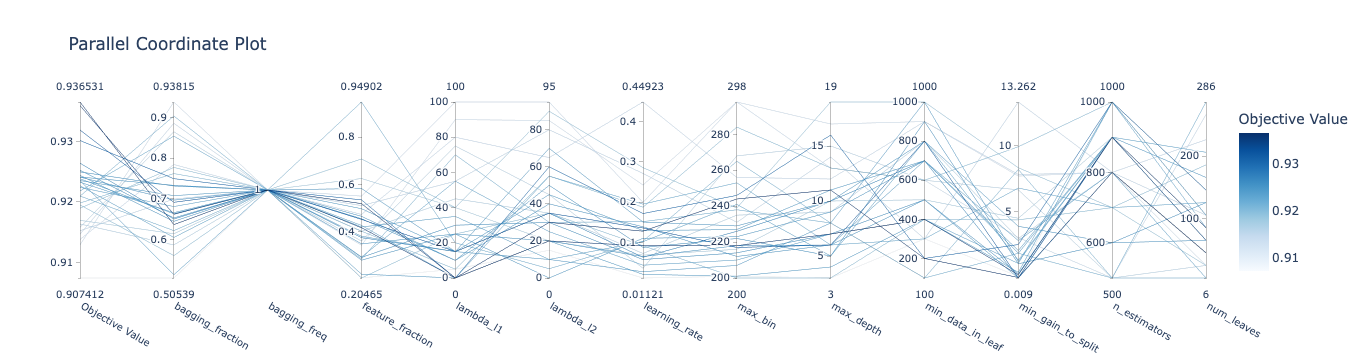

In [770]:
optuna.visualization.plot_parallel_coordinate(study)

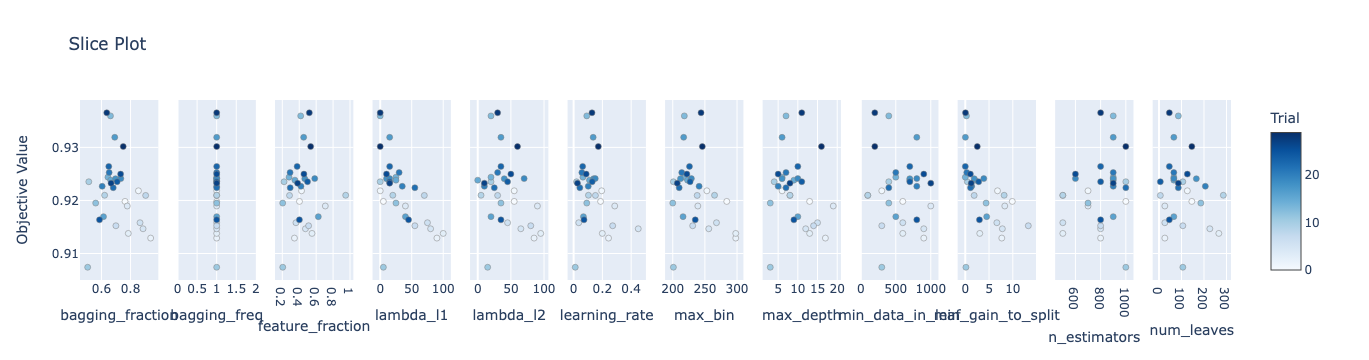

In [771]:
optuna.visualization.plot_slice(study)

In [772]:
optuna.visualization.plot_param_importances(study)

#### 6.3.1.1. BEST LGBM Model and Metrics

In [773]:
Best_trial = study.best_trial.params
Best_trial

{'n_estimators': 800,
 'learning_rate': 0.1277745142416165,
 'num_leaves': 46,
 'max_depth': 11,
 'min_data_in_leaf': 200,
 'min_gain_to_split': 0.045938728922733485,
 'bagging_fraction': 0.6365876744907935,
 'max_bin': 244,
 'lambda_l1': 0,
 'lambda_l2': 30,
 'bagging_freq': 1,
 'feature_fraction': 0.5192113148967135}

In [774]:
lgbm_model= LGBMClassifier(**Best_trial)
lgbm_model.fit(X_train ,y_train)
y_pred = lgbm_model.predict(X_test)

[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=200, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=200
[LightGBM] [Warning] lambda_l2 is set=30, reg_lambda=0.0 will be ignored. Current value: lambda_l2=30
[LightGBM] [Warning] feature_fraction is set=0.5192113148967135, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5192113148967135
[LightGBM] [Warning] bagging_fraction is set=0.6365876744907935, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6365876744907935
[LightGBM] [Warning] min_gain_to_split is set=0.045938728922733485, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.045938728922733485
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0


In [775]:
## SAVE MODEL

import joblib,pickle
from pickle import dump, load
joblib.dump(lgbm_model, 'lgbm_model.joblib') 


['lgbm_model.joblib']

In [776]:
#load model
joblib.load('/Users/goncaavcicakmak/Desktop/ads-542-finalproject/notebooks/lgbm_model.joblib')


LGBMClassifier(bagging_fraction=0.6365876744907935, bagging_freq=1,
               feature_fraction=0.5192113148967135, lambda_l1=0, lambda_l2=30,
               learning_rate=0.1277745142416165, max_bin=244, max_depth=11,
               min_data_in_leaf=200, min_gain_to_split=0.045938728922733485,
               n_estimators=800, num_leaves=46)

### 6.3.1.2. Classification Report 

In [777]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94      1707
         1.0       0.96      0.91      0.94      1776

    accuracy                           0.94      3483
   macro avg       0.94      0.94      0.94      3483
weighted avg       0.94      0.94      0.94      3483



#### 6.3.1.3. SHAPLEY FOR FEATURE IMPORTANCES 

In [778]:
import shap
from shap.maskers import Independent
from shap import TreeExplainer, Explanation, LinearExplainer
from shap.plots import waterfall
lgbm_explainer = shap.TreeExplainer(lgbm_model, X_train, feature_names=X_train.columns.tolist())

In [779]:
lgbm_explainer_values = lgbm_explainer(X_train, y_train,check_additivity=False )

100%|===================| 66150/66161 [45:43<00:00]        

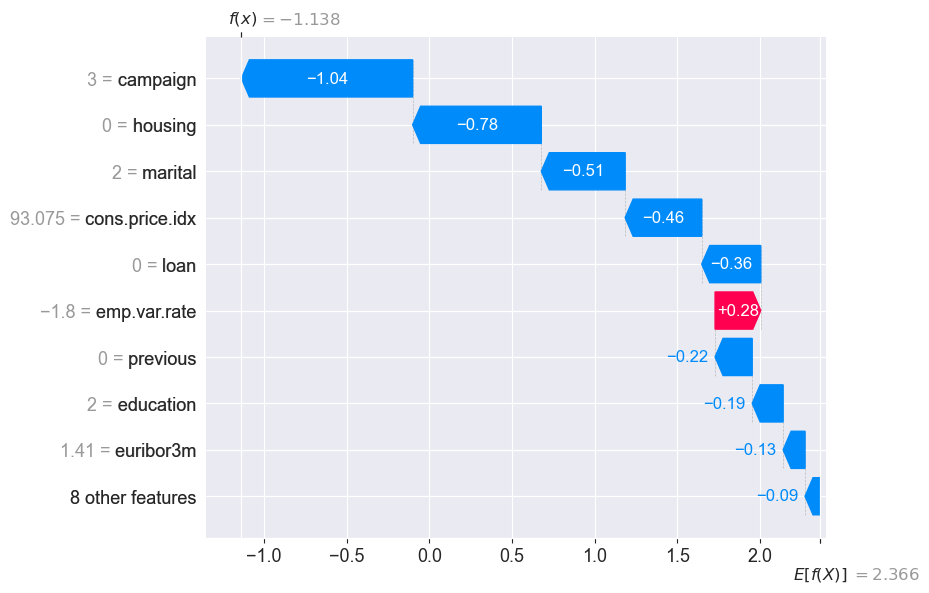

In [780]:
shap.waterfall_plot(lgbm_explainer_values[0])

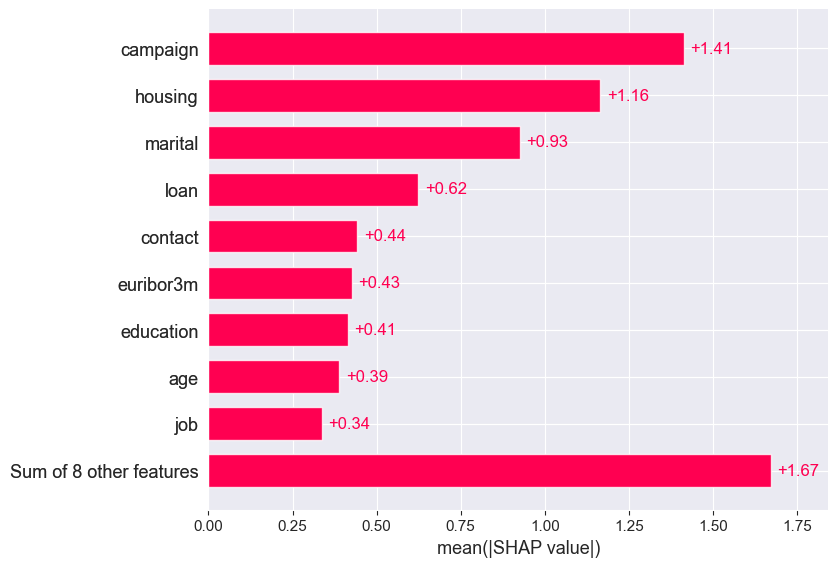

In [781]:
shap.plots.bar(lgbm_explainer_values)

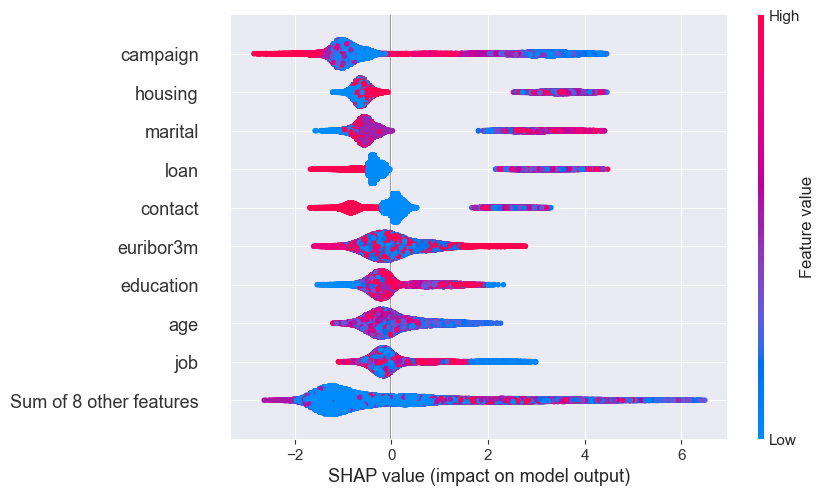

In [782]:
shap.plots.beeswarm(lgbm_explainer_values)

#### 6.3.1.4.ROC CURVE

#### Optimal Threshold : ROC curve

The false-positive rate is plotted on the x-axis and the true positive rate is plotted on the y-axis and the plot is referred to as the Receiver Operating Characteristic curve, or ROC curve.
A diagonal line on the plot from the bottom-left to top-right indicates the curve for a no-skill classifier (predicts the majority class in all cases), and a point in the top left of the plot indicates a model with perfect skill.

There are many ways we could locate the threshold with the optimal balance between false positive and true positive rates. Firstly, the true positive rate is called the Sensitivity. One minus the false-positive rate is called the Specificity. The Geometric Mean or G-mean is a metric for imbalanced classification that, if optimized, will seek a balance between the sensitivity and the specificity.




In [784]:
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred)

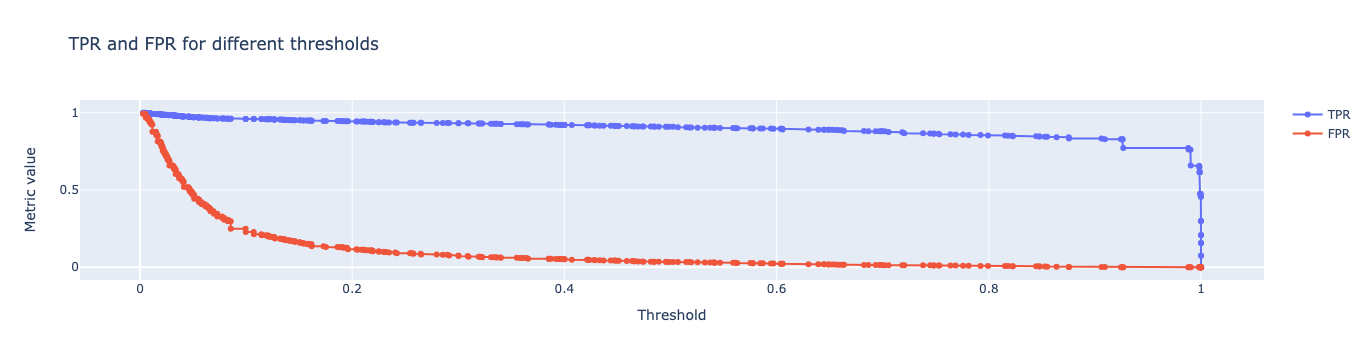

In [785]:
import plotly.express as px
import plotly.graph_objects as go
import scikitplot as skplt

y_proba = lgbm_model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_proba[:, 1])
thresholds = thresholds[thresholds < 1]

fig = go.Figure()
fig.add_trace(go.Scatter(x=thresholds, y=tpr,
                    mode='lines+markers',
                    name='TPR'))
fig.add_trace(go.Scatter(x=thresholds, y=fpr,
                    mode='lines+markers',
                    name='FPR'))

fig.update_layout(
    title="TPR and FPR for different thresholds",
    xaxis_title="Threshold",
    yaxis_title="Metric value",    
)
fig.show()



#### Optimal Threshold : Precision Recall curve

Unlike the ROC Curve, a precision-recall curve focuses on the performance of a classifier on the positive (minority class) only. Precision is the ratio of the number of true positives divided by the sum of the true positives and false positives.

It describes how good a model is at predicting the positive class. Recall is calculated as the ratio of the number of true positives divided by the sum of the true positives and the false negatives.

In [786]:

precision, recall, thresholds = precision_recall_curve(y_test,y_pred)

#Calculate f-Score
fscore = (2 * precision * recall) / (precision + recall)

# locate the index of the largest g-mean
ix = np.argmax(fscore)

print('Best Threshold=%f, G-mean=%.3f' % (thresholds[ix], fscore[ix]))

Best Threshold=1.000000, G-mean=0.936


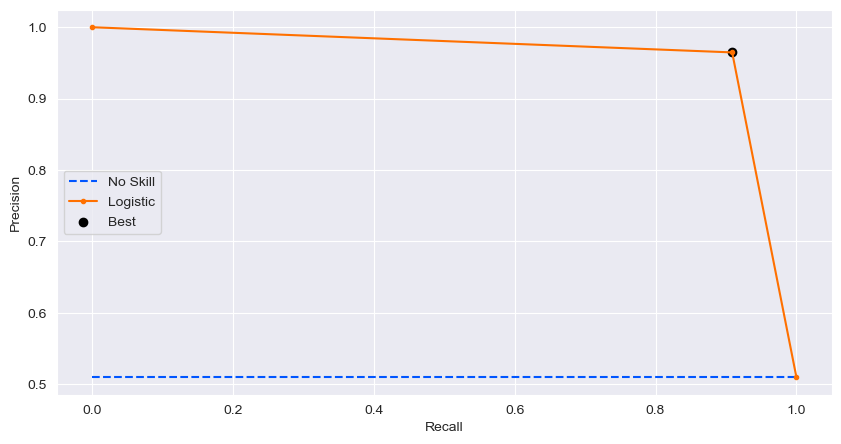

In [787]:
no_skill = len(y_test[y_test==1]) / len(y_test)

plt.figure(figsize=(10,5))
plt.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill') 
plt.plot(recall, precision, marker='.', label='Logistic') 
plt.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best') 
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
# show the plot
plt.show()


#### 6.3.1.5. CONFUSION MATRIX

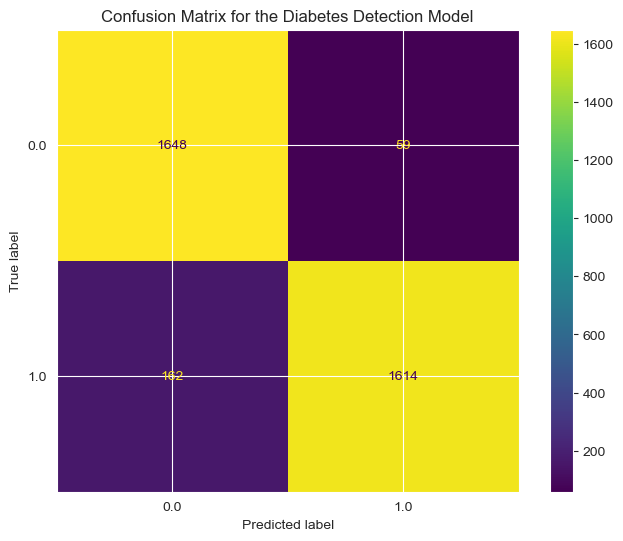

In [788]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
cf =confusion_matrix(y_test,y_pred)
# Change figure size and increase dpi for better resolution
# and get reference to axes object
fig, ax = plt.subplots(figsize=(8,6), dpi=100)

# initialize using the raw 2D confusion matrix 
# and output labels (in our case, it's 0 and 1)
display = ConfusionMatrixDisplay(cf, display_labels=lgbm_model.classes_)

# set the plot title using the axes object
ax.set(title='Confusion Matrix for the Diabetes Detection Model')

# show the plot. 
# Pass the parameter ax to show customizations (ex. title) 
display.plot(ax=ax);

### 6.3.2. MODEL-2 BAGGING CLASSIFIER<a class="anchor" id="BAGGING-CLASSIFIER"></a>

In [789]:
import warnings
warnings.filterwarnings("ignore")

In [790]:
def objective(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
   
        'bootstrap': trial.suggest_categorical("bootstrap", [True, False]),
        'bootstrap_features': trial.suggest_categorical("bootstrap_features", [True, False]),
        "n_jobs":-1, # deploy 100% of gpu's computational power 
        "random_state":42}
    
    model =BaggingClassifier(**param)  
    
    model.fit(X_train,y_train)
    
    y_pred = model.predict(X_test)

    # Evaluate predictions
    f1_scores=f1_score(y_test, y_pred, average='weighted')
    return f1_scores

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30)

[I 2023-06-10 16:06:06,554] A new study created in memory with name: no-name-dbba66b8-6a4b-4c59-b775-5f751fe460fb
[I 2023-06-10 16:06:16,956] Trial 0 finished with value: 0.9342487429875391 and parameters: {'n_estimators': 245, 'bootstrap': True, 'bootstrap_features': False}. Best is trial 0 with value: 0.9342487429875391.
[I 2023-06-10 16:06:49,629] Trial 1 finished with value: 0.9356839040279832 and parameters: {'n_estimators': 912, 'bootstrap': True, 'bootstrap_features': False}. Best is trial 1 with value: 0.9356839040279832.
[I 2023-06-10 16:06:58,309] Trial 2 finished with value: 0.9353963099871405 and parameters: {'n_estimators': 242, 'bootstrap': True, 'bootstrap_features': False}. Best is trial 1 with value: 0.9356839040279832.
[I 2023-06-10 16:07:21,832] Trial 3 finished with value: 0.8997795993543087 and parameters: {'n_estimators': 412, 'bootstrap': False, 'bootstrap_features': False}. Best is trial 1 with value: 0.9356839040279832.
[I 2023-06-10 16:07:28,981] Trial 4 finis

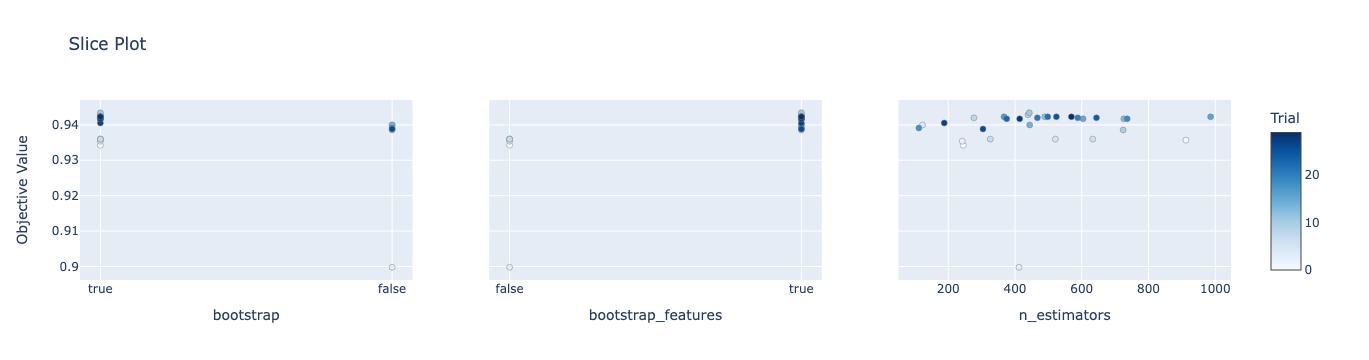

In [791]:
optuna.visualization.plot_slice(study)

In [792]:
optuna.visualization.plot_param_importances(study)

### 6.3.2.1. Best Model

In [793]:
Best_trial = study.best_trial.params
Best_trial

{'n_estimators': 443, 'bootstrap': True, 'bootstrap_features': True}

In [794]:
best_trial={'n_estimators': 408, 'bootstrap': False, 'bootstrap_features': True}
baggin_classifier_model=  BaggingClassifier(**best_trial)
baggin_classifier_model.fit(X_train ,y_train)
y_pred = baggin_classifier_model.predict(X_test)

In [795]:
# SAVE MODEL
import joblib
joblib.dump(baggin_classifier_model, 'bagging_classifier_model.joblib') 

['bagging_classifier_model.joblib']

In [796]:
#load model
model = joblib.load('/Users/goncaavcicakmak/Desktop/ads-542-finalproject/notebooks/bagging_classifier_model.joblib')

### 6.3.2.2. Classification report 

In [797]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.96      0.94      1707
         1.0       0.96      0.91      0.94      1776

    accuracy                           0.94      3483
   macro avg       0.94      0.94      0.94      3483
weighted avg       0.94      0.94      0.94      3483



### 6.3.2.3. ROC Curve

In [798]:
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Average precision recall score for classifier 92.5


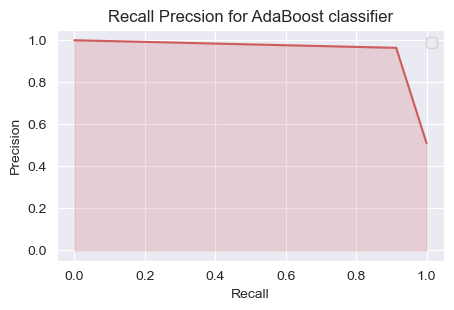

In [799]:
fig, ax = plt.subplots(figsize = (5,3))
color = 'indianred'

y_pred_decision = baggin_classifier_model.predict(X_test)
AP_score = average_precision_score(y_test, y_pred_decision)
print('Average precision recall score for classifier %.1f' %(AP_score * 100))
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_decision)
#precision, recall, _ = precision_recall_curve(original_ytest, original_y_pred_decision)
sns.lineplot(x=recall, y=precision, ax = ax, color = color)
ax.fill_between(recall, precision, 0, alpha = 0.2, color = color)

ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.set_title('Recall Precsion for AdaBoost classifier')
ax.legend()
plt.show()

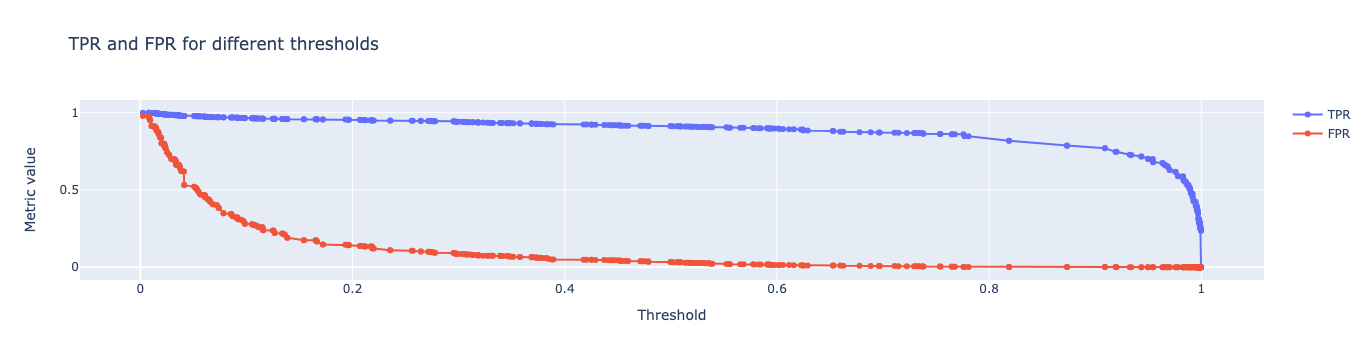

In [800]:
import plotly.graph_objs as go
y_proba = baggin_classifier_model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_proba[:, 1])
thresholds = thresholds[thresholds < 1]

fig = go.Figure()
fig.add_trace(go.Scatter(x=thresholds, y=tpr,
                    mode='lines+markers',
                    name='TPR'))
fig.add_trace(go.Scatter(x=thresholds, y=fpr,
                    mode='lines+markers',
                    name='FPR'))

fig.update_layout(
    title="TPR and FPR for different thresholds",
    xaxis_title="Threshold",
    yaxis_title="Metric value",    
)
fig.show()

In [801]:

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
gmeans = np.sqrt(tpr * (1-fpr))

# locate the index of the largest g-mean
ix = np.argmax(gmeans)

print('Best Threshold=%f, G-mean=%.3f' % (thresholds[ix], gmeans[ix]))

Best Threshold=1.000000, G-mean=0.939


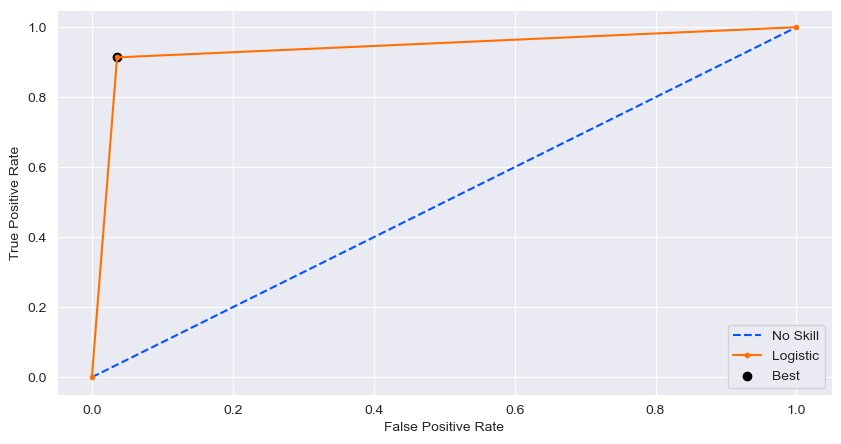

In [802]:
plt.figure(figsize=(10,5))
plt.plot([0,1], [0,1], linestyle='--', label='No Skill') 

plt.plot(fpr, tpr, marker='.', label='Logistic') 
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best') 
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [803]:

precision, recall, thresholds = precision_recall_curve(y_test,y_pred)

#Calculate f-Score
fscore = (2 * precision * recall) / (precision + recall)

# locate the index of the largest g-mean
ix = np.argmax(fscore)

print('Best Threshold=%f, G-mean=%.3f' % (thresholds[ix], fscore[ix]))

Best Threshold=1.000000, G-mean=0.938


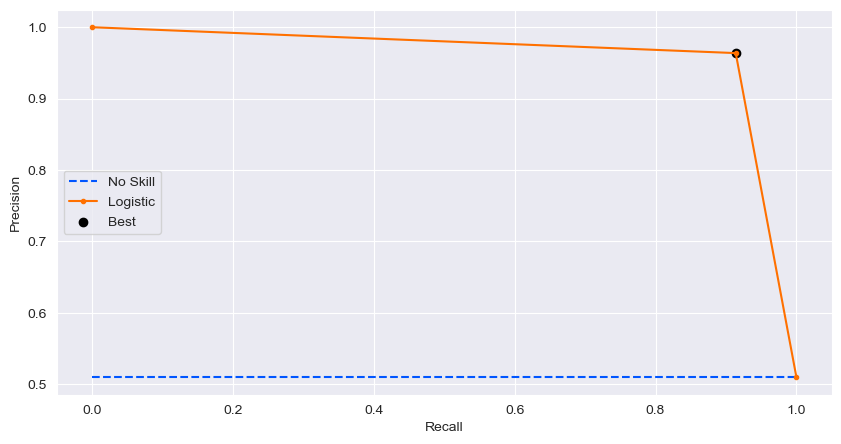

In [804]:
no_skill = len(y_test[y_test==1]) / len(y_test)

plt.figure(figsize=(10,5))
plt.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill') 
plt.plot(recall, precision, marker='.', label='Logistic') 
plt.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best') 
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
# show the plot
plt.show()

#### 6.3.2.4. CONFUSION MATRIX

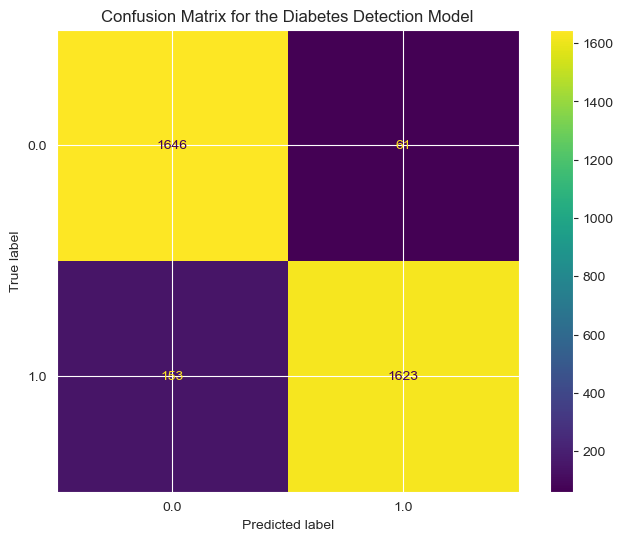

In [805]:
#create confusion matrix
c_matrix = metrics.confusion_matrix(y_test, y_pred)
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
cf =confusion_matrix(y_test,y_pred)
# Change figure size and increase dpi for better resolution
# and get reference to axes object
fig, ax = plt.subplots(figsize=(8,6), dpi=100)

# initialize using the raw 2D confusion matrix 
# and output labels (in our case, it's 0 and 1)
display = ConfusionMatrixDisplay(cf, display_labels=baggin_classifier_model.classes_)

# set the plot title using the axes object
ax.set(title='Confusion Matrix for the Diabetes Detection Model')

# show the plot. 
# Pass the parameter ax to show customizations (ex. title) 
display.plot(ax=ax);

### 6.3.3. MODEL-3 XGBOOST CLASSIFIER<a class="anchor" id="XGBOOST-CLASSIFIER"></a>

In [40]:
def objective(trial):

    param = {
        
        # hyperparameter settings
        
        'max_depth': trial.suggest_int('max_depth', 1, 17),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.15),
        'n_estimators': trial.suggest_int('n_estimators', 50, 1500),
        'subsample': trial.suggest_float('subsample', 0.01, 0.65),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.01, 0.95),
        "reg_alpha":trial.suggest_float("reg_alpha",0.1,0.5),
        "reg_lambda":trial.suggest_float("reg_lambda",0.1,0.5),
        
        # non-hyperparameter settings
        
        "n_jobs":-1, # deploy 100% of gpu's computational power 
        "random_state":42
    }
    
    model =XGBClassifier(**param,objective ='reg:squarederror')  
    
    model.fit(X_train,y_train,eval_set=[(X_test,y_test)],early_stopping_rounds=100,verbose=False)
    
    y_pred = model.predict(X_test)

    # Evaluate predictions
    f1_scores=f1_score(y_test, y_pred, average='weighted')
    return f1_scores

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30)


[I 2023-06-10 16:50:09,158] A new study created in memory with name: no-name-f5199724-1bd5-4dbd-89e9-d46c638ff6f7
[I 2023-06-10 16:50:14,888] Trial 0 finished with value: 0.9313434147829553 and parameters: {'max_depth': 7, 'learning_rate': 0.11550966067912546, 'n_estimators': 349, 'subsample': 0.18301995267801993, 'colsample_bytree': 0.24499486684490646, 'reg_alpha': 0.10297191037001925, 'reg_lambda': 0.41517420270612293}. Best is trial 0 with value: 0.9313434147829553.
[I 2023-06-10 16:50:42,369] Trial 1 finished with value: 0.9385310960030521 and parameters: {'max_depth': 12, 'learning_rate': 0.0369669235126634, 'n_estimators': 723, 'subsample': 0.6268988086320513, 'colsample_bytree': 0.25659656152776955, 'reg_alpha': 0.2772154921821256, 'reg_lambda': 0.301631351312973}. Best is trial 1 with value: 0.9385310960030521.
[I 2023-06-10 16:50:52,133] Trial 2 finished with value: 0.9350788152953204 and parameters: {'max_depth': 9, 'learning_rate': 0.11519527026320911, 'n_estimators': 687, 

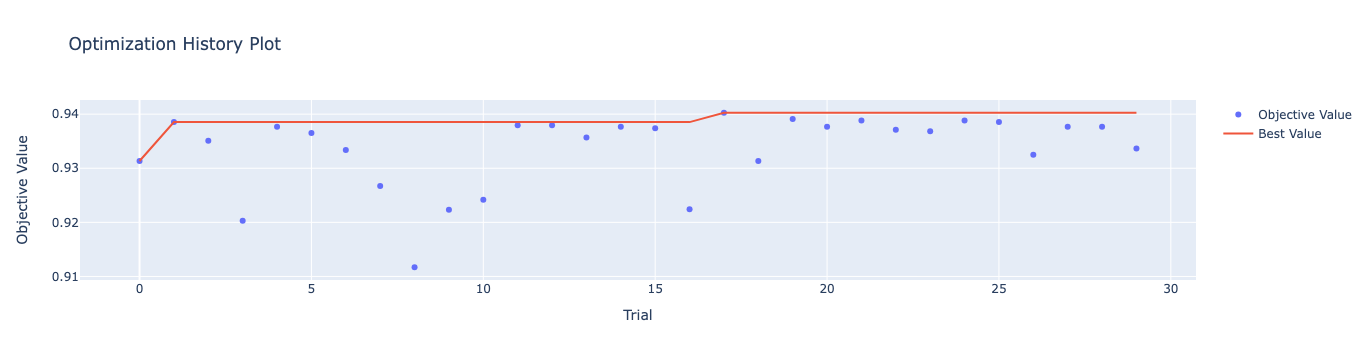

In [50]:
optuna.visualization.plot_optimization_history(study)

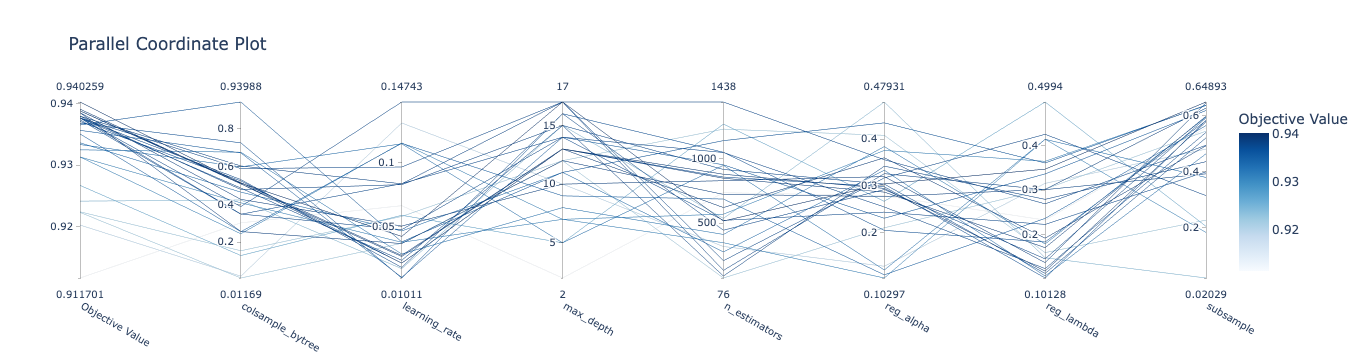

In [51]:
optuna.visualization.plot_parallel_coordinate(study)

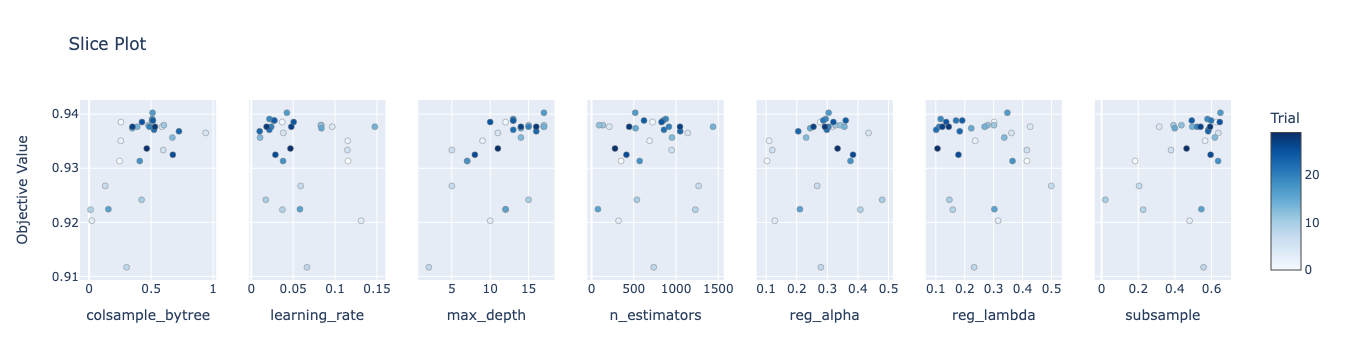

In [52]:
optuna.visualization.plot_slice(study)

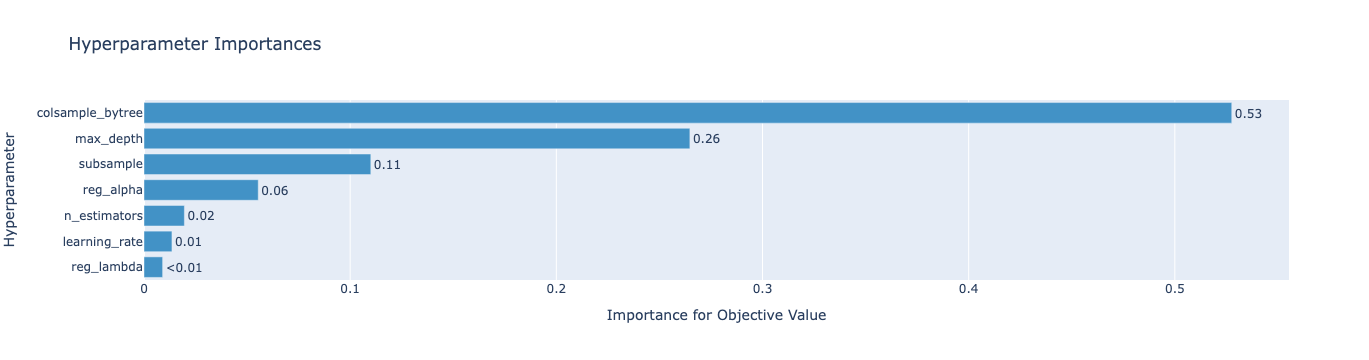

In [53]:
optuna.visualization.plot_param_importances(study)

#### 6.3.3.1 BEST XGB MODEL AND EVALUATION METRICS

In [54]:
Best_trial = study.best_trial.params
Best_trial

{'max_depth': 17,
 'learning_rate': 0.04253736068327828,
 'n_estimators': 517,
 'subsample': 0.6489298539237697,
 'colsample_bytree': 0.5117164405901318,
 'reg_alpha': 0.3042725884752507,
 'reg_lambda': 0.3474868393613407}

In [11]:
best_trial= {'max_depth': 17,
 'learning_rate': 0.04253736068327828,
 'n_estimators': 517,
 'subsample': 0.6489298539237697,
 'colsample_bytree': 0.5117164405901318,
 'reg_alpha': 0.3042725884752507,
 'reg_lambda': 0.3474868393613407}
xgb_model= XGBClassifier(**best_trial)
xgb_model.fit(X_train ,y_train)
y_pred = xgb_model.predict(X_test)

In [12]:
# SAVE MODEL
import joblib
joblib.dump(xgb_model, 'xgb_model.joblib') 

['xgb_model.joblib']

In [57]:
#load model
model1 = joblib.load('/Users/goncaavcicakmak/Desktop/ads-542-finalproject/notebooks/xgb_model.joblib')

In [49]:
model1.predict(X_test)

array([1, 0, 1, ..., 0, 0, 0])

### 6.3.3.2. Feature Importance

In [13]:
import shap
from shap.maskers import Independent
from shap import TreeExplainer, Explanation, LinearExplainer
from shap.plots import waterfall
xgb_explainer = shap.TreeExplainer(xgb_model, X_train, feature_names=X_train.columns.tolist())

In [14]:
xgb_explainer_values = xgb_explainer(X_train, y_train,check_additivity=False )

100%|===================| 66150/66161 [104:43<00:01]        

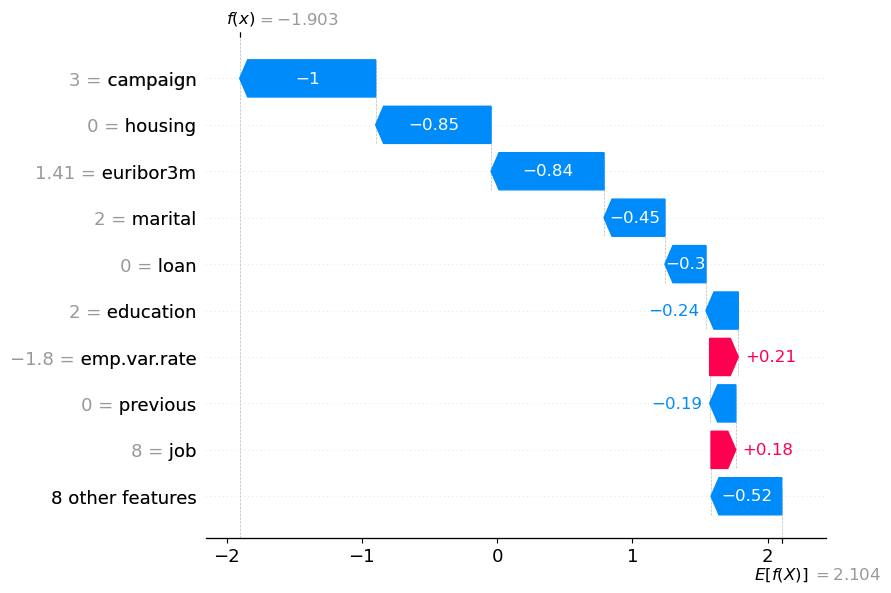

In [15]:
shap.waterfall_plot(xgb_explainer_values[0])

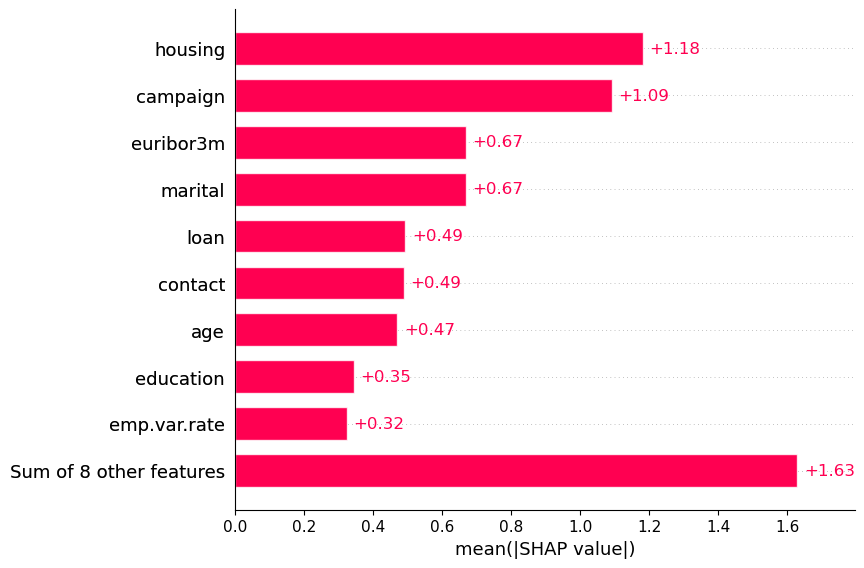

In [16]:
shap.plots.bar(xgb_explainer_values)

In [ ]:
shap.plots.beeswarm(xgb_explainer_values)

### 6.3.3.3. Classification Report 

In [58]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.96      0.94      1707
         1.0       0.96      0.91      0.94      1776

    accuracy                           0.94      3483
   macro avg       0.94      0.94      0.94      3483
weighted avg       0.94      0.94      0.94      3483



In [59]:
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred)

#### 6.3.3.4. ROC Curve

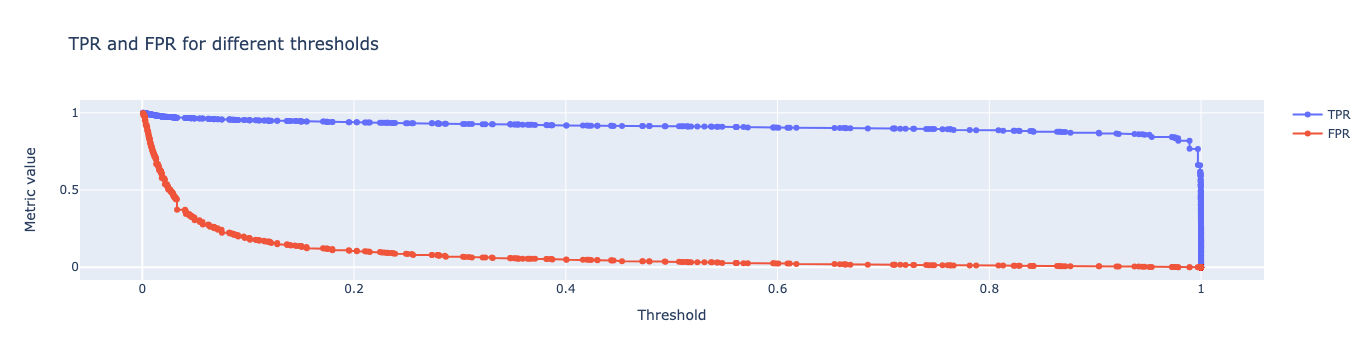

In [60]:
import plotly.express as px
import plotly.graph_objects as go
import scikitplot as skplt
y_proba = xgb_model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_proba[:, 1])
thresholds = thresholds[thresholds <= 1]

fig = go.Figure()
fig.add_trace(go.Scatter(x=thresholds, y=tpr,
                    mode='lines+markers',
                    name='TPR'))
fig.add_trace(go.Scatter(x=thresholds, y=fpr,
                    mode='lines+markers',
                    name='FPR'))

fig.update_layout(
    title="TPR and FPR for different thresholds",
    xaxis_title="Threshold",
    yaxis_title="Metric value",    
)
fig.show()

In [61]:
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred)

In [62]:

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
gmeans = np.sqrt(tpr * (1-fpr))

# locate the index of the largest g-mean
ix = np.argmax(gmeans)

print('Best Threshold=%f, G-mean=%.3f' % (thresholds[ix], gmeans[ix]))

Best Threshold=1.000000, G-mean=0.938


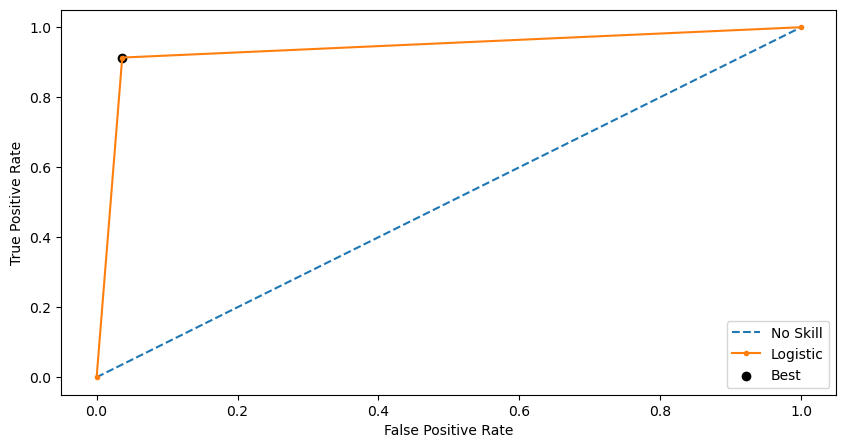

In [63]:
plt.figure(figsize=(10,5))
plt.plot([0,1], [0,1], linestyle='--', label='No Skill') 

plt.plot(fpr, tpr, marker='.', label='Logistic') 
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best') 
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [64]:


precision, recall, thresholds = precision_recall_curve(y_test,y_pred)

#Calculate f-Score
fscore = (2 * precision * recall) / (precision + recall)

# locate the index of the largest g-mean
ix = np.argmax(fscore)

print('Best Threshold=%f, G-mean=%.3f' % (thresholds[ix], fscore[ix]))

Best Threshold=1.000000, G-mean=0.938


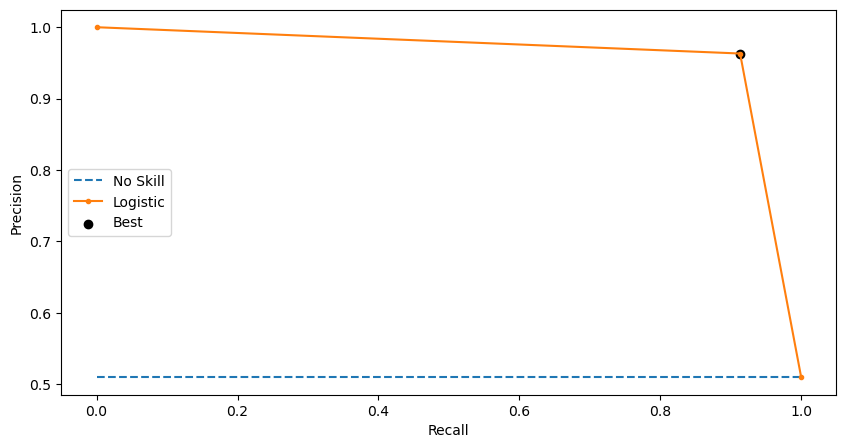

In [65]:
no_skill = len(y_test[y_test==1]) / len(y_test)

plt.figure(figsize=(10,5))
plt.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill') 
plt.plot(recall, precision, marker='.', label='Logistic') 
plt.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best') 
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
# show the plot
plt.show()

#### 6.3.3.5. CONFUSION MATRIX

In [66]:
cf =confusion_matrix(y_test,y_pred)

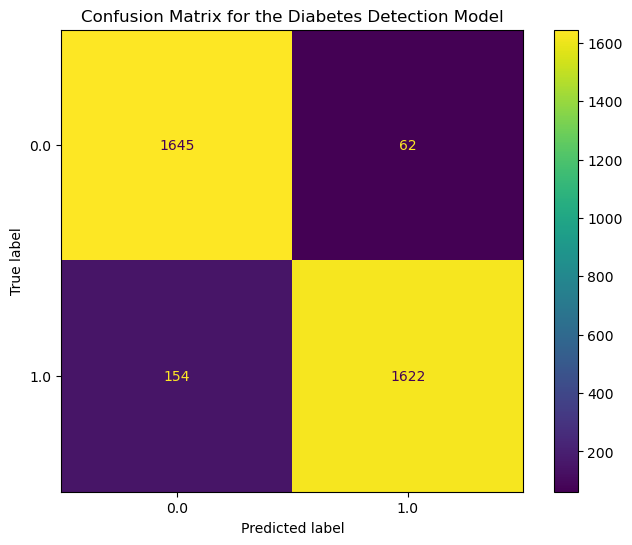

In [67]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
cf =confusion_matrix(y_test,y_pred)
# Change figure size and increase dpi for better resolution
# and get reference to axes object
fig, ax = plt.subplots(figsize=(8,6), dpi=100)

# initialize using the raw 2D confusion matrix 
# and output labels (in our case, it's 0 and 1)
display = ConfusionMatrixDisplay(cf, display_labels=xgb_model.classes_)

# set the plot title using the axes object
ax.set(title='Confusion Matrix for the Diabetes Detection Model')

# show the plot. 
# Pass the parameter ax to show customizations (ex. title) 
display.plot(ax=ax);

### 7. ENSEMBLE MODELS<a class="anchor" id="ENSEMBLE-MODELS"></a>

Ensemble models combine the decisions from multiple models to improve the overall performance. This can be achieved in various ways. 

### 7.1.VOTING CLASSIFIER<a class="anchor" id="VOTING-CLASSIFIER"></a>

Voting is one of the ensemble machine learning algorithm.A voting ensemble involves summing the predictions made by classification models or averaging the predictions made by regression models.

For regression, a voting ensemble involves making a prediction that is the average of multiple other regression models.

In classification, a hard voting ensemble involves summing the votes for crisp class labels from other models and predicting the class with the most votes. A soft voting ensemble involves summing the predicted probabilities for class labels and predicting the class label with the largest sum probability.

In [80]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.ensemble import VotingClassifier

votes = [('lgbm',lgbm_model ),
         ('xgb',xgb_model),
         ('bagging_classifier',baggin_classifier_model )]

# soft voting based on weights
votesClass = VotingClassifier(estimators=votes, voting='soft', n_jobs=-1)
votesClass_cv = cross_validate(votesClass, X_train, y_train, cv=KFold(3))
votesClass.fit(X_train, y_train)
y_pred = votesClass.predict(X_test) 
print("Score:",votesClass.score(X_test,y_test))


[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=500, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=500
[LightGBM] [Warning] lambda_l2 is set=90, reg_lambda=0.0 will be ignored. Current value: lambda_l2=90
[LightGBM] [Warning] feature_fraction is set=0.27376647954063726, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.27376647954063726
[LightGBM] [Warning] bagging_fraction is set=0.6120615784321417, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6120615784321417
[LightGBM] [Warning] min_gain_to_split is set=0.13495390915057787, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.13495390915057787
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
Score: 0.9455540355677154


### 7.1.2. ROC Curve 

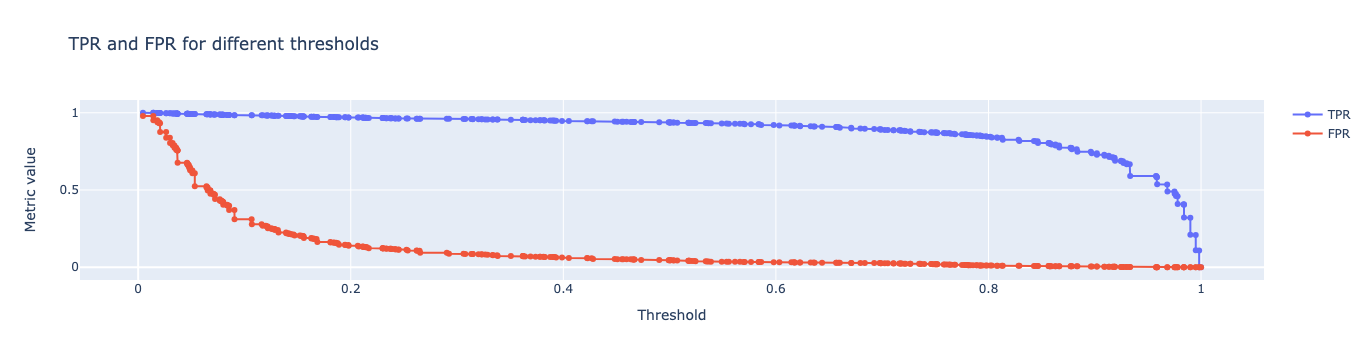

In [81]:
y_proba = votesClass.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_proba[:, 1])
thresholds = thresholds[thresholds <= 1]

fig = go.Figure()
fig.add_trace(go.Scatter(x=thresholds, y=tpr,
                    mode='lines+markers',
                    name='TPR'))
fig.add_trace(go.Scatter(x=thresholds, y=fpr,
                    mode='lines+markers',
                    name='FPR'))

fig.update_layout(
    title="TPR and FPR for different thresholds",
    xaxis_title="Threshold",
    yaxis_title="Metric value",    
)
fig.show()

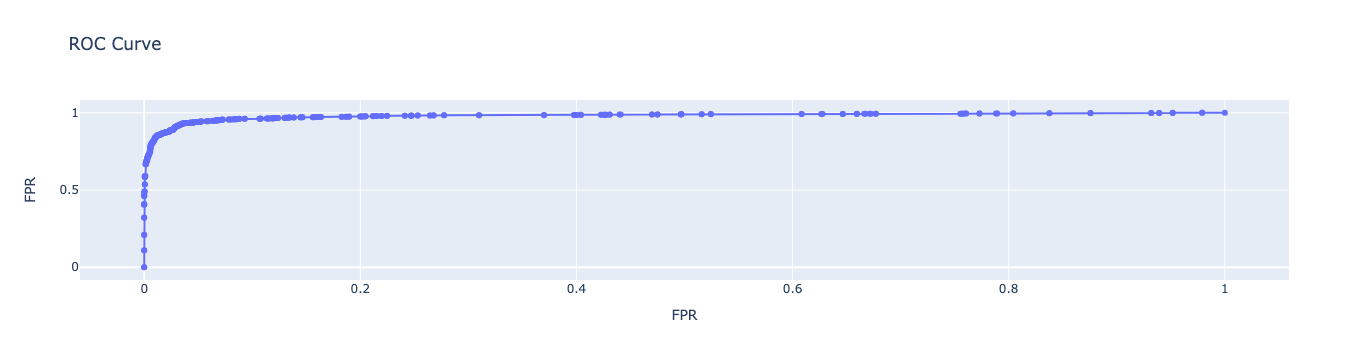

In [82]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=fpr, y=tpr,
                    mode='lines+markers',
                    name='TPR'))
fig.update_layout(
    title="ROC Curve",
    xaxis_title="FPR",
    yaxis_title="FPR",    
)
fig.show()

### 7.1.3. Confusion Matrix

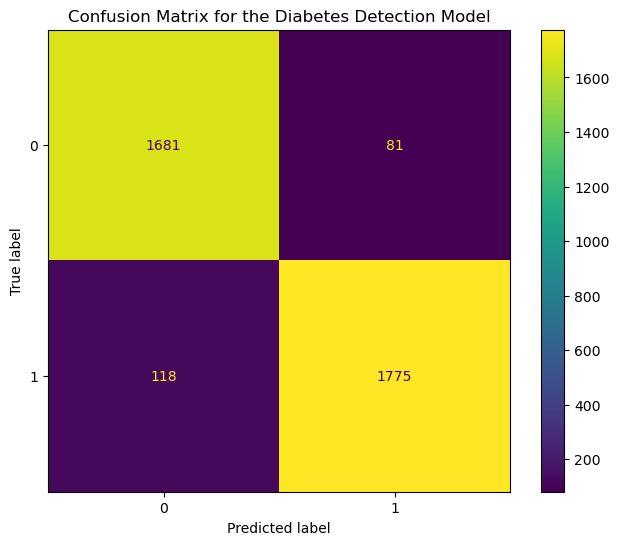

In [83]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
cf =confusion_matrix(y_test,y_pred)
# Change figure size and increase dpi for better resolution
# and get reference to axes object
fig, ax = plt.subplots(figsize=(8,6), dpi=100)

# initialize using the raw 2D confusion matrix 
# and output labels (in our case, it's 0 and 1)
display = ConfusionMatrixDisplay(cf, display_labels=votesClass.classes_)

# set the plot title using the axes object
ax.set(title='Confusion Matrix for the Diabetes Detection Model')

# show the plot. 
# Pass the parameter ax to show customizations (ex. title) 
display.plot(ax=ax);

In [84]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      1762
           1       0.96      0.94      0.95      1893

    accuracy                           0.95      3655
   macro avg       0.95      0.95      0.95      3655
weighted avg       0.95      0.95      0.95      3655



In [85]:
# SAVE MODEL
joblib.dump(votesClass, 'votesClass_model.joblib') 

['votesClass_model.joblib']

In [87]:

model = joblib.load('/Users/goncaavcicakmak/Desktop/ads-542-finalproject/notebooks/votesClass_model.joblib')

### 7.2. STACKING<a class="anchor" id="STACKING"></a> 

Stacking is an ensemble learning technique that uses predictions from multiple models (for example decision tree, knn or svm) to build a new model. This model is used for making predictions on the test set.

The final_estimator will use the predictions of the estimators as input. It needs to be a classifier or a regressor when using StackingClassifier or StackingRegressor.

In [88]:
from sklearn.ensemble import StackingClassifier

level0 = list()
level0.append(('lgbm', lgbm_model))
level0.append(('xgb', xgb_model ))
level0.append(('bagging_classifier', baggin_classifier_model ))
# define meta learner model
level1 = LogisticRegression()
# define the stacking ensemble
stack_model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)

stack_model.fit(X_train,y_train)
y_pred = stack_model.predict(X_test)
print("Score:",stack_model.score(X_test,y_test))

[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=500, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=500
[LightGBM] [Warning] lambda_l2 is set=90, reg_lambda=0.0 will be ignored. Current value: lambda_l2=90
[LightGBM] [Warning] feature_fraction is set=0.27376647954063726, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.27376647954063726
[LightGBM] [Warning] bagging_fraction is set=0.6120615784321417, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6120615784321417
[LightGBM] [Warning] min_gain_to_split is set=0.13495390915057787, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.13495390915057787
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


### 7.2.1 ROC Curve

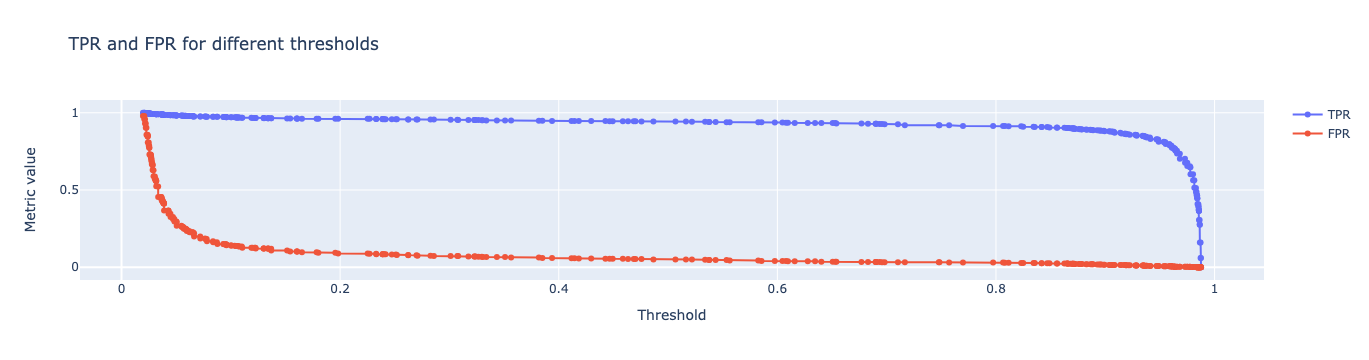

In [89]:
y_proba = stack_model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_proba[:, 1])
thresholds = thresholds[thresholds <= 1]

fig = go.Figure()
fig.add_trace(go.Scatter(x=thresholds, y=tpr,
                    mode='lines+markers',
                    name='TPR'))
fig.add_trace(go.Scatter(x=thresholds, y=fpr,
                    mode='lines+markers',
                    name='FPR'))

fig.update_layout(
    title="TPR and FPR for different thresholds",
    xaxis_title="Threshold",
    yaxis_title="Metric value",    
)
fig.show()

### 7.2.3. Confusion Matrix

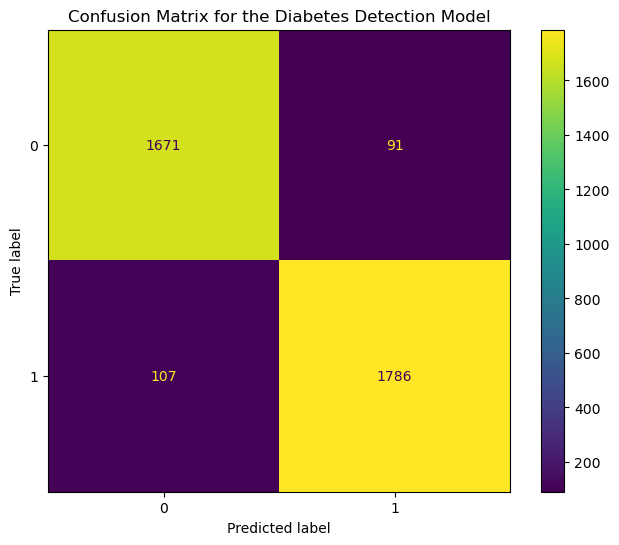

In [91]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
cf =confusion_matrix(y_test,y_pred)
# Change figure size and increase dpi for better resolution
# and get reference to axes object
fig, ax = plt.subplots(figsize=(8,6), dpi=100)

# initialize using the raw 2D confusion matrix 
# and output labels (in our case, it's 0 and 1)
display = ConfusionMatrixDisplay(cf, display_labels=stack_model.classes_)

# set the plot title using the axes object
ax.set(title='Confusion Matrix for the Diabetes Detection Model')

# show the plot. 
# Pass the parameter ax to show customizations (ex. title) 
display.plot(ax=ax);

### 7.2.4. Classification Report 

In [92]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94      1762
           1       0.95      0.94      0.95      1893

    accuracy                           0.95      3655
   macro avg       0.95      0.95      0.95      3655
weighted avg       0.95      0.95      0.95      3655



In [95]:
# SAVE MODEL
joblib.dump(stack_model, 'stack_model.joblib') 

['stack_model.joblib']

In [97]:

model = joblib.load('/Users/goncaavcicakmak/Desktop/ads-542-finalproject/notebooks/stack_model.joblib')

### 7.3. BAGGING REGRESSOR<a class="anchor" id="BAGGING-REGRESSOR"></a>

A Bagging regressor is an ensemble meta-estimator that fits base regressors each on random subsets of the original dataset and then aggregate their individual predictions (either by voting or by averaging) to form a final prediction. Such a meta-estimator can typically be used as a way to reduce the variance of a black-box estimator (e.g., a decision tree), by introducing randomization into its construction procedure and then making an ensemble out of it.

In [98]:
from sklearn.svm import SVR
from sklearn.ensemble import BaggingClassifier
bagging_reg_model = BaggingClassifier(base_estimator=lgbm_model,n_estimators=500,max_samples=0.25,bootstrap=True,max_features=0.5,bootstrap_features=True,random_state=42)

bagging_reg_model.fit(X_train,y_train)
y_pred = bagging_reg_model.predict(X_test)
print("Score:",bagging_reg_model.score(X_test,y_test))

[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_gain_to_split is set=0.13495390915057787, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.13495390915057787
[LightGBM] [Warning] feature_fraction is set=0.27376647954063726, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.27376647954063726
[LightGBM] [Warning] bagging_fraction is set=0.6120615784321417, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6120615784321417
[LightGBM] [Warning] lambda_l2 is set=90, reg_lambda=0.0 will be ignored. Current value: lambda_l2=90
[LightGBM] [Warning] min_data_in_leaf is set=500, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=500
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
Score: 0.8782489740082079


### 7.3.1 ROC Curve

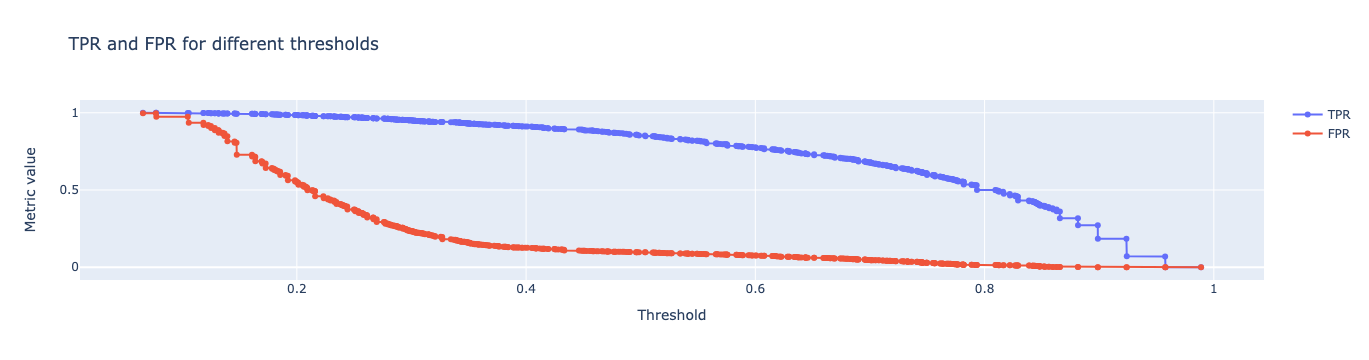

In [99]:
y_proba = bagging_reg_model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_proba[:, 1])
thresholds = thresholds[thresholds <= 1]

fig = go.Figure()
fig.add_trace(go.Scatter(x=thresholds, y=tpr,
                    mode='lines+markers',
                    name='TPR'))
fig.add_trace(go.Scatter(x=thresholds, y=fpr,
                    mode='lines+markers',
                    name='FPR'))

fig.update_layout(
    title="TPR and FPR for different thresholds",
    xaxis_title="Threshold",
    yaxis_title="Metric value",    
)
fig.show()

### 7.3.2 Classification Report

In [100]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1762
           1       0.90      0.86      0.88      1893

    accuracy                           0.88      3655
   macro avg       0.88      0.88      0.88      3655
weighted avg       0.88      0.88      0.88      3655



### 7.3.3. Classification Report 

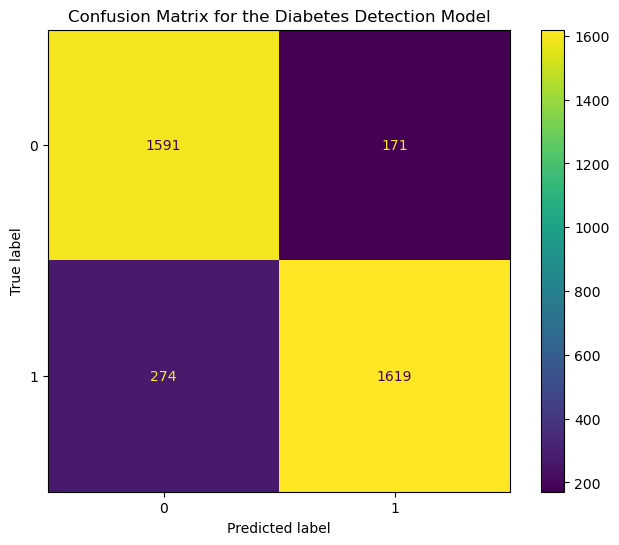

In [101]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
cf =confusion_matrix(y_test,y_pred)
# Change figure size and increase dpi for better resolution
# and get reference to axes object
fig, ax = plt.subplots(figsize=(8,6), dpi=100)

# initialize using the raw 2D confusion matrix 
# and output labels (in our case, it's 0 and 1)
display = ConfusionMatrixDisplay(cf, display_labels=bagging_reg_model.classes_)

# set the plot title using the axes object
ax.set(title='Confusion Matrix for the Diabetes Detection Model')

# show the plot. 
# Pass the parameter ax to show customizations (ex. title) 
display.plot(ax=ax);

In [102]:
# SAVE MODEL
joblib.dump(bagging_reg_model, 'bagging_reg_model.joblib') 


['bagging_reg_model.joblib']

In [103]:

model = joblib.load('/Users/goncaavcicakmak/Desktop/ads-542-finalproject/notebooks/bagging_reg_model.joblib')

### 8. MAKE PIPELINE FOR MODEL DEPLOYEMENT WITH STREAMLIT<a class="anchor" id="MAKE-PIPELINE-FOR-MODEL-DEPLOYEMENT-WITH-STREAMLIT"></a>

In [78]:
df_last=pd.read_csv("/Users/goncaavcicakmak/Desktop/ads-542-finalproject/notebooks/train.csv" , index_col=[0])

In [79]:
df_last.head()

age        job  marital   education default housing loan    contact  \
0   56  housemaid  married     basic.y      no      no   no  telephone   
1   57   services  married  highschool     NaN      no   no  telephone   
2   37   services  married  highschool      no     yes   no  telephone   
3   40      admin  married     basic6y      no      no   no  telephone   
4   56   services  married  highschool      no      no  yes  telephone   

   campaign  pdays  previous     poutcome  emp.var.rate  cons.price.idx  \
0         1      0         0  nonexistent           1.1          93.994   
1         1      0         0  nonexistent           1.1          93.994   
2         1      0         0  nonexistent           1.1          93.994   
3         1      0         0  nonexistent           1.1          93.994   
4         1      0         0  nonexistent           1.1          93.994   

   cons.conf.idx  euribor3m  nr.employed   y  
0          -36.4      4.857       5191.0  no  
1          -36.4      4.857       5191.0  no  
2          -36.4      4.857       5191.0  no  
3          -36.4      4.857       5191.0  no  
4          -36.4      4.857       5191.0  no

In [80]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39411 entries, 0 to 41187
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             39411 non-null  int64  
 1   job             39102 non-null  object 
 2   marital         39339 non-null  object 
 3   education       37763 non-null  object 
 4   default         31264 non-null  object 
 5   housing         38467 non-null  object 
 6   loan            38467 non-null  object 
 7   contact         39411 non-null  object 
 8   campaign        39411 non-null  int64  
 9   pdays           39411 non-null  int64  
 10  previous        39411 non-null  int64  
 11  poutcome        39411 non-null  object 
 12  emp.var.rate    39411 non-null  float64
 13  cons.price.idx  39411 non-null  float64
 14  cons.conf.idx   39411 non-null  float64
 15  euribor3m       39411 non-null  float64
 16  nr.employed     39411 non-null  float64
 17  y               39411 non-null 

In [81]:
y=df_last['y']

In [82]:
df_last['y'] = df_last['y'].replace( ['yes','no'],[1,0] )

In [83]:
df_last['y'].value_counts()

0    34844
1     4567
Name: y, dtype: int64

In [84]:
import numpy as np
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values = np.nan,strategy ='most_frequent')

imputer = imputer.fit(df_last)
 
# Imputing the data    
df_last1 = imputer.transform(df_last)
df_last2=pd.DataFrame(data=df_last1,columns=df_last.columns)

In [87]:
y=df_last2['y']

In [88]:
X=df_last2.drop('y',axis=1)

In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [90]:
categorical_features=['marital','poutcome','job','education','default','housing', 'contact','loan']

In [91]:
numeric_features = ['age', 'campaign', 'pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']

In [92]:
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import StandardScaler, OneHotEncoder,OrdinalEncoder
from sklearn.compose import make_column_selector as selector
from sklearn.compose import ColumnTransformer

numeric_transformer = Pipeline(steps=[ ("scaler", StandardScaler())])

categorical_transformer = Pipeline(steps=[("encoder", OneHotEncoder(handle_unknown="ignore"))])
preprocessor = ColumnTransformer(transformers=[("num", numeric_transformer, numeric_features),("cat", categorical_transformer, categorical_features)])

best_params={'max_depth': 12,
             'learning_rate': 0.06021105304799994,
             'n_estimators': 833,
             'subsample': 0.556135644177332,
             'colsample_bytree': 0.7468568632513666,
             'reg_alpha': 0.31878957988713713,
             'reg_lambda': 0.3308651945471638}
clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", XGBClassifier(**best_params))])


In [93]:
from sklearn import set_config
set_config(display='diagram')
display(clf)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'campaign', 'pdays',
                                                   'previous', 'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'euribor3m',
                                                   'nr.employed']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['marital', 'poutcome', 'job',
                                                   'education', 'def...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None,
                               learning_rate=0.06021105304799994, max_bin=None,
                               max_cat_threshold=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=12,
                               max_leaves=None, min_child_weight=None,
                               missing=nan, monotone_constraints=None,
                               n_estimators=833, n_jobs=None,
                               num_parallel_tree=None, predictor=None,
                               random_state=None, ...))])

In [94]:
clf.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'campaign', 'pdays',
                                                   'previous', 'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'euribor3m',
                                                   'nr.employed']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['marital', 'poutcome', 'job',
                                                   'education', 'def...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None,
                               learning_rate=0.06021105304799994, max_bin=None,
                               max_cat_threshold=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=12,
                               max_leaves=None, min_child_weight=None,
                               missing=nan, monotone_constraints=None,
                               n_estimators=833, n_jobs=None,
                               num_parallel_tree=None, predictor=None,
                               random_state=None, ...))])

In [95]:
y_pred = clf.predict(X_test)

#### 8.1 SAVE THE BEST MODEL WITH PIPELINE

In [98]:

import pickle
filename = 'clf.sav'
pickle.dump(clf, open(filename,'wb')) 

### 9. RESULT<a class="anchor" id="RESULT"></a> 

In this project I have bank.csv data for predicting people who can take bank deposit according to features in data. Therefore I applied binary classification models to find say 'yes' for bank deposit. Because of having imbalanced data,I divide the project into two parts. In the first part I did not balanced data and directly built model. However after modelling I calculate specific evaluation metrics. When calculating metrics I considered which one of TP, FP,FN,TN is more costly for me. 
For our problem , It is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call. Hence, False positive is more costly because If We guess wrongly people who can not  take bank deposit but we say they can take the deposit there are to much wrong phone calls. Therefore It is the best choice to look F0.5 Score.

gradient boost en iyi sonucu verdi 0.68 onu tune edip metric evaluation larına baktım.

part2 de data balance hale getirdim oversampling ile sonra  base classification modellerini deneip en iyi skor veren 3 ünü seçip onları tune edip metriklerine baktım.

Daha sonra bu 3 modeli ensemble modellerle denedim ama LGBM in skorundan daha yüksek skor gelmedi bu yüzden LGBM modeli deploy etmeye karar verdim

Her partta modelleme yapmadan önce preprocess uyguladım. filling missing value, encode, dimension reduction fakat onu kullanmadım çünkü anlamlı sınıflandırma yapmadı.

Her parta modellemeden sonra classificatiom model evalution metrikleri olan confusion matrix, ROC curve, classification report ve Feature importnace a baktım.


### 10. REFERENCES<a class="anchor" id="REFERENCES"></a>

https://machinelearningmastery.com/

https://scikit-learn.org/stable/

https://www.w3schools.com/

https://www.geeksforgeeks.org/

https://medium.com/@max.lutz./build-a-machine-learning-exploratory-tool-for-classification-with-streamlit-684aad695ef8

https://www.analyticsvidhya.com/blog/2020/12/deploying-machine-learning-models-using-streamlit-an-introductory-guide-to-model-deployment/

https://www.analyticsvidhya.com/blog/2021/05/a-brief-introduction-to-building-interactive-ml-webapps-with-streamlit/

https://www.kaggle.com/code/oceands/attrition-binary-classification-of-imbalanced-data

https://machinelearningmastery.com/voting-ensembles-with-python/